# Postmates Inc.
# Market Analysis Assessment
# By: Meghna Shrivastava

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")


In [2]:
df = pd.read_csv("analyze_me.csv")
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


# This dataset is for the year: 2014, month: October

# Data Pre-processing and Wrangling

In [3]:
df.columns

Index(['delivery_id', 'customer_id', 'jumpman_id', 'vehicle_type',
       'pickup_place', 'place_category', 'item_name', 'item_quantity',
       'item_category_name', 'how_long_it_took_to_order', 'pickup_lat',
       'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'when_the_delivery_started',
       'when_the_Jumpman_arrived_at_pickup', 'when_the_Jumpman_left_pickup',
       'when_the_Jumpman_arrived_at_dropoff'],
      dtype='object')

In [4]:
df.shape

(5983, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5983 non-null   int64  
 1   customer_id                          5983 non-null   int64  
 2   jumpman_id                           5983 non-null   int64  
 3   vehicle_type                         5983 non-null   object 
 4   pickup_place                         5983 non-null   object 
 5   place_category                       5100 non-null   object 
 6   item_name                            4753 non-null   object 
 7   item_quantity                        4753 non-null   float64
 8   item_category_name                   4753 non-null   object 
 9   how_long_it_took_to_order            3038 non-null   object 
 10  pickup_lat                           5983 non-null   float64
 11  pickup_lon                    

In [6]:
#df['how_long_it_took_to_order'] = pd.to_datetime(df['how_long_it_took_to_order'], format = '%H:%M:%S.%f').dt.time
#df['how_long_it_took_to_order']

In [7]:
#check if duplicate rows are present
duplicate_df = pd.DataFrame(df[df.duplicated()].sort_values('customer_id'))
duplicate_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
5319,1343449,17495,138057,car,The Meatball Shop,Italian,Ice Cream Sandwich,1.0,Desserts,00:02:26.422816,40.721545,-73.988842,40.709410,-74.006714,2014-10-12 00:38:33.179118,2014-10-12 00:49:06.128379,2014-10-12 01:00:26.185818,2014-10-12 01:19:37.72079
5468,1344900,42755,108006,bicycle,Blue Ribbon Fried Chicken,American,The Bird,1.0,Party Platter,NaN,40.724340,-73.990960,40.738932,-74.008823,2014-10-12 11:32:58.204748,2014-10-12 11:49:26.59033,2014-10-12 12:04:46.288661,2014-10-12 12:20:44.912914
3070,1349702,42781,65763,bicycle,2nd Ave Deli,Deli,Potato Knish,2.0,Franks and Knishes,00:06:54.394431,40.745299,-73.979138,40.738913,-73.987760,2014-10-12 19:52:26.821498,2014-10-12 20:21:08.326255,2014-10-12 20:40:57.055153,2014-10-12 20:49:50.794829
2302,1274791,59749,61162,bicycle,Bareburger,Burger,Barest Burger,1.0,Bareburgers,00:04:00.459294,40.768489,-73.955182,40.784797,-73.953658,2014-10-01 19:06:44.910149,2014-10-01 19:31:56.005935,2014-10-01 19:37:43.279843,2014-10-01 19:51:34.16288
5628,1279990,85091,105178,bicycle,The Meatball Shop,Italian,Ice Cream Sandwich,1.0,Desserts,00:03:11.391661,40.771491,-73.956334,40.779800,-73.957061,2014-10-02 16:55:27.067654,2014-10-02 17:11:42.488064,2014-10-02 17:22:33.302186,2014-10-02 17:46:35.096323
5519,1363244,100738,30905,car,The Meatball Shop,Italian,Classic Beef,1.0,Naked Balls,00:09:06.434386,40.745963,-74.001697,40.747098,-73.986641,2014-10-14 20:44:35.349429,2014-10-14 21:05:45.684431,2014-10-14 21:11:05.487387,2014-10-14 21:24:17.000827
3173,1280728,127149,57496,bicycle,P.J. Clarke's,American,Simply On A Bun,1.0,P.J. Clarke's Hamburgers,00:16:31.335223,40.758939,-73.968531,40.766654,-73.952847,2014-10-02 18:15:18.193256,2014-10-02 18:37:50.811107,2014-10-02 18:50:58.760766,2014-10-02 19:03:28.535636
742,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Mob Cheeseburger Deluxe,1.0,Entrees,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423
4088,1487890,151333,181543,bicycle,Tompkins Square Bagels,Bakery,Gluten-Free,1.0,Bagels,NaN,40.728130,-73.982020,40.730966,-74.009253,2014-10-30 17:19:00.838744,2014-10-30 17:16:32.175884,2014-10-30 17:26:26.094008,2014-10-30 17:38:25.021882
4947,1396918,237616,124030,bicycle,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.760330,-73.986910,2014-10-19 12:09:44.071647,2014-10-19 12:16:56.88897,2014-10-19 12:39:23.158535,2014-10-19 12:47:36.847521


In [8]:
df.item_quantity.unique()

array([ 1.,  3.,  2., nan,  4.,  5.,  6., 15.,  7.,  8., 12., 16.])

In [9]:
df = df.drop_duplicates(keep=False)
df.shape

(5951, 18)

In [10]:
df.describe(include=['O'])

,vehicle_type,pickup_place,place_category,item_name,item_category_name,how_long_it_took_to_order,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
count,5951,5951,5068,4721,4721,3014,5951,5401,5401,5951
unique,7,898,57,2274,765,2571,5203,4708,4706,5203
top,bicycle,Shake Shack,Italian,Fries,Sides,00:03:20.15586,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
freq,4252,309,496,76,193,5,5,5,5,5


In [11]:
# limit to categorical data using df.select_dtypes()
sub_cat = df.select_dtypes(include=[object])
sub_cat

,vehicle_type,pickup_place,place_category,item_name,item_category_name,how_long_it_took_to_order,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,van,Melt Shop,American,Lemonade,Beverages,00:19:58.582052,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,Munchables,00:25:09.107093,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,bicycle,Bareburger,Burger,Bare Sodas,Drinks,00:06:44.541717,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,Cold Pressed Juices,NaN,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,Maki (Special Rolls),00:03:45.035418,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595
...,...,...,...,...,...,...,...,...,...,...
5978,bicycle,Five Guys Burgers and Fries,Burger,Cheeseburger,Burgers,NaN,2014-10-14 13:30:25.567577,2014-10-14 13:41:09.42809,2014-10-14 13:53:28.264588,2014-10-14 14:10:19.256853
5979,bicycle,Cafe Mogador,Middle Eastern,Vegetarian,Cous Cous,NaN,2014-10-12 18:37:42.565897,2014-10-12 18:44:21.331886,2014-10-12 18:54:16.442017,2014-10-12 19:00:43.047785
5980,bicycle,Shake Shack,Burger,Fries,Fries,NaN,2014-10-01 18:12:56.973655,2014-10-01 18:29:59.803516,2014-10-01 18:52:19.769244,2014-10-01 19:16:52.653179
5981,car,Omai,Vietnamese,Ca Tim,Appetizers,00:02:17.264098,2014-10-27 20:25:03.592287,2014-10-27 20:22:37.822461,2014-10-27 20:39:25.770399,2014-10-27 20:50:45.259345


#check if duplicate rows are present
duplicateRowsDF = pd.DataFrame(df[df.duplicated()].sort_values('customer_id'))
duplicateRowsDF

df = df.drop_duplicates(keep=False)
df.shape

In [12]:
df.isnull().sum().max()

2937

In [13]:
df.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2937
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5951 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5951 non-null   int64  
 1   customer_id                          5951 non-null   int64  
 2   jumpman_id                           5951 non-null   int64  
 3   vehicle_type                         5951 non-null   object 
 4   pickup_place                         5951 non-null   object 
 5   place_category                       5068 non-null   object 
 6   item_name                            4721 non-null   object 
 7   item_quantity                        4721 non-null   float64
 8   item_category_name                   4721 non-null   object 
 9   how_long_it_took_to_order            3014 non-null   object 
 10  pickup_lat                           5951 non-null   float64
 11  pickup_lon                    

In [15]:
#handle null values
#1.categorical columns
df['place_category'] = df['place_category'].fillna('others')
df['item_name'] = df['item_name'].fillna('others')
df['item_category_name'] = df['item_category_name'].fillna('others')


In [16]:
df.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                            0
item_name                                 0
item_quantity                          1230
item_category_name                        0
how_long_it_took_to_order              2937
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [17]:
df.pickup_place.nunique()

898

In [18]:
df.pickup_lat.nunique()

1210

In [19]:
df.pickup_lon.nunique()

1179

# Let's work with K-Means Cluster analysis technique to impute logical values for the columns:





1.how_long_it_took_to_order  -> form a cluster and impute the values, based on pickup place column

2.item_quantity -> from a cluster and impute the values, based on pickup place column

In [20]:
from sklearn.preprocessing import MinMaxScaler
#elbow method
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(df[['pickup_lat', 'pickup_lon']])
data_transformed = mms.transform(df[['pickup_lat', 'pickup_lon']])

In [21]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

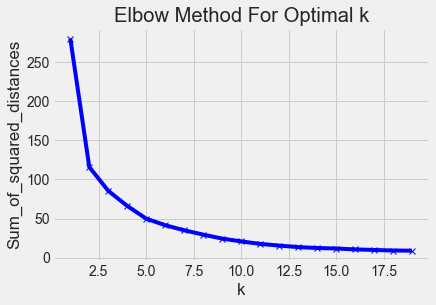

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# As the Elbow method suggests, I am choosing 6 clusters that cover the maximum variance

In [23]:
#Perform clustering to fill in values
#1.how_long -> form a cluster and impute the values, based on #pickup place, pick_up lat, pick_up long columns 
#2.item_quantity -> from a cluster and impute the values, based on #pickup place, pick_up lat, pick_up long columns

kmeans_howlong_itemquantity = KMeans(n_clusters = 6, init = 'k-means++', random_state=1)

kmeans_howlong_itemquantity_labels = kmeans_howlong_itemquantity.fit_predict(df[['pickup_lat', 'pickup_lon']])

df['Cluster_howLong_Itemquantity'] = kmeans_howlong_itemquantity_labels

df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,1
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,2
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,2
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,1360750,378035,151467,bicycle,Five Guys Burgers and Fries,Burger,Cheeseburger,1.0,Burgers,NaN,40.804404,-73.966430,40.818637,-73.939241,2014-10-14 13:30:25.567577,2014-10-14 13:41:09.42809,2014-10-14 13:53:28.264588,2014-10-14 14:10:19.256853,0
5979,1348697,96943,3296,bicycle,Cafe Mogador,Middle Eastern,Vegetarian,1.0,Cous Cous,NaN,40.727293,-73.984517,40.725938,-73.980550,2014-10-12 18:37:42.565897,2014-10-12 18:44:21.331886,2014-10-12 18:54:16.442017,2014-10-12 19:00:43.047785,1
5980,1274438,355090,153113,bicycle,Shake Shack,Burger,Fries,1.0,Fries,NaN,40.780826,-73.976483,40.763573,-73.973503,2014-10-01 18:12:56.973655,2014-10-01 18:29:59.803516,2014-10-01 18:52:19.769244,2014-10-01 19:16:52.653179,0
5981,1470282,400983,142140,car,Omai,Vietnamese,Ca Tim,1.0,Appetizers,00:02:17.264098,40.744408,-74.002891,40.734609,-74.006405,2014-10-27 20:25:03.592287,2014-10-27 20:22:37.822461,2014-10-27 20:39:25.770399,2014-10-27 20:50:45.259345,1


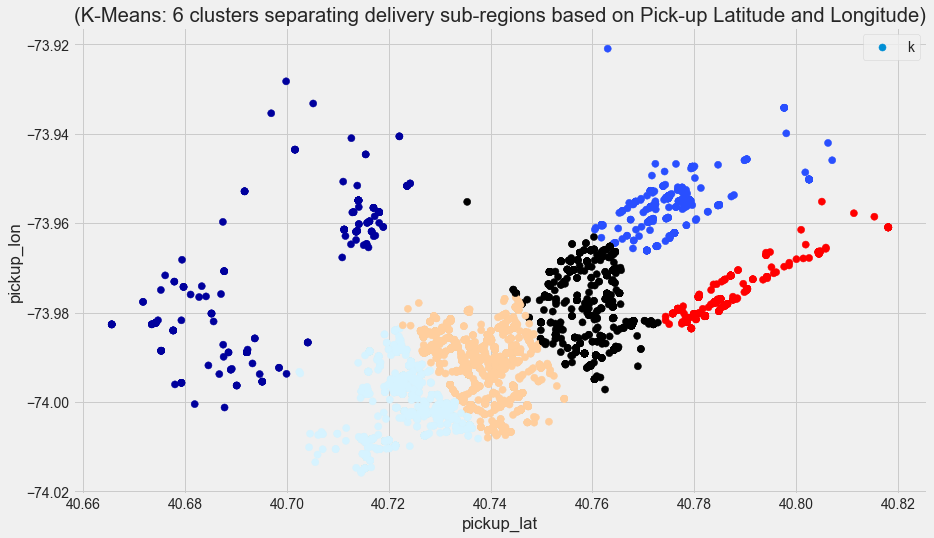

In [24]:
#plot k-means
#import seaborn as sns
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.scatter(df['pickup_lat'], df['pickup_lon'],s=50,c=kmeans_howlong_itemquantity_labels, cmap = 'flag')

plt.title('(K-Means: 6 clusters separating delivery sub-regions based on Pick-up Latitude and Longitude)')
plt.xlabel('pickup_lat')
plt.ylabel('pickup_lon')
plt.legend('kmeans')

In [25]:
sub_df0 = df.loc[df['Cluster_howLong_Itemquantity'] == 0] #448 rows x 19 columns
sub_df0['item_quantity'] = sub_df0['item_quantity'].fillna((sub_df0['item_quantity'].mean()))
sub_df0['item_quantity'] = sub_df0['item_quantity'].astype(int)
sub_df0['how_long_it_took_to_order'] = pd.to_timedelta(sub_df0['how_long_it_took_to_order'].astype(str))
sub_df0['how_long_it_took_to_order']=sub_df0['how_long_it_took_to_order'].fillna((sub_df0['how_long_it_took_to_order'].mean()))

sub_df0



,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,40.785160,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,40.775764,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,40.780826,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1,Desserts and Chips,00:07:56.117577,40.786017,-73.978472,40.793834,-73.941521,2014-10-01 20:34:44.468907,2014-10-01 20:34:30.382857,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,0
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,40.785160,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1475459,303211,156557,car,Big Nick's Burgers & Pizza,Pizza,Chicken Fingers,1,Appetizers & Side Orders,00:05:11.149539,40.776767,-73.979120,40.793834,-73.941521,2014-10-28 19:47:25.887723,2014-10-28 19:48:56.165939,2014-10-28 20:11:46.097208,2014-10-28 20:25:02.133169,0
5976,1300266,135451,36664,bicycle,Juice Generation,Juice Bar,Red Dragon Fruit,1,Smoothies,00:07:56.117577,40.777598,-73.979528,40.778493,-73.986542,2014-10-05 13:48:36.871896,2014-10-05 13:54:59.502837,2014-10-05 14:06:07.389917,2014-10-05 14:13:57.894695,0
5978,1360750,378035,151467,bicycle,Five Guys Burgers and Fries,Burger,Cheeseburger,1,Burgers,00:07:56.117577,40.804404,-73.966430,40.818637,-73.939241,2014-10-14 13:30:25.567577,2014-10-14 13:41:09.42809,2014-10-14 13:53:28.264588,2014-10-14 14:10:19.256853,0
5980,1274438,355090,153113,bicycle,Shake Shack,Burger,Fries,1,Fries,00:07:56.117577,40.780826,-73.976483,40.763573,-73.973503,2014-10-01 18:12:56.973655,2014-10-01 18:29:59.803516,2014-10-01 18:52:19.769244,2014-10-01 19:16:52.653179,0


In [26]:
sub_df1 = df.loc[df['Cluster_howLong_Itemquantity'] == 1] #2020 rows × 19 columns
sub_df1['item_quantity'] = sub_df1['item_quantity'].fillna((sub_df1['item_quantity'].mean()))
sub_df1['item_quantity'] = sub_df1['item_quantity'].astype(int)
sub_df1['how_long_it_took_to_order'] = pd.to_timedelta(sub_df1['how_long_it_took_to_order'].astype(str))
sub_df1['how_long_it_took_to_order']=sub_df1['how_long_it_took_to_order'].fillna((sub_df1['how_long_it_took_to_order'].mean()))
sub_df1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,1
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1,Cold Pressed Juices,00:07:51.860059,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1,Classic Roll & Hand Roll,00:04:49.413655,40.734858,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548,1
8,1487674,55375,181543,bicycle,Cafe Zaiya,others,others,1,others,00:07:51.860059,40.729357,-73.990156,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901,1
12,1302973,344631,64396,bicycle,Mighty Quinn's BBQ,BBQ,Spare Ribs,1,Meats,00:07:51.860059,40.727519,-73.988671,40.725486,-73.992819,2014-10-05 18:47:28.819056,2014-10-05 18:50:41.780487,2014-10-05 19:23:54.425485,2014-10-05 19:34:18.250581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,1470694,108385,129698,car,Momofuku Milk Bar,Dessert,Crack Pie Soft Serve (1 Pint),1,Soft Serve,00:07:51.860059,40.731795,-73.985673,40.718682,-73.986346,2014-10-27 21:18:05.455162,2014-10-27 21:21:57.59042,2014-10-27 21:27:47.714391,2014-10-27 21:40:15.062781,1
5971,1456176,395562,172130,walker,Pizza Hut,Pizza,Personal Pan Veggie Lover's,1,Personal Pan Pizzas,00:09:42.534175,40.749620,-73.991615,40.759031,-73.994567,2014-10-26 11:08:39.396902,2014-10-26 11:09:39.04769,2014-10-26 11:50:29.234605,2014-10-26 12:03:16.227906,1
5973,1379953,127103,69993,bicycle,The Grey Dog - University,Coffee,Organic Raw Veggies,1,Small Plates,00:04:34.400730,40.733787,-73.993035,40.736760,-73.982048,2014-10-17 13:35:30.031409,2014-10-17 13:43:14.423209,2014-10-17 13:50:04.623095,2014-10-17 13:57:28.4103,1
5979,1348697,96943,3296,bicycle,Cafe Mogador,Middle Eastern,Vegetarian,1,Cous Cous,00:07:51.860059,40.727293,-73.984517,40.725938,-73.980550,2014-10-12 18:37:42.565897,2014-10-12 18:44:21.331886,2014-10-12 18:54:16.442017,2014-10-12 19:00:43.047785,1


In [27]:
sub_df2 = df.loc[df['Cluster_howLong_Itemquantity'] == 2] #1956 rows × 19 columns
sub_df2['item_quantity'] = sub_df2['item_quantity'].fillna((sub_df2['item_quantity'].mean()))
sub_df2['item_quantity'] = sub_df2['item_quantity'].astype(int)
sub_df2['how_long_it_took_to_order'] = pd.to_timedelta(sub_df2['how_long_it_took_to_order'].astype(str))
sub_df2['how_long_it_took_to_order']=sub_df2['how_long_it_took_to_order'].fillna((sub_df2['how_long_it_took_to_order'].mean()))
sub_df2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,2
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,2
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,2
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1,Vegetarian Specialties,00:07:14.327405,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191,2
7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2,Cookies and Brownies,00:07:45.985432,40.729791,-74.000589,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.66695,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,1349649,350180,22502,bicycle,RedFarm Hudson,Chinese,BBQ’d Duck & Ginger Fried Rice,1,Rice & Noodles,00:05:17.792868,40.734214,-74.006202,40.732428,-74.008059,2014-10-12 19:48:42.042807,2014-10-12 19:46:30.061539,2014-10-12 20:16:54.839506,2014-10-12 20:21:46.06909,2
5962,1483811,180567,41408,car,Shake Shack,Burger,Shack -Cago Dog,1,Flat Top Dogs,00:07:45.985432,40.715279,-74.014860,40.722574,-74.010246,2014-10-29 22:37:52.579546,2014-10-29 22:40:28.989659,2014-10-29 22:58:21.162858,2014-10-29 23:02:48.791177,2
5966,1279583,74759,90681,bicycle,Russ & Daughters,Seafood,others,1,others,00:07:45.985432,40.722640,-73.988349,40.760335,-73.966751,2014-10-02 15:35:59.243931,2014-10-02 15:39:41.009034,2014-10-02 17:11:30.968455,2014-10-02 17:27:46.912312,2
5967,1362706,372989,91735,bicycle,Rice to Riches,Dessert,The Corner of Cookies & Cream,1,Year Round Flavors,00:07:45.985432,40.721736,-73.995936,40.740037,-73.985367,2014-10-14 19:33:52.047241,2014-10-14 19:41:31.270341,2014-10-14 19:52:14.568369,2014-10-14 20:08:49.221854,2


In [28]:
sub_df3 = df.loc[df['Cluster_howLong_Itemquantity'] == 3] #498 rows × 19 columns
sub_df3['item_quantity'] = sub_df3['item_quantity'].fillna((sub_df3['item_quantity'].mean()))
sub_df3['item_quantity'] = sub_df3['item_quantity'].astype(int)
sub_df3['how_long_it_took_to_order'] = pd.to_timedelta(sub_df3['how_long_it_took_to_order'].astype(str))
sub_df3['how_long_it_took_to_order']=sub_df3['how_long_it_took_to_order'].fillna((sub_df3['how_long_it_took_to_order'].mean()))
sub_df3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
16,1274468,95986,151467,bicycle,McDonald's,Fast Food,others,1,others,00:07:28.114906,40.777940,-73.954710,40.784337,-73.953907,2014-10-01 18:17:51.625284,2014-10-01 18:18:53.498048,2014-10-01 18:34:09.732141,2014-10-01 18:42:50.967369,3
28,1315209,55478,118095,bicycle,Tevere 84,others,others,1,others,00:04:49.675109,40.778035,-73.956036,40.732552,-73.996537,2014-10-07 20:18:32.473578,2014-10-07 20:57:05.453244,2014-10-07 21:27:38.071168,2014-10-07 22:22:01.7357,3
65,1458106,104983,152741,car,Fairway Market,others,others,1,others,00:07:28.114906,40.778374,-73.952557,40.776920,-73.958928,2014-10-26 14:00:57.891329,2014-10-26 14:01:36.58344,2014-10-26 14:44:57.119633,2014-10-26 14:54:36.21954,3
85,1486025,200631,97695,car,Amy Ruth's,Southern,Fruit Juice,1,Beverages,00:08:08.465981,40.802550,-73.950233,40.798558,-73.934880,2014-10-30 12:45:50.509359,2014-10-30 13:28:39.792756,2014-10-30 13:37:12.483083,2014-10-30 13:47:23.358449,3
101,1469623,400766,143085,car,The Meatball Shop,Italian,Vegetable,1,Naked Balls,00:06:10.102818,40.771491,-73.956334,40.808929,-73.961365,2014-10-27 18:40:26.592744,2014-10-27 18:49:21.564263,2014-10-27 19:17:28.389669,2014-10-27 19:45:26.222005,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,1354026,333364,69993,bicycle,Duane Reade,Drug Store,others,1,others,00:07:28.114906,40.776400,-73.946754,40.777373,-73.943255,2014-10-13 11:57:56.986919,2014-10-13 12:13:43.198536,2014-10-13 12:14:33.226348,2014-10-13 12:21:39.915338,3
5934,1469083,72639,46764,bicycle,Hale & Hearty,Salad,Chicken Vegetable,1,Daily Soups,00:07:28.114906,40.774485,-73.958976,40.780897,-73.958621,2014-10-27 16:49:33.379714,2014-10-27 16:53:01.741291,2014-10-27 17:03:21.566816,2014-10-27 17:09:47.278825,3
5952,1347879,40500,130599,bicycle,J. G. Melon,Burger,Bacon Cheeseburger,1,Main Menu,00:05:32.210800,40.771135,-73.959623,40.766204,-73.960757,2014-10-12 17:08:42.827958,2014-10-12 17:19:13.622458,2014-10-12 17:34:33.668298,2014-10-12 17:42:57.325041,3
5954,1368599,379126,131044,bicycle,Sushi Seki (archived),Japanese,others,1,others,00:07:28.114906,40.761837,-73.960404,40.781016,-73.957692,2014-10-15 19:07:37.144835,2014-10-15 19:23:55.160524,2014-10-15 19:54:44.10367,2014-10-15 20:08:45.337442,3


In [29]:
sub_df4 = df.loc[df['Cluster_howLong_Itemquantity'] == 4] #213 rows × 19 columns
sub_df4['item_quantity'] = sub_df4['item_quantity'].fillna((sub_df4['item_quantity'].mean()))
sub_df4['item_quantity'] = sub_df4['item_quantity'].astype(int)
sub_df4['how_long_it_took_to_order'] = pd.to_timedelta(sub_df4['how_long_it_took_to_order'].astype(str))
sub_df4['how_long_it_took_to_order']=sub_df4['how_long_it_took_to_order'].fillna((sub_df4['how_long_it_took_to_order'].mean()))
sub_df4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
64,1414452,148033,128139,car,Shake Shack,Burger,others,1,others,00:08:05.323262,40.682770,-73.976532,40.693256,-73.966173,2014-10-21 14:57:29.338613,2014-10-21 15:30:02.259968,2014-10-21 15:31:21.050095,2014-10-21 15:37:44.276996,4
71,1460699,103627,170291,bicycle,Whole Foods Market,Grocery Store,Creme Fraiche,1,Cheese,00:08:05.323262,40.675317,-73.988533,40.698193,-73.984208,2014-10-26 17:26:53.689091,2014-10-26 17:30:04.585565,2014-10-26 19:00:22.913471,2014-10-26 19:25:26.912929,4
72,1399321,97938,3296,bicycle,Crif Dogs,others,Spicy Redneck,1,Crif Dogs,00:08:05.323262,40.717006,-73.956565,40.720582,-73.962362,2014-10-19 15:46:43.113984,2014-10-19 15:52:21.622374,2014-10-19 16:17:42.971941,2014-10-19 16:22:33.765629,4
79,1294429,328864,111793,car,Pies 'n' Thighs,others,Fried Chicken Sandwich,1,Dinner Entrees,00:02:00.329853,40.711255,-73.961443,40.701183,-73.928499,2014-10-04 17:13:04.237466,2014-10-04 17:13:07.261252,2014-10-04 17:30:58.021715,2014-10-04 17:46:18.701352,4
137,1299559,148327,118093,scooter,Shake Shack,Burger,Fries,1,Fries,00:08:05.323262,40.692146,-73.988865,40.701972,-73.987036,2014-10-05 12:30:23.27789,2014-10-05 13:07:23.30729,2014-10-05 13:26:13.134353,2014-10-05 13:35:38.318512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1334357,110699,128139,car,Pies 'n' Thighs,others,Apple Pie,2,Pie,00:09:10.401030,40.711255,-73.961443,40.671833,-73.988082,2014-10-10 21:29:07.750597,2014-10-10 21:56:56.988939,2014-10-10 22:06:17.67029,2014-10-10 22:34:28.84532,4
5876,1456770,386341,150598,car,Five Leaves,American,Bircher Muesli,1,Breakfast,00:06:59.390809,40.723605,-73.951656,40.714602,-73.961980,2014-10-26 12:22:08.837636,2014-10-26 12:44:58.206637,2014-10-26 13:01:18.027625,2014-10-26 13:09:43.604964,4
5885,1321420,134152,83565,bicycle,The Meatball Shop,Italian,Vegetable Hero,1,Heroes,00:06:06.973753,40.718110,-73.957545,40.714367,-73.951418,2014-10-08 22:29:10.979431,2014-10-08 22:30:52.847018,2014-10-08 22:46:03.633986,2014-10-08 22:48:23.625975,4
5927,1376875,129938,6873,car,The Meatball Shop,Italian,Classic Beef,2,Naked Balls,00:06:41.673201,40.718110,-73.957545,40.719496,-73.963774,2014-10-16 21:44:43.485658,2014-10-16 21:57:40.536858,2014-10-16 22:06:33.68333,2014-10-16 22:13:45.961879,4


In [30]:
sub_df5 = df.loc[df['Cluster_howLong_Itemquantity'] == 5] #816 rows × 19 columns
sub_df5['item_quantity'] = sub_df5['item_quantity'].fillna((sub_df5['item_quantity'].mean()))
sub_df5['item_quantity'] = sub_df5['item_quantity'].astype(int)
sub_df5['how_long_it_took_to_order'] = pd.to_timedelta(sub_df5['how_long_it_took_to_order'].astype(str))
sub_df5['how_long_it_took_to_order']=sub_df5['how_long_it_took_to_order'].fillna((sub_df5['how_long_it_took_to_order'].mean()))
sub_df5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1,Burgers,00:07:52.488542,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278,5
17,1460242,300021,117686,car,Han Bat,Korean,21. Soon Dae,1,Main Dishes,00:06:10.419597,40.750205,-73.986432,40.781460,-73.980686,2014-10-26 16:50:52.754548,2014-10-26 17:18:02.557555,2014-10-26 17:31:22.738561,2014-10-26 18:07:21.511913,5
29,1282272,97991,72941,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Unagi,1,Taiseyo (Atlantic Ocean),00:10:21.717855,40.767653,-73.982925,40.748828,-73.990139,2014-10-02 21:02:40.958544,2014-10-02 21:11:48.249277,2014-10-02 21:28:00.659548,2014-10-02 21:45:08.692013,5
34,1416984,6210,20962,walker,Tulsi Restaurant,Indian,others,1,others,00:07:52.488542,40.753255,-73.972015,40.759818,-73.987640,2014-10-21 20:58:18.15325,2014-10-21 20:59:28.579946,2014-10-21 21:16:18.592959,2014-10-21 21:36:00.591551,5
41,1415905,129798,91932,bicycle,Grom,others,others,1,others,00:02:21.995261,40.767528,-73.982047,40.783717,-73.983505,2014-10-21 19:09:54.49836,2014-10-21 19:24:39.55415,2014-10-21 19:32:30.057069,2014-10-21 19:50:14.284335,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,1294906,221206,113300,bicycle,Empanada Mama (closed),Mexican,Pizza,1,Wheat Flour,00:07:35.733592,40.764217,-73.988321,40.779967,-73.983335,2014-10-04 18:29:10.1443,2014-10-04 18:30:32.531085,2014-10-04 19:05:52.557057,2014-10-04 19:18:40.433616,5
5964,1440400,114085,30743,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Artic Char,1,Taiheiyo (Pacific Ocean),00:06:30.249477,40.767653,-73.982925,40.764469,-73.974488,2014-10-24 19:56:55.542025,2014-10-24 20:15:38.925058,2014-10-24 20:31:27.677483,2014-10-24 20:39:48.270318,5
5965,1440835,48444,160489,bicycle,TAO,Japanese,Satay of Chicken with Peanut Sauce,1,Small Plates,00:08:16.273766,40.762858,-73.971619,40.776088,-73.959937,2014-10-24 20:29:54.140704,2014-10-24 20:31:22.524733,2014-10-24 20:53:12.234089,2014-10-24 21:02:53.216227,5
5969,1347642,100889,15291,car,Whole Foods Market,Grocery Store,Salad Clam Ogirl Baby Spinach 5oz Og,1,Packaged Salad & Fruit,00:07:52.488542,40.768062,-73.981848,40.764704,-73.976055,2014-10-12 16:39:25.479283,2014-10-12 17:15:13.555148,2014-10-12 19:11:03.150759,2014-10-12 19:15:35.502186,5


In [31]:
frames = [sub_df0, sub_df1, sub_df2, sub_df3, sub_df4, sub_df5]
new_df = pd.concat(frames)
new_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,40.785160,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,40.775764,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,40.780826,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1,Desserts and Chips,00:07:56.117577,40.786017,-73.978472,40.793834,-73.941521,2014-10-01 20:34:44.468907,2014-10-01 20:34:30.382857,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,0
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,40.785160,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,1294906,221206,113300,bicycle,Empanada Mama (closed),Mexican,Pizza,1,Wheat Flour,00:07:35.733592,40.764217,-73.988321,40.779967,-73.983335,2014-10-04 18:29:10.1443,2014-10-04 18:30:32.531085,2014-10-04 19:05:52.557057,2014-10-04 19:18:40.433616,5
5964,1440400,114085,30743,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Artic Char,1,Taiheiyo (Pacific Ocean),00:06:30.249477,40.767653,-73.982925,40.764469,-73.974488,2014-10-24 19:56:55.542025,2014-10-24 20:15:38.925058,2014-10-24 20:31:27.677483,2014-10-24 20:39:48.270318,5
5965,1440835,48444,160489,bicycle,TAO,Japanese,Satay of Chicken with Peanut Sauce,1,Small Plates,00:08:16.273766,40.762858,-73.971619,40.776088,-73.959937,2014-10-24 20:29:54.140704,2014-10-24 20:31:22.524733,2014-10-24 20:53:12.234089,2014-10-24 21:02:53.216227,5
5969,1347642,100889,15291,car,Whole Foods Market,Grocery Store,Salad Clam Ogirl Baby Spinach 5oz Og,1,Packaged Salad & Fruit,00:07:52.488542,40.768062,-73.981848,40.764704,-73.976055,2014-10-12 16:39:25.479283,2014-10-12 17:15:13.555148,2014-10-12 19:11:03.150759,2014-10-12 19:15:35.502186,5


In [32]:
new_df.isnull().sum()

delivery_id                              0
customer_id                              0
jumpman_id                               0
vehicle_type                             0
pickup_place                             0
place_category                           0
item_name                                0
item_quantity                            0
item_category_name                       0
how_long_it_took_to_order                0
pickup_lat                               0
pickup_lon                               0
dropoff_lat                              0
dropoff_lon                              0
when_the_delivery_started                0
when_the_Jumpman_arrived_at_pickup     550
when_the_Jumpman_left_pickup           550
when_the_Jumpman_arrived_at_dropoff      0
Cluster_howLong_Itemquantity             0
dtype: int64

# Assign meaningful values to the null rows of the features: when_the_Jumpman_arrived_at_pickup AND when_the_Jumpman_left_pickup 

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5951 entries, 15 to 5972
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   delivery_id                          5951 non-null   int64          
 1   customer_id                          5951 non-null   int64          
 2   jumpman_id                           5951 non-null   int64          
 3   vehicle_type                         5951 non-null   object         
 4   pickup_place                         5951 non-null   object         
 5   place_category                       5951 non-null   object         
 6   item_name                            5951 non-null   object         
 7   item_quantity                        5951 non-null   int64          
 8   item_category_name                   5951 non-null   object         
 9   how_long_it_took_to_order            5951 non-null   timedelta64[ns]
 10 

# convert to datetime: 'when_the_delivery_started' and 'when_the_Jumpman_arrived_at_dropoff'

In [34]:
new_df['when_the_delivery_started'] = pd.to_datetime(new_df['when_the_delivery_started'])
new_df['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(new_df['when_the_Jumpman_arrived_at_dropoff'])

# Extract WeekDays and Intervals for each delivery and store these values in 'Weekday_Delivery_started' and 'Interval_delivery_started'

In [35]:
#new_df['Month_delivery_started'] = pd.to_datetime(new_df.when_the_delivery_started, format='%H:%M:%S.%f').dt.month_name()
new_df['Weekday_Delivery_started'] = new_df['when_the_delivery_started'].dt.day_name()
a = new_df.assign(session=pd.cut(new_df.when_the_delivery_started.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
new_df['Interval_delivery_started'] = a['session']
new_df['Interval_delivery_started'].fillna("Night", inplace = True)

In [36]:
new_df.Interval_delivery_started.unique()

[Morning, Evening, Afternoon, Night]
Categories (4, object): [Night < Morning < Afternoon < Evening]

# convert to datetime: 'when_the_Jumpman_arrived_at_pickup' and 'when_the_Jumpman_left_pickup'

In [37]:
new_df['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(new_df['when_the_Jumpman_arrived_at_pickup'])
new_df['when_the_Jumpman_left_pickup'] = pd.to_datetime(new_df['when_the_Jumpman_left_pickup'])

# Let's Check if there is any Faulty Data or Data Inconsistency present

In [38]:
#new_df['time_difference_orderplaced_pickup'] = new_df['when_the_Jumpman_arrived_at_pickup']-new_df['when_the_delivery_started']

In [39]:
new_df # Around 500 Records Pickup Time is before delivery Started!!!! Faulty data

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1,Desserts and Chips,00:07:56.117577,...,-73.978472,40.793834,-73.941521,2014-10-01 20:34:44.468907,2014-10-01 20:34:30.382857,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,0,Wednesday,Evening
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,1294906,221206,113300,bicycle,Empanada Mama (closed),Mexican,Pizza,1,Wheat Flour,00:07:35.733592,...,-73.988321,40.779967,-73.983335,2014-10-04 18:29:10.144300,2014-10-04 18:30:32.531085,2014-10-04 19:05:52.557057,2014-10-04 19:18:40.433616,5,Saturday,Afternoon
5964,1440400,114085,30743,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Artic Char,1,Taiheiyo (Pacific Ocean),00:06:30.249477,...,-73.982925,40.764469,-73.974488,2014-10-24 19:56:55.542025,2014-10-24 20:15:38.925058,2014-10-24 20:31:27.677483,2014-10-24 20:39:48.270318,5,Friday,Evening
5965,1440835,48444,160489,bicycle,TAO,Japanese,Satay of Chicken with Peanut Sauce,1,Small Plates,00:08:16.273766,...,-73.971619,40.776088,-73.959937,2014-10-24 20:29:54.140704,2014-10-24 20:31:22.524733,2014-10-24 20:53:12.234089,2014-10-24 21:02:53.216227,5,Friday,Evening
5969,1347642,100889,15291,car,Whole Foods Market,Grocery Store,Salad Clam Ogirl Baby Spinach 5oz Og,1,Packaged Salad & Fruit,00:07:52.488542,...,-73.981848,40.764704,-73.976055,2014-10-12 16:39:25.479283,2014-10-12 17:15:13.555148,2014-10-12 19:11:03.150759,2014-10-12 19:15:35.502186,5,Sunday,Afternoon


In [40]:
null_rows=new_df[new_df['when_the_Jumpman_arrived_at_pickup'].isnull()]
null_rows

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
750,1380032,77348,113563,bicycle,Levain Bakery,Bakery,Dark Chocolate Chocolate Chip,1,Cookies,00:07:56.117577,...,-73.980335,40.766272,-73.982400,2014-10-17 13:48:31.908204,NaT,NaT,2014-10-17 14:39:53.588804,0,Friday,Afternoon
757,1416387,390484,123581,bicycle,RedFarm Broadway,Chinese,Smoked Salmon & Eggplant 'Bruschetta',1,Starters & Salads,00:07:56.117577,...,-73.980739,40.768236,-73.966320,2014-10-21 19:56:12.319086,NaT,NaT,2014-10-21 20:45:36.630371,0,Tuesday,Evening
968,1368928,109405,115756,bicycle,Amsterdam Gourmet Deli,others,others,1,others,00:07:56.117577,...,-73.978169,40.782588,-73.976973,2014-10-15 19:39:42.806121,NaT,NaT,2014-10-15 20:29:14.445234,0,Wednesday,Evening
998,1321474,73057,156557,car,Milano Market,others,others,1,others,00:02:52.083336,...,-73.965462,40.806108,-73.963591,2014-10-08 22:38:36.688303,NaT,NaT,2014-10-08 22:49:29.691420,0,Wednesday,Evening
1243,1281140,97370,110399,bicycle,Momoya,Sushi,Mixed Greens,1,Salad,00:05:57.083969,...,-73.977622,40.770762,-73.964486,2014-10-02 18:59:08.979302,NaT,NaT,2014-10-02 19:33:04.119468,0,Thursday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,-73.973200,40.748726,-73.977195,2014-10-13 17:11:32.661521,NaT,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon
5653,1462400,68551,49223,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Ebi Shumai,1,Appetizers,00:03:32.827670,...,-73.982925,40.741967,-73.975778,2014-10-26 19:19:18.504868,NaT,NaT,2014-10-26 20:15:02.360758,5,Sunday,Evening
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982192,40.756976,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon
5889,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Brown Eggs Lg,1,Eggs,00:07:52.488542,...,-73.981848,40.779297,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon


# Around 499 Records Arrived Pickup Time is before delivery Started!!!! Faulty data

# Swap Faulty Values - Delivery Started and Arrived Pickup

In [41]:
faulty_records_placed_pickup = new_df.loc[new_df['when_the_delivery_started'] > new_df['when_the_Jumpman_arrived_at_pickup']]

In [42]:
faulty_records_placed_pickup

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1,Desserts and Chips,00:07:56.117577,...,-73.978472,40.793834,-73.941521,2014-10-01 20:34:44.468907,2014-10-01 20:34:30.382857,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,0,Wednesday,Evening
201,1323121,143373,154990,bicycle,Peacefood Cafe,Vegan,Pan-seared Shanghai-Style Dumplings,1,Side Dishes,00:02:54.206558,...,-73.976916,40.762309,-73.973978,2014-10-09 12:35:44.563907,2014-10-09 12:34:45.433237,2014-10-09 13:07:04.635564,2014-10-09 13:21:27.256781,0,Thursday,Morning
217,1286240,72924,139444,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.979699,40.789089,-73.967001,2014-10-03 15:50:53.535929,2014-10-03 15:49:56.948449,2014-10-03 16:08:38.471217,2014-10-03 16:18:25.738774,0,Friday,Afternoon
333,1354993,169478,162905,bicycle,RedFarm Broadway,Chinese,Shrimp & Snow Pea Leaf Dumplings (4),1,Lunch Dim Sum,00:06:58.981157,...,-73.980739,40.756670,-73.973922,2014-10-13 14:14:42.811046,2014-10-13 14:14:17.093197,2014-10-13 14:52:00.071433,2014-10-13 15:17:13.409982,0,Monday,Afternoon
472,1343357,336934,158791,car,Big Nick's Burgers & Pizza,Pizza,Giant Hot Dog,1,Hot Dogs,00:01:43.003606,...,-73.979120,40.773509,-73.989543,2014-10-12 00:20:24.176562,2014-10-12 00:20:18.404149,2014-10-12 00:27:08.745496,2014-10-12 00:31:56.778076,0,Sunday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,1379918,201542,57186,bicycle,TAO,Japanese,TAO Lo Mein with Roast Pork,1,Sophisticated Noodles and Rice,00:04:10.338972,...,-73.971619,40.772422,-73.965656,2014-10-17 13:29:52.341712,2014-10-17 13:28:34.229667,2014-10-17 13:54:27.627751,2014-10-17 14:01:19.052942,5,Friday,Afternoon
5058,1312806,62941,49875,bicycle,Cipriani Le Specialita,Italian,Penne alla Vodka,1,Hot Specials,00:07:52.488542,...,-73.976569,40.745770,-73.979774,2014-10-07 11:48:55.282829,2014-10-07 11:48:47.578364,2014-10-07 12:07:23.187081,2014-10-07 12:11:49.104033,5,Tuesday,Morning
5247,1392580,133272,144384,bicycle,Philippe Chow,Chinese,others,1,others,00:05:03.199000,...,-73.970500,40.766937,-73.967195,2014-10-18 20:45:05.645267,2014-10-18 20:42:51.762260,2014-10-18 21:04:11.813417,2014-10-18 21:07:52.700962,5,Saturday,Evening
5665,1379309,67895,148770,bicycle,400 Fifth Avenue,others,others,1,others,00:07:52.488542,...,-73.983936,40.758240,-73.972385,2014-10-17 12:09:10.662753,2014-10-17 12:06:47.559656,2014-10-17 12:30:55.227314,2014-10-17 12:44:04.522703,5,Friday,Morning


In [43]:
col_list = list(faulty_records_placed_pickup)
col_list[14], col_list[15] = col_list[15], col_list[14]
faulty_records_placed_pickup.columns = col_list

In [44]:
corrected_records=faulty_records_placed_pickup[['delivery_id','customer_id','jumpman_id','vehicle_type','pickup_place','place_category','item_name','item_quantity','item_category_name','how_long_it_took_to_order',
                              'pickup_lat','pickup_lon','dropoff_lat','dropoff_lon','when_the_delivery_started','when_the_Jumpman_arrived_at_pickup',
                              'when_the_Jumpman_left_pickup','when_the_Jumpman_arrived_at_dropoff','Cluster_howLong_Itemquantity','Weekday_Delivery_started','Interval_delivery_started']]

In [45]:
corrected_records

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1,Desserts and Chips,00:07:56.117577,...,-73.978472,40.793834,-73.941521,2014-10-01 20:34:30.382857,2014-10-01 20:34:44.468907,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,0,Wednesday,Evening
201,1323121,143373,154990,bicycle,Peacefood Cafe,Vegan,Pan-seared Shanghai-Style Dumplings,1,Side Dishes,00:02:54.206558,...,-73.976916,40.762309,-73.973978,2014-10-09 12:34:45.433237,2014-10-09 12:35:44.563907,2014-10-09 13:07:04.635564,2014-10-09 13:21:27.256781,0,Thursday,Morning
217,1286240,72924,139444,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.979699,40.789089,-73.967001,2014-10-03 15:49:56.948449,2014-10-03 15:50:53.535929,2014-10-03 16:08:38.471217,2014-10-03 16:18:25.738774,0,Friday,Afternoon
333,1354993,169478,162905,bicycle,RedFarm Broadway,Chinese,Shrimp & Snow Pea Leaf Dumplings (4),1,Lunch Dim Sum,00:06:58.981157,...,-73.980739,40.756670,-73.973922,2014-10-13 14:14:17.093197,2014-10-13 14:14:42.811046,2014-10-13 14:52:00.071433,2014-10-13 15:17:13.409982,0,Monday,Afternoon
472,1343357,336934,158791,car,Big Nick's Burgers & Pizza,Pizza,Giant Hot Dog,1,Hot Dogs,00:01:43.003606,...,-73.979120,40.773509,-73.989543,2014-10-12 00:20:18.404149,2014-10-12 00:20:24.176562,2014-10-12 00:27:08.745496,2014-10-12 00:31:56.778076,0,Sunday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,1379918,201542,57186,bicycle,TAO,Japanese,TAO Lo Mein with Roast Pork,1,Sophisticated Noodles and Rice,00:04:10.338972,...,-73.971619,40.772422,-73.965656,2014-10-17 13:28:34.229667,2014-10-17 13:29:52.341712,2014-10-17 13:54:27.627751,2014-10-17 14:01:19.052942,5,Friday,Afternoon
5058,1312806,62941,49875,bicycle,Cipriani Le Specialita,Italian,Penne alla Vodka,1,Hot Specials,00:07:52.488542,...,-73.976569,40.745770,-73.979774,2014-10-07 11:48:47.578364,2014-10-07 11:48:55.282829,2014-10-07 12:07:23.187081,2014-10-07 12:11:49.104033,5,Tuesday,Morning
5247,1392580,133272,144384,bicycle,Philippe Chow,Chinese,others,1,others,00:05:03.199000,...,-73.970500,40.766937,-73.967195,2014-10-18 20:42:51.762260,2014-10-18 20:45:05.645267,2014-10-18 21:04:11.813417,2014-10-18 21:07:52.700962,5,Saturday,Evening
5665,1379309,67895,148770,bicycle,400 Fifth Avenue,others,others,1,others,00:07:52.488542,...,-73.983936,40.758240,-73.972385,2014-10-17 12:06:47.559656,2014-10-17 12:09:10.662753,2014-10-17 12:30:55.227314,2014-10-17 12:44:04.522703,5,Friday,Morning


# To concatenate corrected records in original dataframe 'new_df'. First drop the faulty_records and then concat corrected records

In [46]:
#To concatenate corrected records in original dataframe 'new_df'. First drop the faulty_records and then concat corrected records

new_df0=new_df.loc[new_df['when_the_delivery_started'] < new_df['when_the_Jumpman_arrived_at_pickup'] ]
new_df0#non-null rows with correct records

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-73.974713,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,1294906,221206,113300,bicycle,Empanada Mama (closed),Mexican,Pizza,1,Wheat Flour,00:07:35.733592,...,-73.988321,40.779967,-73.983335,2014-10-04 18:29:10.144300,2014-10-04 18:30:32.531085,2014-10-04 19:05:52.557057,2014-10-04 19:18:40.433616,5,Saturday,Afternoon
5964,1440400,114085,30743,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Artic Char,1,Taiheiyo (Pacific Ocean),00:06:30.249477,...,-73.982925,40.764469,-73.974488,2014-10-24 19:56:55.542025,2014-10-24 20:15:38.925058,2014-10-24 20:31:27.677483,2014-10-24 20:39:48.270318,5,Friday,Evening
5965,1440835,48444,160489,bicycle,TAO,Japanese,Satay of Chicken with Peanut Sauce,1,Small Plates,00:08:16.273766,...,-73.971619,40.776088,-73.959937,2014-10-24 20:29:54.140704,2014-10-24 20:31:22.524733,2014-10-24 20:53:12.234089,2014-10-24 21:02:53.216227,5,Friday,Evening
5969,1347642,100889,15291,car,Whole Foods Market,Grocery Store,Salad Clam Ogirl Baby Spinach 5oz Og,1,Packaged Salad & Fruit,00:07:52.488542,...,-73.981848,40.764704,-73.976055,2014-10-12 16:39:25.479283,2014-10-12 17:15:13.555148,2014-10-12 19:11:03.150759,2014-10-12 19:15:35.502186,5,Sunday,Afternoon


In [47]:
#concat new_df0 and corrected records and null records 
records = [new_df0, null_rows,corrected_records]
new_df_ = pd.concat(records)
new_df_

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-73.974713,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,1379918,201542,57186,bicycle,TAO,Japanese,TAO Lo Mein with Roast Pork,1,Sophisticated Noodles and Rice,00:04:10.338972,...,-73.971619,40.772422,-73.965656,2014-10-17 13:28:34.229667,2014-10-17 13:29:52.341712,2014-10-17 13:54:27.627751,2014-10-17 14:01:19.052942,5,Friday,Afternoon
5058,1312806,62941,49875,bicycle,Cipriani Le Specialita,Italian,Penne alla Vodka,1,Hot Specials,00:07:52.488542,...,-73.976569,40.745770,-73.979774,2014-10-07 11:48:47.578364,2014-10-07 11:48:55.282829,2014-10-07 12:07:23.187081,2014-10-07 12:11:49.104033,5,Tuesday,Morning
5247,1392580,133272,144384,bicycle,Philippe Chow,Chinese,others,1,others,00:05:03.199000,...,-73.970500,40.766937,-73.967195,2014-10-18 20:42:51.762260,2014-10-18 20:45:05.645267,2014-10-18 21:04:11.813417,2014-10-18 21:07:52.700962,5,Saturday,Evening
5665,1379309,67895,148770,bicycle,400 Fifth Avenue,others,others,1,others,00:07:52.488542,...,-73.983936,40.758240,-73.972385,2014-10-17 12:06:47.559656,2014-10-17 12:09:10.662753,2014-10-17 12:30:55.227314,2014-10-17 12:44:04.522703,5,Friday,Morning


# Let's create Faulty cases for checking the presence of Faulty Conditions again:


1.'when_the_delivery_started' > 'when_the_Jumpman_arrived_at_pickup'

2.'when_the_Jumpman_arrived_at_pickup'] > 'when_the_Jumpman_left_pickup'

3.'when_the_Jumpman_left_pickup' > 'when_the_Jumpman_arrived_at_dropoff'




In [48]:

faulty_records_placed_pickup_2 = new_df_.loc[new_df_['when_the_delivery_started'] > new_df_['when_the_Jumpman_arrived_at_pickup']]
faulty_records_placed_pickup_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started


# we got 2 records where 'when_the_Jumpman_arrived_at_pickup time' is after 'when_the_Jumpman_left_pickup'

In [49]:
#Let's check for when_the_Jumpman_left_pickup and when_the_Jumpman_arrived_at_pickup, when_the_Jumpman_arrived_at_dropoff and when_the_Jumpman_left_pickup
faulty_records_pickup_left = new_df_.loc[new_df_['when_the_Jumpman_arrived_at_pickup'] > new_df_['when_the_Jumpman_left_pickup']]
faulty_records_pickup_left

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
623,1400134,54796,28765,bicycle,Postmates General Store (deprecated),Convenience Store,Charmin Ultra Soft 2-Ply Toilet Paper (6 ct.),1,Household,00:07:45.985432,...,-74.008336,40.744314,-73.987314,2014-10-19 17:02:58.656642,2014-10-19 17:05:12.398187,2014-10-19 17:04:48.283569,2014-10-19 17:51:52.966043,2,Sunday,Afternoon
1478,1477564,83432,30905,car,300 North End Ave and Warren,others,others,1,others,00:07:45.985432,...,-74.014626,40.757972,-73.975241,2014-10-28 23:53:13.673365,2014-10-28 23:55:37.796467,2014-10-28 23:54:33.478716,2014-10-29 00:08:40.906895,2,Tuesday,Evening


# Let's swap these 2 records 

In [50]:
#we got 2 records above where 'when_the_Jumpman_arrived_at_pickup time' is after 'when_the_Jumpman_left_pickup'
#Let's swap again
col_list_ = list(faulty_records_pickup_left)
col_list_[15], col_list_[16] = col_list_[16], col_list_[15]
faulty_records_pickup_left.columns = col_list_

corrected_records_pickup_left=faulty_records_pickup_left[['delivery_id','customer_id','jumpman_id','vehicle_type','pickup_place','place_category','item_name','item_quantity','item_category_name','how_long_it_took_to_order',
                              'pickup_lat','pickup_lon','dropoff_lat','dropoff_lon','when_the_delivery_started','when_the_Jumpman_arrived_at_pickup',
                              'when_the_Jumpman_left_pickup','when_the_Jumpman_arrived_at_dropoff','Cluster_howLong_Itemquantity','Weekday_Delivery_started','Interval_delivery_started']]

In [51]:
null_rows_pickup_left=new_df_[new_df_['when_the_Jumpman_left_pickup'].isnull()]
null_rows_pickup_left

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
750,1380032,77348,113563,bicycle,Levain Bakery,Bakery,Dark Chocolate Chocolate Chip,1,Cookies,00:07:56.117577,...,-73.980335,40.766272,-73.982400,2014-10-17 13:48:31.908204,NaT,NaT,2014-10-17 14:39:53.588804,0,Friday,Afternoon
757,1416387,390484,123581,bicycle,RedFarm Broadway,Chinese,Smoked Salmon & Eggplant 'Bruschetta',1,Starters & Salads,00:07:56.117577,...,-73.980739,40.768236,-73.966320,2014-10-21 19:56:12.319086,NaT,NaT,2014-10-21 20:45:36.630371,0,Tuesday,Evening
968,1368928,109405,115756,bicycle,Amsterdam Gourmet Deli,others,others,1,others,00:07:56.117577,...,-73.978169,40.782588,-73.976973,2014-10-15 19:39:42.806121,NaT,NaT,2014-10-15 20:29:14.445234,0,Wednesday,Evening
998,1321474,73057,156557,car,Milano Market,others,others,1,others,00:02:52.083336,...,-73.965462,40.806108,-73.963591,2014-10-08 22:38:36.688303,NaT,NaT,2014-10-08 22:49:29.691420,0,Wednesday,Evening
1243,1281140,97370,110399,bicycle,Momoya,Sushi,Mixed Greens,1,Salad,00:05:57.083969,...,-73.977622,40.770762,-73.964486,2014-10-02 18:59:08.979302,NaT,NaT,2014-10-02 19:33:04.119468,0,Thursday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,-73.973200,40.748726,-73.977195,2014-10-13 17:11:32.661521,NaT,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon
5653,1462400,68551,49223,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Ebi Shumai,1,Appetizers,00:03:32.827670,...,-73.982925,40.741967,-73.975778,2014-10-26 19:19:18.504868,NaT,NaT,2014-10-26 20:15:02.360758,5,Sunday,Evening
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982192,40.756976,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon
5889,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Brown Eggs Lg,1,Eggs,00:07:52.488542,...,-73.981848,40.779297,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon


In [52]:
data_pickup_left=new_df_.loc[new_df_['when_the_Jumpman_arrived_at_pickup'] < new_df_['when_the_Jumpman_left_pickup'] ]
data_pickup_left

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-73.974713,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,1379918,201542,57186,bicycle,TAO,Japanese,TAO Lo Mein with Roast Pork,1,Sophisticated Noodles and Rice,00:04:10.338972,...,-73.971619,40.772422,-73.965656,2014-10-17 13:28:34.229667,2014-10-17 13:29:52.341712,2014-10-17 13:54:27.627751,2014-10-17 14:01:19.052942,5,Friday,Afternoon
5058,1312806,62941,49875,bicycle,Cipriani Le Specialita,Italian,Penne alla Vodka,1,Hot Specials,00:07:52.488542,...,-73.976569,40.745770,-73.979774,2014-10-07 11:48:47.578364,2014-10-07 11:48:55.282829,2014-10-07 12:07:23.187081,2014-10-07 12:11:49.104033,5,Tuesday,Morning
5247,1392580,133272,144384,bicycle,Philippe Chow,Chinese,others,1,others,00:05:03.199000,...,-73.970500,40.766937,-73.967195,2014-10-18 20:42:51.762260,2014-10-18 20:45:05.645267,2014-10-18 21:04:11.813417,2014-10-18 21:07:52.700962,5,Saturday,Evening
5665,1379309,67895,148770,bicycle,400 Fifth Avenue,others,others,1,others,00:07:52.488542,...,-73.983936,40.758240,-73.972385,2014-10-17 12:06:47.559656,2014-10-17 12:09:10.662753,2014-10-17 12:30:55.227314,2014-10-17 12:44:04.522703,5,Friday,Morning


In [53]:
#concat new_df and corrected records_1
records_ = [data_pickup_left, null_rows_pickup_left,corrected_records_pickup_left]
dataframe = pd.concat(records_)
dataframe

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-73.976916,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.980206,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.976916,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-73.974713,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982192,40.756976,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon
5889,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Brown Eggs Lg,1,Eggs,00:07:52.488542,...,-73.981848,40.779297,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon
5920,1314967,9666,49223,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,-73.983442,40.767156,-73.983311,2014-10-07 19:46:04.822893,NaT,NaT,2014-10-07 20:15:13.246402,5,Tuesday,Evening
623,1400134,54796,28765,bicycle,Postmates General Store (deprecated),Convenience Store,Charmin Ultra Soft 2-Ply Toilet Paper (6 ct.),1,Household,00:07:45.985432,...,-74.008336,40.744314,-73.987314,2014-10-19 17:02:58.656642,2014-10-19 17:04:48.283569,2014-10-19 17:05:12.398187,2014-10-19 17:51:52.966043,2,Sunday,Afternoon


# perform the final check to check data consistency 

In [54]:
faulty_records_pickup_left_3 = dataframe.loc[dataframe['when_the_Jumpman_arrived_at_pickup'] > dataframe['when_the_Jumpman_left_pickup']]
faulty_records_pickup_left_3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started


In [55]:
faulty_records_left_dropoff = dataframe.loc[dataframe['when_the_Jumpman_left_pickup'] > dataframe['when_the_Jumpman_arrived_at_dropoff']]
faulty_records_left_dropoff

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started


In [56]:
faulty_records_arrived_dropoff = dataframe.loc[dataframe['when_the_Jumpman_arrived_at_pickup'] > dataframe['when_the_Jumpman_arrived_at_dropoff']]
faulty_records_arrived_dropoff

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started


# Now the faulty data issue is solved. Lets focus on finding the difference between
# Arrived_pickup - Delivery started: Take Average of all differences and add that value to the delivery started to replace null value in arrived pickup 

# dataframe acts as the Main Data table hereafter
# To provide meaningful replacement of the null values in the 'Arrived Pickup' column, I have used the following logic: 

1. Create a column named 'time_difference_dropoff_delivery_started' that stores the difference between 'when_the_Jumpman_arrived_at_dropoff' and 'when_the_delivery_started'

2. Based on the given time differences in the 'time_difference_dropoff_delivery_started' column,divide the entire dataset into different intervals as: 

 a. initial_group: 'time_difference_dropoff_delivery_started' <= '00:07:00.000000'
 
 b. group_0: 'time_difference_dropoff_delivery_started' > '00:07:00.000000'&'time_difference_dropoff_delivery_started' <= '00:15:00.000000'
 
 c. group_1: 'time_difference_dropoff_delivery_started' > '00:15:00.000000' &'time_difference_dropoff_delivery_started' <= '00:30:00.000000'
 
 d. group_2: 'time_difference_dropoff_delivery_started' > '00:30:00.000000' &'time_difference_dropoff_delivery_started' <= '01:00:00.000000'
 
 e. group_3: 'time_difference_dropoff_delivery_started' > '01:00:00.000000' &'time_difference_dropoff_delivery_started' <= '02:00:00.000000'
 
 f. group_4: 'time_difference_dropoff_delivery_started' > '02:00:00.000000' &'time_difference_dropoff_delivery_started' <= '03:00:00.000000'
 
 g. group_5: 'time_difference_dropoff_delivery_started' > '03:00:00.000000' &'time_difference_dropoff_delivery_started' <= '04:00:00.000000'
 
 h. group_6: 'time_difference_dropoff_delivery_started' > '04:00:00.000000' &'time_difference_dropoff_delivery_started' <= '06:00:00.000000'
 
 now, these groups are separately tackled to do the following:
 
 a. for every interval group datasets, we create a column named 'time_difference_arrived_pickup_started_delivery' = 'when_the_Jumpman_arrived_at_pickup' - 'when_the_delivery_started'
 
 b. Calculate the mean of non-null 'time_difference_arrived_pickup_started_delivery' rows.
 
 c. Every interval group datasets are further divided into 'null_df' and 'non_null_df' i.e the dataframe with null records and dataframe with non-null records.
 
 d. Use the given logic on the null_df that has null 'when_the_Jumpman_arrived_at_pickup' records in order to replace null 'when_the_Jumpman_arrived_at_pickup' values: 

null_df['when_the_Jumpman_arrived_at_pickup'] = null_df['when_the_delivery_started'] + non null_df["time_difference_arrived_pickup_started_delivery"].mean()
  


In [57]:
#subtract when_the_Jumpman_arrived_at_dropoff - when_the_delivery_started and form groups based on intervals to later replace arrived-pickup null values
dataframe['time_difference_dropoff_delivery_started'] = dataframe['when_the_Jumpman_arrived_at_dropoff']-dataframe['when_the_delivery_started']
dataframe

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning,01:07:29.571456
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening,00:32:41.566301
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening,00:30:00.173814
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon,00:48:14.204008
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening,01:16:00.360158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,40.756976,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon,00:19:04.096121
5889,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Brown Eggs Lg,1,Eggs,00:07:52.488542,...,40.779297,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940
5920,1314967,9666,49223,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,40.767156,-73.983311,2014-10-07 19:46:04.822893,NaT,NaT,2014-10-07 20:15:13.246402,5,Tuesday,Evening,00:29:08.423509
623,1400134,54796,28765,bicycle,Postmates General Store (deprecated),Convenience Store,Charmin Ultra Soft 2-Ply Toilet Paper (6 ct.),1,Household,00:07:45.985432,...,40.744314,-73.987314,2014-10-19 17:02:58.656642,2014-10-19 17:04:48.283569,2014-10-19 17:05:12.398187,2014-10-19 17:51:52.966043,2,Sunday,Afternoon,00:48:54.309401


# initial_group

In [58]:
initial_grp = dataframe.loc[dataframe['time_difference_dropoff_delivery_started'] <= '00:07:00.000000']
initial_grp

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,40.782680,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,40.789568,-73.980236,2014-10-08 10:14:30.808871,NaT,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,40.722077,-73.987149,2014-10-07 12:07:26.756042,NaT,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,40.738874,-73.994122,2014-10-07 12:43:48.677899,NaT,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284


In [59]:
initial_grp['time_difference_arrived_pickup_started_delivery'] = initial_grp['when_the_Jumpman_arrived_at_pickup']-initial_grp['when_the_delivery_started']
initial_grp

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.980236,2014-10-08 10:14:30.808871,NaT,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,NaT
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.987149,2014-10-07 12:07:26.756042,NaT,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,NaT
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.994122,2014-10-07 12:43:48.677899,NaT,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,NaT


In [60]:
non_null_df=initial_grp[pd.notnull(initial_grp['time_difference_arrived_pickup_started_delivery'])]
non_null_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389


In [61]:
non_null_df["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:02:20.165389')

In [62]:
initialnull_df=initial_grp[pd.isnull(initial_grp['time_difference_arrived_pickup_started_delivery'])]
initialnull_df['time_difference_arrived_pickup_started_delivery'] = non_null_df["time_difference_arrived_pickup_started_delivery"].mean()

In [63]:
initialnull_df['when_the_Jumpman_arrived_at_pickup'] = initialnull_df['when_the_delivery_started'] + non_null_df["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
initialnull_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.980236,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.987149,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.994122,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389


In [64]:
#concat and corrected 
frame_init = [non_null_df, initialnull_df]
df_init= pd.concat(frame_init)
df_init

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.980236,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.987149,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.994122,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389


# group0

In [65]:
#group0
group_0 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '00:07:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '00:15:00.000000') ]
group_0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,40.797049,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,40.732632,-73.995003,2014-10-14 13:49:39.678340,2014-10-14 13:50:01.987100,2014-10-14 13:57:21.894544,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,40.738932,-74.008823,2014-10-02 21:01:15.097376,2014-10-02 21:03:31.236474,2014-10-02 21:08:04.747229,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,40.724400,-73.991198,2014-10-22 15:28:08.397556,2014-10-22 15:28:09.280826,2014-10-22 15:35:29.737463,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,40.724556,-73.991582,2014-10-10 22:08:19.158186,2014-10-10 22:09:40.894275,2014-10-10 22:18:29.808110,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,40.745545,-73.991566,2014-10-30 14:22:32.305485,2014-10-30 14:27:47.665496,2014-10-30 14:29:16.186562,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,40.723534,-74.009071,2014-10-03 16:48:21.794582,2014-10-03 16:48:49.898534,2014-10-03 16:56:41.421549,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,40.722069,-73.996744,2014-10-18 11:09:01.135799,2014-10-18 11:13:11.106403,2014-10-18 11:19:31.211083,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,40.768279,-73.952297,2014-10-27 19:19:11.817321,2014-10-27 19:19:51.636435,2014-10-27 19:27:41.867284,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026
3768,1480083,58476,41408,car,Charley Mom,others,others,1,others,00:01:50.389813,...,40.775536,-73.950322,2014-10-29 16:06:01.049955,2014-10-29 16:09:57.754506,2014-10-29 16:17:48.057747,2014-10-29 16:20:05.596238,3,Wednesday,Afternoon,00:14:04.546283


In [66]:
group_0['time_difference_arrived_pickup_started_delivery'] = group_0['when_the_Jumpman_arrived_at_pickup']-group_0['when_the_delivery_started']
group_0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,-73.995003,2014-10-14 13:49:39.678340,2014-10-14 13:50:01.987100,2014-10-14 13:57:21.894544,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896,00:00:22.308760
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,-74.008823,2014-10-02 21:01:15.097376,2014-10-02 21:03:31.236474,2014-10-02 21:08:04.747229,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,-73.991198,2014-10-22 15:28:08.397556,2014-10-22 15:28:09.280826,2014-10-22 15:35:29.737463,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986,00:00:00.883270
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,-73.991582,2014-10-10 22:08:19.158186,2014-10-10 22:09:40.894275,2014-10-10 22:18:29.808110,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250,00:01:21.736089
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,-73.991566,2014-10-30 14:22:32.305485,2014-10-30 14:27:47.665496,2014-10-30 14:29:16.186562,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,-74.009071,2014-10-03 16:48:21.794582,2014-10-03 16:48:49.898534,2014-10-03 16:56:41.421549,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653,00:00:28.103952
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,-73.996744,2014-10-18 11:09:01.135799,2014-10-18 11:13:11.106403,2014-10-18 11:19:31.211083,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644,00:04:09.970604
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,-73.952297,2014-10-27 19:19:11.817321,2014-10-27 19:19:51.636435,2014-10-27 19:27:41.867284,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026,00:00:39.819114
3768,1480083,58476,41408,car,Charley Mom,others,others,1,others,00:01:50.389813,...,-73.950322,2014-10-29 16:06:01.049955,2014-10-29 16:09:57.754506,2014-10-29 16:17:48.057747,2014-10-29 16:20:05.596238,3,Wednesday,Afternoon,00:14:04.546283,00:03:56.704551


In [67]:
non_null_df0=group_0[pd.notnull(group_0['time_difference_arrived_pickup_started_delivery'])]
non_null_df0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,-73.995003,2014-10-14 13:49:39.678340,2014-10-14 13:50:01.987100,2014-10-14 13:57:21.894544,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896,00:00:22.308760
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,-74.008823,2014-10-02 21:01:15.097376,2014-10-02 21:03:31.236474,2014-10-02 21:08:04.747229,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,-73.991198,2014-10-22 15:28:08.397556,2014-10-22 15:28:09.280826,2014-10-22 15:35:29.737463,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986,00:00:00.883270
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,-73.991582,2014-10-10 22:08:19.158186,2014-10-10 22:09:40.894275,2014-10-10 22:18:29.808110,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250,00:01:21.736089
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,-73.991566,2014-10-30 14:22:32.305485,2014-10-30 14:27:47.665496,2014-10-30 14:29:16.186562,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,-74.009071,2014-10-03 16:48:21.794582,2014-10-03 16:48:49.898534,2014-10-03 16:56:41.421549,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653,00:00:28.103952
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,-73.996744,2014-10-18 11:09:01.135799,2014-10-18 11:13:11.106403,2014-10-18 11:19:31.211083,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644,00:04:09.970604
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,-73.952297,2014-10-27 19:19:11.817321,2014-10-27 19:19:51.636435,2014-10-27 19:27:41.867284,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026,00:00:39.819114
3768,1480083,58476,41408,car,Charley Mom,others,others,1,others,00:01:50.389813,...,-73.950322,2014-10-29 16:06:01.049955,2014-10-29 16:09:57.754506,2014-10-29 16:17:48.057747,2014-10-29 16:20:05.596238,3,Wednesday,Afternoon,00:14:04.546283,00:03:56.704551


In [68]:
non_null_df0["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:01:31.059033')

In [69]:
null_rows_df0=group_0[pd.isnull(group_0['time_difference_arrived_pickup_started_delivery'])]
null_rows_df0['time_difference_arrived_pickup_started_delivery'] = non_null_df0["time_difference_arrived_pickup_started_delivery"].mean()

In [70]:
null_rows_df0['when_the_Jumpman_arrived_at_pickup'] = null_rows_df0['when_the_delivery_started'] + non_null_df0["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
null_rows_df0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
998,1321474,73057,156557,car,Milano Market,others,others,1,others,00:02:52.083336,...,-73.963591,2014-10-08 22:38:36.688303,2014-10-08 22:40:07.747336925,NaT,2014-10-08 22:49:29.691420,0,Wednesday,Evening,00:10:53.003117,00:01:31.059033
1833,1350214,134760,154545,bicycle,Pinkberry,Ice Cream,others,1,others,00:07:51.860059,...,-73.997736,2014-10-12 20:29:14.864249,2014-10-12 20:30:45.923282925,NaT,2014-10-12 20:41:10.595489,1,Sunday,Evening,00:11:55.731240,00:01:31.059033
2739,1301755,125123,145255,bicycle,Duane Reade,Drug Store,others,1,others,00:07:51.860059,...,-73.990301,2014-10-05 16:32:01.473252,2014-10-05 16:33:32.532285925,NaT,2014-10-05 16:40:54.586804,1,Sunday,Afternoon,00:08:53.113552,00:01:31.059033
3876,1450285,127903,160433,walker,Joe's Pizza,Pizza,Plain Cheese,3,By the Slice,00:07:51.860059,...,-73.986238,2014-10-25 19:19:37.702187,2014-10-25 19:21:08.761220925,NaT,2014-10-25 19:33:59.850098,1,Saturday,Evening,00:14:22.147911,00:01:31.059033
4091,1379403,59765,14610,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:51.860059,...,-73.986759,2014-10-17 12:22:34.950837,2014-10-17 12:24:06.009870925,NaT,2014-10-17 12:33:29.358713,1,Friday,Morning,00:10:54.407876,00:01:31.059033
4997,1408995,59765,14610,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:51.860059,...,-73.986759,2014-10-20 15:30:10.989504,2014-10-20 15:31:42.048537925,NaT,2014-10-20 15:41:57.048551,1,Monday,Afternoon,00:11:46.059047,00:01:31.059033
5216,1307199,44005,91807,walker,Gingersnap's Organic,Vegan,others,1,others,00:07:51.860059,...,-73.972211,2014-10-06 10:06:39.305098,2014-10-06 10:08:10.364131925,NaT,2014-10-06 10:14:58.270666,1,Monday,Morning,00:08:18.965568,00:01:31.059033
166,1285111,209286,138560,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,The Melt Shop Fried Chicken Sandwich,2,Today's Special,00:07:45.985432,...,-73.989450,2014-10-03 12:26:11.851493,2014-10-03 12:27:42.910526925,NaT,2014-10-03 12:40:06.877252,2,Friday,Morning,00:13:55.025759,00:01:31.059033
629,1272654,247261,137891,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,Bonchon Soy-Garlic Wings,1,Today's Special,00:07:45.985432,...,-73.983062,2014-10-01 12:04:21.872635,2014-10-01 12:05:52.931668925,NaT,2014-10-01 12:16:23.539244,2,Wednesday,Morning,00:12:01.666609,00:01:31.059033
1385,1313211,58980,79847,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.991238,2014-10-07 13:28:24.527748,2014-10-07 13:29:55.586781925,NaT,2014-10-07 13:42:09.818146,2,Tuesday,Afternoon,00:13:45.290398,00:01:31.059033


In [71]:
#concat and corrected 
frame0 = [non_null_df0, null_rows_df0]
df_0= pd.concat(frame0)
df_0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542000,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,-73.995003,2014-10-14 13:49:39.678340,2014-10-14 13:50:01.987100000,2014-10-14 13:57:21.894544,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896,00:00:22.308760
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,-74.008823,2014-10-02 21:01:15.097376,2014-10-02 21:03:31.236474000,2014-10-02 21:08:04.747229,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,-73.991198,2014-10-22 15:28:08.397556,2014-10-22 15:28:09.280826000,2014-10-22 15:35:29.737463,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986,00:00:00.883270
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,-73.991582,2014-10-10 22:08:19.158186,2014-10-10 22:09:40.894275000,2014-10-10 22:18:29.808110,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250,00:01:21.736089
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,-73.991566,2014-10-30 14:22:32.305485,2014-10-30 14:27:47.665496000,2014-10-30 14:29:16.186562,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,-74.009071,2014-10-03 16:48:21.794582,2014-10-03 16:48:49.898534000,2014-10-03 16:56:41.421549,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653,00:00:28.103952
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,-73.996744,2014-10-18 11:09:01.135799,2014-10-18 11:13:11.106403000,2014-10-18 11:19:31.211083,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644,00:04:09.970604
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,-73.952297,2014-10-27 19:19:11.817321,2014-10-27 19:19:51.636435000,2014-10-27 19:27:41.867284,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026,00:00:39.819114
3768,1480083,58476,41408,car,Charley Mom,others,others,1,others,00:01:50.389813,...,-73.950322,2014-10-29 16:06:01.049955,2014-10-29 16:09:57.754506000,2014-10-29 16:17:48.057747,2014-10-29 16:20:05.596238,3,Wednesday,Afternoon,00:14:04.546283,00:03:56.704551


In [72]:
f_rec0 = df_0.loc[df_0['when_the_delivery_started'] > df_0['when_the_Jumpman_arrived_at_pickup']]
f_rec0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [73]:
f_rec_1 = df_0.loc[df_0['when_the_Jumpman_arrived_at_pickup'] > df_0['when_the_Jumpman_arrived_at_dropoff']]
f_rec_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [74]:
f_rec_2 = df_0.loc[df_0['when_the_delivery_started'] > df_0['when_the_Jumpman_arrived_at_dropoff']]
f_rec_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group1

In [75]:
group_1 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '00:15:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '00:30:00.000000')]
group_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
410,1324861,103574,47163,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,40.783626,-73.979499,2014-10-09 18:18:27.191261,2014-10-09 18:24:30.938935,2014-10-09 18:31:51.091211,2014-10-09 18:36:19.687114,0,Thursday,Afternoon,00:17:52.495853
413,1479419,174436,152200,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,40.790210,-73.978302,2014-10-29 14:20:37.242724,2014-10-29 14:23:49.250147,2014-10-29 14:35:10.395847,2014-10-29 14:41:14.165483,0,Wednesday,Afternoon,00:20:36.922759
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,40.786290,-73.948960,2014-10-02 20:59:18.314643,2014-10-02 21:03:24.168707,2014-10-02 21:12:35.478445,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603
498,1442276,75761,161485,bicycle,Pinkberry,Ice Cream,Original,1,Frozen Yogurt with Toppings,00:07:56.117577,...,40.774278,-73.979900,2014-10-24 22:16:43.595797,2014-10-24 22:18:29.206525,2014-10-24 22:26:49.262742,2014-10-24 22:32:28.985587,0,Friday,Evening,00:15:45.389790
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,40.786097,-73.970046,2014-10-16 19:07:34.605084,2014-10-16 19:08:44.771779,2014-10-16 19:21:38.060190,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,1324793,350410,30365,van,McDonald's,Fast Food,Quarter Pounder with Cheese,1,Burgers & Sandwiches,00:07:52.488542,...,40.759261,-73.970089,2014-10-09 18:06:49.807642,NaT,NaT,2014-10-09 18:23:59.391221,5,Thursday,Afternoon,00:17:09.583579
5581,1376291,101177,118095,bicycle,International Magazine & Cigarettes,others,others,1,others,00:07:52.488542,...,40.768475,-73.966896,2014-10-16 20:56:39.820286,NaT,NaT,2014-10-16 21:19:11.169174,5,Thursday,Evening,00:22:31.348888
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,40.756976,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon,00:19:04.096121
5920,1314967,9666,49223,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,40.767156,-73.983311,2014-10-07 19:46:04.822893,NaT,NaT,2014-10-07 20:15:13.246402,5,Tuesday,Evening,00:29:08.423509


In [76]:
group_1['time_difference_arrived_pickup_started_delivery'] = group_1['when_the_Jumpman_arrived_at_pickup']-group_1['when_the_delivery_started']
group_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
410,1324861,103574,47163,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.979499,2014-10-09 18:18:27.191261,2014-10-09 18:24:30.938935,2014-10-09 18:31:51.091211,2014-10-09 18:36:19.687114,0,Thursday,Afternoon,00:17:52.495853,00:06:03.747674
413,1479419,174436,152200,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.978302,2014-10-29 14:20:37.242724,2014-10-29 14:23:49.250147,2014-10-29 14:35:10.395847,2014-10-29 14:41:14.165483,0,Wednesday,Afternoon,00:20:36.922759,00:03:12.007423
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,-73.948960,2014-10-02 20:59:18.314643,2014-10-02 21:03:24.168707,2014-10-02 21:12:35.478445,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603,00:04:05.854064
498,1442276,75761,161485,bicycle,Pinkberry,Ice Cream,Original,1,Frozen Yogurt with Toppings,00:07:56.117577,...,-73.979900,2014-10-24 22:16:43.595797,2014-10-24 22:18:29.206525,2014-10-24 22:26:49.262742,2014-10-24 22:32:28.985587,0,Friday,Evening,00:15:45.389790,00:01:45.610728
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,-73.970046,2014-10-16 19:07:34.605084,2014-10-16 19:08:44.771779,2014-10-16 19:21:38.060190,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700,00:01:10.166695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,1324793,350410,30365,van,McDonald's,Fast Food,Quarter Pounder with Cheese,1,Burgers & Sandwiches,00:07:52.488542,...,-73.970089,2014-10-09 18:06:49.807642,NaT,NaT,2014-10-09 18:23:59.391221,5,Thursday,Afternoon,00:17:09.583579,NaT
5581,1376291,101177,118095,bicycle,International Magazine & Cigarettes,others,others,1,others,00:07:52.488542,...,-73.966896,2014-10-16 20:56:39.820286,NaT,NaT,2014-10-16 21:19:11.169174,5,Thursday,Evening,00:22:31.348888,NaT
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982198,2014-10-23 14:12:58.177567,NaT,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon,00:19:04.096121,NaT
5920,1314967,9666,49223,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,-73.983311,2014-10-07 19:46:04.822893,NaT,NaT,2014-10-07 20:15:13.246402,5,Tuesday,Evening,00:29:08.423509,NaT


In [77]:
non_null_df=group_1[pd.notnull(group_1['time_difference_arrived_pickup_started_delivery'])]
non_null_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
410,1324861,103574,47163,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.979499,2014-10-09 18:18:27.191261,2014-10-09 18:24:30.938935,2014-10-09 18:31:51.091211,2014-10-09 18:36:19.687114,0,Thursday,Afternoon,00:17:52.495853,00:06:03.747674
413,1479419,174436,152200,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.978302,2014-10-29 14:20:37.242724,2014-10-29 14:23:49.250147,2014-10-29 14:35:10.395847,2014-10-29 14:41:14.165483,0,Wednesday,Afternoon,00:20:36.922759,00:03:12.007423
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,-73.948960,2014-10-02 20:59:18.314643,2014-10-02 21:03:24.168707,2014-10-02 21:12:35.478445,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603,00:04:05.854064
498,1442276,75761,161485,bicycle,Pinkberry,Ice Cream,Original,1,Frozen Yogurt with Toppings,00:07:56.117577,...,-73.979900,2014-10-24 22:16:43.595797,2014-10-24 22:18:29.206525,2014-10-24 22:26:49.262742,2014-10-24 22:32:28.985587,0,Friday,Evening,00:15:45.389790,00:01:45.610728
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,-73.970046,2014-10-16 19:07:34.605084,2014-10-16 19:08:44.771779,2014-10-16 19:21:38.060190,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700,00:01:10.166695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,1393775,338365,137297,bicycle,Holey Cream,Dessert,others,1,others,00:07:52.488542,...,-73.984263,2014-10-18 22:10:34.863790,2014-10-18 22:11:11.797548,2014-10-18 22:19:50.381569,2014-10-18 22:28:06.721352,5,Saturday,Evening,00:17:31.857562,00:00:36.933758
5058,1312806,62941,49875,bicycle,Cipriani Le Specialita,Italian,Penne alla Vodka,1,Hot Specials,00:07:52.488542,...,-73.979774,2014-10-07 11:48:47.578364,2014-10-07 11:48:55.282829,2014-10-07 12:07:23.187081,2014-10-07 12:11:49.104033,5,Tuesday,Morning,00:23:01.525669,00:00:07.704465
5247,1392580,133272,144384,bicycle,Philippe Chow,Chinese,others,1,others,00:05:03.199000,...,-73.967195,2014-10-18 20:42:51.762260,2014-10-18 20:45:05.645267,2014-10-18 21:04:11.813417,2014-10-18 21:07:52.700962,5,Saturday,Evening,00:25:00.938702,00:02:13.883007
5781,1296071,64153,123581,bicycle,Burger Joint,Burger,Cheeseburger,1,Menu,00:01:54.988072,...,-73.976487,2014-10-04 20:47:01.789064,2014-10-04 20:49:24.254754,2014-10-04 21:02:21.364721,2014-10-04 21:07:06.965403,5,Saturday,Evening,00:20:05.176339,00:02:22.465690


In [78]:
non_null_df["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:04:44.897170')

In [79]:

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df=group_1[pd.isnull(group_1['time_difference_arrived_pickup_started_delivery'])]
null_rows_df['time_difference_arrived_pickup_started_delivery'] = non_null_df["time_difference_arrived_pickup_started_delivery"].mean()

In [80]:
null_rows_df['when_the_Jumpman_arrived_at_pickup'] = null_rows_df['when_the_delivery_started'] + non_null_df["time_difference_arrived_pickup_started_delivery"].mean()

null_rows_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1399,1319039,68517,125504,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.981272,2014-10-08 16:36:23.837959,2014-10-08 16:41:08.735129765,NaT,2014-10-08 16:51:53.238157,0,Wednesday,Afternoon,00:15:29.400198,00:04:44.897170
2141,1353212,68517,56776,bicycle,McDonald's,Fast Food,Chicken McNuggets,1,Snacks & Sides,00:07:56.117577,...,-73.981272,2014-10-13 02:45:42.856673,2014-10-13 02:50:27.753843765,NaT,2014-10-13 03:06:07.519441,0,Monday,Night,00:20:24.662768,00:04:44.897170
2666,1449031,104801,139444,bicycle,Macaron Parlour,Bakery,others,1,others,00:06:42.914170,...,-73.966782,2014-10-25 17:27:20.901090,2014-10-25 17:32:05.798260765,NaT,2014-10-25 17:55:14.411044,0,Saturday,Afternoon,00:27:53.509954,00:04:44.897170
2744,1374289,186454,81285,bicycle,Shake Shack,Burger,Shack Stack,1,Burgers,00:07:56.117577,...,-73.971787,2014-10-16 16:29:26.202004,2014-10-16 16:34:11.099174765,NaT,2014-10-16 16:56:56.881029,0,Thursday,Afternoon,00:27:30.679025,00:04:44.897170
3763,1421101,116385,142394,bicycle,AG Kitchen,others,others,1,others,00:08:08.781478,...,-73.979905,2014-10-22 14:20:19.824317,2014-10-22 14:25:04.721487765,NaT,2014-10-22 14:46:43.641817,0,Wednesday,Afternoon,00:26:23.817500,00:04:44.897170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,1294039,350659,113300,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,-73.992087,2014-10-04 16:11:17.907607,2014-10-04 16:16:02.804777765,NaT,2014-10-04 16:40:02.194379,5,Saturday,Afternoon,00:28:44.286772,00:04:44.897170
5467,1324793,350410,30365,van,McDonald's,Fast Food,Quarter Pounder with Cheese,1,Burgers & Sandwiches,00:07:52.488542,...,-73.970089,2014-10-09 18:06:49.807642,2014-10-09 18:11:34.704812765,NaT,2014-10-09 18:23:59.391221,5,Thursday,Afternoon,00:17:09.583579,00:04:44.897170
5581,1376291,101177,118095,bicycle,International Magazine & Cigarettes,others,others,1,others,00:07:52.488542,...,-73.966896,2014-10-16 20:56:39.820286,2014-10-16 21:01:24.717456765,NaT,2014-10-16 21:19:11.169174,5,Thursday,Evening,00:22:31.348888,00:04:44.897170
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982198,2014-10-23 14:12:58.177567,2014-10-23 14:17:43.074737765,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon,00:19:04.096121,00:04:44.897170


In [81]:
#concat and corrected 
frame1 = [non_null_df, null_rows_df]
df_1= pd.concat(frame1)
df_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
410,1324861,103574,47163,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.979499,2014-10-09 18:18:27.191261,2014-10-09 18:24:30.938935000,2014-10-09 18:31:51.091211,2014-10-09 18:36:19.687114,0,Thursday,Afternoon,00:17:52.495853,00:06:03.747674
413,1479419,174436,152200,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:56.117577,...,-73.978302,2014-10-29 14:20:37.242724,2014-10-29 14:23:49.250147000,2014-10-29 14:35:10.395847,2014-10-29 14:41:14.165483,0,Wednesday,Afternoon,00:20:36.922759,00:03:12.007423
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,-73.948960,2014-10-02 20:59:18.314643,2014-10-02 21:03:24.168707000,2014-10-02 21:12:35.478445,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603,00:04:05.854064
498,1442276,75761,161485,bicycle,Pinkberry,Ice Cream,Original,1,Frozen Yogurt with Toppings,00:07:56.117577,...,-73.979900,2014-10-24 22:16:43.595797,2014-10-24 22:18:29.206525000,2014-10-24 22:26:49.262742,2014-10-24 22:32:28.985587,0,Friday,Evening,00:15:45.389790,00:01:45.610728
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,-73.970046,2014-10-16 19:07:34.605084,2014-10-16 19:08:44.771779000,2014-10-16 19:21:38.060190,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700,00:01:10.166695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,1294039,350659,113300,bicycle,Chipotle Mexican Grill $1.99 Delivery,Mexican,others,1,others,00:07:52.488542,...,-73.992087,2014-10-04 16:11:17.907607,2014-10-04 16:16:02.804777765,NaT,2014-10-04 16:40:02.194379,5,Saturday,Afternoon,00:28:44.286772,00:04:44.897170
5467,1324793,350410,30365,van,McDonald's,Fast Food,Quarter Pounder with Cheese,1,Burgers & Sandwiches,00:07:52.488542,...,-73.970089,2014-10-09 18:06:49.807642,2014-10-09 18:11:34.704812765,NaT,2014-10-09 18:23:59.391221,5,Thursday,Afternoon,00:17:09.583579,00:04:44.897170
5581,1376291,101177,118095,bicycle,International Magazine & Cigarettes,others,others,1,others,00:07:52.488542,...,-73.966896,2014-10-16 20:56:39.820286,2014-10-16 21:01:24.717456765,NaT,2014-10-16 21:19:11.169174,5,Thursday,Evening,00:22:31.348888,00:04:44.897170
5675,1429089,340566,171554,bicycle,Starbucks,Coffee,others,1,others,00:07:52.488542,...,-73.982198,2014-10-23 14:12:58.177567,2014-10-23 14:17:43.074737765,NaT,2014-10-23 14:32:02.273688,5,Thursday,Afternoon,00:19:04.096121,00:04:44.897170


In [82]:
f_rec = df_1.loc[df_1['when_the_delivery_started'] > df_1['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [83]:
f_rec1 = df_1.loc[df_1['when_the_Jumpman_arrived_at_pickup'] > df_1['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [84]:
f_rec2 = df_1.loc[df_1['when_the_delivery_started'] > df_1['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group2

In [85]:
#group2
group_2 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '00:30:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '01:00:00.000000')]
group_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,40.780052,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening,00:32:41.566301
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening,00:30:00.173814
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,40.800023,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon,00:48:14.204008
119,1366229,57464,143085,car,Momoya,Sushi,Salmon Crunch,1,Signature Roll,00:05:46.012093,...,40.769365,-73.989656,2014-10-15 13:36:24.481250,2014-10-15 14:00:00.613694,2014-10-15 14:04:20.235537,2014-10-15 14:20:46.504951,0,Wednesday,Afternoon,00:44:22.023701
131,1302574,113897,46760,car,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,1,Cookies,00:07:56.117577,...,40.780052,-73.956166,2014-10-05 18:07:05.455795,2014-10-05 18:26:21.814529,2014-10-05 18:44:41.863197,2014-10-05 18:55:16.808793,0,Sunday,Afternoon,00:48:11.352998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,1489358,141824,67103,truck,Sushi of Gari 46,Sushi,Spicy Tuna Roll,1,Rolls,00:10:52.692190,...,40.746130,-73.994828,2014-10-30 19:55:42.406945,NaT,NaT,2014-10-30 20:45:11.474774,5,Thursday,Evening,00:49:29.067829
5559,1432519,318665,57496,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Spicy Tuna & Tempura Flakes,1,Maki (Special Rolls),00:07:52.488542,...,40.755873,-73.992512,2014-10-23 20:37:12.135807,NaT,NaT,2014-10-23 21:32:52.046543,5,Thursday,Evening,00:55:39.910736
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,40.748726,-73.977195,2014-10-13 17:11:32.661521,NaT,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon,00:48:35.407643
5653,1462400,68551,49223,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Ebi Shumai,1,Appetizers,00:03:32.827670,...,40.741967,-73.975778,2014-10-26 19:19:18.504868,NaT,NaT,2014-10-26 20:15:02.360758,5,Sunday,Evening,00:55:43.855890


In [86]:
group_2['time_difference_arrived_pickup_started_delivery'] = group_2['when_the_Jumpman_arrived_at_pickup']-group_2['when_the_delivery_started']
group_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening,00:32:41.566301,00:05:04.090838
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening,00:30:00.173814,00:05:26.039981
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon,00:48:14.204008,00:03:37.501989
119,1366229,57464,143085,car,Momoya,Sushi,Salmon Crunch,1,Signature Roll,00:05:46.012093,...,-73.989656,2014-10-15 13:36:24.481250,2014-10-15 14:00:00.613694,2014-10-15 14:04:20.235537,2014-10-15 14:20:46.504951,0,Wednesday,Afternoon,00:44:22.023701,00:23:36.132444
131,1302574,113897,46760,car,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,1,Cookies,00:07:56.117577,...,-73.956166,2014-10-05 18:07:05.455795,2014-10-05 18:26:21.814529,2014-10-05 18:44:41.863197,2014-10-05 18:55:16.808793,0,Sunday,Afternoon,00:48:11.352998,00:19:16.358734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,1489358,141824,67103,truck,Sushi of Gari 46,Sushi,Spicy Tuna Roll,1,Rolls,00:10:52.692190,...,-73.994828,2014-10-30 19:55:42.406945,NaT,NaT,2014-10-30 20:45:11.474774,5,Thursday,Evening,00:49:29.067829,NaT
5559,1432519,318665,57496,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Spicy Tuna & Tempura Flakes,1,Maki (Special Rolls),00:07:52.488542,...,-73.992512,2014-10-23 20:37:12.135807,NaT,NaT,2014-10-23 21:32:52.046543,5,Thursday,Evening,00:55:39.910736,NaT
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,-73.977195,2014-10-13 17:11:32.661521,NaT,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon,00:48:35.407643,NaT
5653,1462400,68551,49223,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Ebi Shumai,1,Appetizers,00:03:32.827670,...,-73.975778,2014-10-26 19:19:18.504868,NaT,NaT,2014-10-26 20:15:02.360758,5,Sunday,Evening,00:55:43.855890,NaT


In [87]:
non_null_df_group2=group_2[pd.notnull(group_2['time_difference_arrived_pickup_started_delivery'])]
non_null_df_group2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening,00:32:41.566301,00:05:04.090838
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening,00:30:00.173814,00:05:26.039981
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon,00:48:14.204008,00:03:37.501989
119,1366229,57464,143085,car,Momoya,Sushi,Salmon Crunch,1,Signature Roll,00:05:46.012093,...,-73.989656,2014-10-15 13:36:24.481250,2014-10-15 14:00:00.613694,2014-10-15 14:04:20.235537,2014-10-15 14:20:46.504951,0,Wednesday,Afternoon,00:44:22.023701,00:23:36.132444
131,1302574,113897,46760,car,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,1,Cookies,00:07:56.117577,...,-73.956166,2014-10-05 18:07:05.455795,2014-10-05 18:26:21.814529,2014-10-05 18:44:41.863197,2014-10-05 18:55:16.808793,0,Sunday,Afternoon,00:48:11.352998,00:19:16.358734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,1452907,46696,19432,car,Blue Ribbon Sushi Bar & Grill,Japanese,Enoki & Hamachi,1,Maki (Special Rolls),00:04:34.811972,...,-73.969901,2014-10-25 22:04:39.885738,2014-10-25 22:07:18.181950,2014-10-25 22:35:29.799911,2014-10-25 22:42:55.054970,5,Saturday,Evening,00:38:15.169232,00:02:38.296212
4216,1418133,70193,154377,car,P.J. Clarke's,American,Simply On A Bun,1,P.J. Clarke's Hamburgers,00:05:35.622243,...,-73.952059,2014-10-21 22:34:28.738664,2014-10-21 22:35:01.715178,2014-10-21 23:04:48.684494,2014-10-21 23:23:07.982730,5,Tuesday,Evening,00:48:39.244066,00:00:32.976514
4736,1379918,201542,57186,bicycle,TAO,Japanese,TAO Lo Mein with Roast Pork,1,Sophisticated Noodles and Rice,00:04:10.338972,...,-73.965656,2014-10-17 13:28:34.229667,2014-10-17 13:29:52.341712,2014-10-17 13:54:27.627751,2014-10-17 14:01:19.052942,5,Friday,Afternoon,00:32:44.823275,00:01:18.112045
5665,1379309,67895,148770,bicycle,400 Fifth Avenue,others,others,1,others,00:07:52.488542,...,-73.972385,2014-10-17 12:06:47.559656,2014-10-17 12:09:10.662753,2014-10-17 12:30:55.227314,2014-10-17 12:44:04.522703,5,Friday,Morning,00:37:16.963047,00:02:23.103097


In [88]:
non_null_df_group2["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:12:15.066403')

In [89]:

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_group2=group_2[pd.isnull(group_2['time_difference_arrived_pickup_started_delivery'])]
null_rows_df_group2['time_difference_arrived_pickup_started_delivery'] = non_null_df_group2["time_difference_arrived_pickup_started_delivery"].mean()

In [90]:
null_rows_df_group2['when_the_Jumpman_arrived_at_pickup'] = null_rows_df_group2['when_the_delivery_started'] + non_null_df_group2["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
null_rows_df_group2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
750,1380032,77348,113563,bicycle,Levain Bakery,Bakery,Dark Chocolate Chocolate Chip,1,Cookies,00:07:56.117577,...,-73.982400,2014-10-17 13:48:31.908204,2014-10-17 14:00:46.974607681,NaT,2014-10-17 14:39:53.588804,0,Friday,Afternoon,00:51:21.680600,00:12:15.066403
757,1416387,390484,123581,bicycle,RedFarm Broadway,Chinese,Smoked Salmon & Eggplant 'Bruschetta',1,Starters & Salads,00:07:56.117577,...,-73.966320,2014-10-21 19:56:12.319086,2014-10-21 20:08:27.385489681,NaT,2014-10-21 20:45:36.630371,0,Tuesday,Evening,00:49:24.311285,00:12:15.066403
968,1368928,109405,115756,bicycle,Amsterdam Gourmet Deli,others,others,1,others,00:07:56.117577,...,-73.976973,2014-10-15 19:39:42.806121,2014-10-15 19:51:57.872524681,NaT,2014-10-15 20:29:14.445234,0,Wednesday,Evening,00:49:31.639113,00:12:15.066403
1243,1281140,97370,110399,bicycle,Momoya,Sushi,Mixed Greens,1,Salad,00:05:57.083969,...,-73.964486,2014-10-02 18:59:08.979302,2014-10-02 19:11:24.045705681,NaT,2014-10-02 19:33:04.119468,0,Thursday,Afternoon,00:33:55.140166,00:12:15.066403
1696,1287722,304509,130599,bicycle,RedFarm Broadway,Chinese,Nueske's Bacon & Egg Fried Rice,1,Rice & Noodles,00:06:24.614651,...,-73.987651,2014-10-03 18:25:23.270678,2014-10-03 18:37:38.337081681,NaT,2014-10-03 19:12:34.133683,0,Friday,Afternoon,00:47:10.863005,00:12:15.066403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,1274793,100151,9549,bicycle,Whole Foods Market,Grocery Store,others,1,others,00:07:52.488542,...,-73.968102,2014-10-01 19:07:29.886695,2014-10-01 19:19:44.953098681,NaT,2014-10-01 19:41:56.191183,5,Wednesday,Evening,00:34:26.304488,00:12:15.066403
5389,1489358,141824,67103,truck,Sushi of Gari 46,Sushi,Spicy Tuna Roll,1,Rolls,00:10:52.692190,...,-73.994828,2014-10-30 19:55:42.406945,2014-10-30 20:07:57.473348681,NaT,2014-10-30 20:45:11.474774,5,Thursday,Evening,00:49:29.067829,00:12:15.066403
5559,1432519,318665,57496,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Spicy Tuna & Tempura Flakes,1,Maki (Special Rolls),00:07:52.488542,...,-73.992512,2014-10-23 20:37:12.135807,2014-10-23 20:49:27.202210681,NaT,2014-10-23 21:32:52.046543,5,Thursday,Evening,00:55:39.910736,00:12:15.066403
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,-73.977195,2014-10-13 17:11:32.661521,2014-10-13 17:23:47.727924681,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon,00:48:35.407643,00:12:15.066403


In [91]:
#concat and corrected 
frame2 = [non_null_df_group2, null_rows_df_group2]
df_2= pd.concat(frame2)
df_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
19,1416277,113897,20962,walker,Magnolia Bakery,Dessert,Peanut Butter Toffee Bar,1,Brownies & Bars,00:07:56.117577,...,-73.956166,2014-10-21 19:44:51.144311,2014-10-21 19:49:55.235149000,2014-10-21 20:04:45.315134,2014-10-21 20:17:32.710612,0,Tuesday,Evening,00:32:41.566301,00:05:04.090838
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1,Flat-Top Dogs,00:07:56.117577,...,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384000,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217,0,Wednesday,Evening,00:30:00.173814,00:05:26.039981
76,1286764,141596,139444,bicycle,Peacefood Cafe,Vegan,Pan-seared French Horn Mushrooms,1,Panini,00:15:44.083017,...,-73.971317,2014-10-03 17:06:43.623919,2014-10-03 17:10:21.125908000,2014-10-03 17:42:37.241721,2014-10-03 17:54:57.827927,0,Friday,Afternoon,00:48:14.204008,00:03:37.501989
119,1366229,57464,143085,car,Momoya,Sushi,Salmon Crunch,1,Signature Roll,00:05:46.012093,...,-73.989656,2014-10-15 13:36:24.481250,2014-10-15 14:00:00.613694000,2014-10-15 14:04:20.235537,2014-10-15 14:20:46.504951,0,Wednesday,Afternoon,00:44:22.023701,00:23:36.132444
131,1302574,113897,46760,car,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,1,Cookies,00:07:56.117577,...,-73.956166,2014-10-05 18:07:05.455795,2014-10-05 18:26:21.814529000,2014-10-05 18:44:41.863197,2014-10-05 18:55:16.808793,0,Sunday,Afternoon,00:48:11.352998,00:19:16.358734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,1274793,100151,9549,bicycle,Whole Foods Market,Grocery Store,others,1,others,00:07:52.488542,...,-73.968102,2014-10-01 19:07:29.886695,2014-10-01 19:19:44.953098681,NaT,2014-10-01 19:41:56.191183,5,Wednesday,Evening,00:34:26.304488,00:12:15.066403
5389,1489358,141824,67103,truck,Sushi of Gari 46,Sushi,Spicy Tuna Roll,1,Rolls,00:10:52.692190,...,-73.994828,2014-10-30 19:55:42.406945,2014-10-30 20:07:57.473348681,NaT,2014-10-30 20:45:11.474774,5,Thursday,Evening,00:49:29.067829,00:12:15.066403
5559,1432519,318665,57496,bicycle,Blue Ribbon Sushi Bar & Grill,Japanese,Spicy Tuna & Tempura Flakes,1,Maki (Special Rolls),00:07:52.488542,...,-73.992512,2014-10-23 20:37:12.135807,2014-10-23 20:49:27.202210681,NaT,2014-10-23 21:32:52.046543,5,Thursday,Evening,00:55:39.910736,00:12:15.066403
5636,1355955,376961,39443,bicycle,Wendy's,Fast Food,others,1,others,00:07:52.488542,...,-73.977195,2014-10-13 17:11:32.661521,2014-10-13 17:23:47.727924681,NaT,2014-10-13 18:00:08.069164,5,Monday,Afternoon,00:48:35.407643,00:12:15.066403


In [92]:
f_rec = df_2.loc[df_2['when_the_delivery_started'] > df_2['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [93]:
f_rec1 = df_2.loc[df_2['when_the_Jumpman_arrived_at_pickup'] > df_2['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [94]:
f_rec2 = df_2.loc[df_2['when_the_delivery_started'] > df_2['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group3

In [95]:
#group3
group_3 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '01:00:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '02:00:00.000000')]
group_3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,40.703394,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning,01:07:29.571456
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,40.725495,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening,01:16:00.360158
132,1456246,121706,164384,car,French Roast,French,Croissant,2,From the Bakery,00:08:09.198715,...,40.756804,-73.998153,2014-10-26 11:22:12.042928,2014-10-26 12:19:11.786809,2014-10-26 12:24:31.832056,2014-10-26 12:48:30.261213,0,Sunday,Morning,01:26:18.218285
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,40.744465,-73.975611,2014-10-18 19:54:41.135535,2014-10-18 20:10:18.771567,2014-10-18 20:45:37.368908,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748
505,1431040,328072,165830,van,Momoya,Sushi,California,2,Roll,00:05:39.015509,...,40.724982,-73.998079,2014-10-23 17:38:35.283566,2014-10-23 18:13:19.107595,2014-10-23 18:20:09.406528,2014-10-23 18:48:11.416742,0,Thursday,Afternoon,01:09:36.133176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Long Grain White Rice,1,Rice & Beans,00:07:52.488542,...,40.779297,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940
4488,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Butter Salted European Style,1,Butter & Margarine,00:07:52.488542,...,40.760086,-73.965651,2014-10-27 08:31:37.243498,NaT,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806
5261,1389291,185394,65038,car,TAO,Japanese,Bamboo Steamed Vegetable Dumplings with Crunch...,1,Dumplings,00:02:11.882000,...,40.717774,-73.998454,2014-10-18 15:27:08.278602,NaT,NaT,2014-10-18 16:36:24.755383,5,Saturday,Afternoon,01:09:16.476781
5402,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Celery Sticks Bay Cities 10oz,1,Packaged Salad & Fruit,00:07:52.488542,...,40.760086,-73.965651,2014-10-27 08:31:37.243498,NaT,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806


In [96]:
group_3['time_difference_arrived_pickup_started_delivery'] = group_3['when_the_Jumpman_arrived_at_pickup']-group_3['when_the_delivery_started']
group_3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning,01:07:29.571456,00:24:56.010834
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening,01:16:00.360158,00:34:44.807531
132,1456246,121706,164384,car,French Roast,French,Croissant,2,From the Bakery,00:08:09.198715,...,-73.998153,2014-10-26 11:22:12.042928,2014-10-26 12:19:11.786809,2014-10-26 12:24:31.832056,2014-10-26 12:48:30.261213,0,Sunday,Morning,01:26:18.218285,00:56:59.743881
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,-73.975611,2014-10-18 19:54:41.135535,2014-10-18 20:10:18.771567,2014-10-18 20:45:37.368908,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748,00:15:37.636032
505,1431040,328072,165830,van,Momoya,Sushi,California,2,Roll,00:05:39.015509,...,-73.998079,2014-10-23 17:38:35.283566,2014-10-23 18:13:19.107595,2014-10-23 18:20:09.406528,2014-10-23 18:48:11.416742,0,Thursday,Afternoon,01:09:36.133176,00:34:43.824029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Long Grain White Rice,1,Rice & Beans,00:07:52.488542,...,-73.988007,2014-10-20 17:07:55.422949,NaT,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940,NaT
4488,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Butter Salted European Style,1,Butter & Margarine,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,NaT,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,NaT
5261,1389291,185394,65038,car,TAO,Japanese,Bamboo Steamed Vegetable Dumplings with Crunch...,1,Dumplings,00:02:11.882000,...,-73.998454,2014-10-18 15:27:08.278602,NaT,NaT,2014-10-18 16:36:24.755383,5,Saturday,Afternoon,01:09:16.476781,NaT
5402,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Celery Sticks Bay Cities 10oz,1,Packaged Salad & Fruit,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,NaT,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,NaT


In [97]:
non_null_df_group3=group_3[pd.notnull(group_3['time_difference_arrived_pickup_started_delivery'])]
non_null_df_group3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning,01:07:29.571456,00:24:56.010834
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening,01:16:00.360158,00:34:44.807531
132,1456246,121706,164384,car,French Roast,French,Croissant,2,From the Bakery,00:08:09.198715,...,-73.998153,2014-10-26 11:22:12.042928,2014-10-26 12:19:11.786809,2014-10-26 12:24:31.832056,2014-10-26 12:48:30.261213,0,Sunday,Morning,01:26:18.218285,00:56:59.743881
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,-73.975611,2014-10-18 19:54:41.135535,2014-10-18 20:10:18.771567,2014-10-18 20:45:37.368908,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748,00:15:37.636032
505,1431040,328072,165830,van,Momoya,Sushi,California,2,Roll,00:05:39.015509,...,-73.998079,2014-10-23 17:38:35.283566,2014-10-23 18:13:19.107595,2014-10-23 18:20:09.406528,2014-10-23 18:48:11.416742,0,Thursday,Afternoon,01:09:36.133176,00:34:43.824029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,1324907,175101,62075,bicycle,TAO,Japanese,Satay of Chicken with Peanut Sauce,1,Small Plates,00:04:37.220701,...,-74.000688,2014-10-09 18:24:19.457407,2014-10-09 18:25:11.081585,2014-10-09 19:02:09.123525,2014-10-09 19:30:58.393102,5,Thursday,Afternoon,01:06:38.935695,00:00:51.624178
1562,1324907,175101,62075,bicycle,TAO,Japanese,Molten Chocolate Cake,1,Desserts,00:04:37.220701,...,-74.000688,2014-10-09 18:24:19.457407,2014-10-09 18:25:11.081585,2014-10-09 19:02:09.123525,2014-10-09 19:30:58.393102,5,Thursday,Afternoon,01:06:38.935695,00:00:51.624178
2190,1303031,39705,30388,bicycle,Bukhara Grill,Indian,Panner Dilruba,1,Vegetables,00:05:53.141710,...,-73.987169,2014-10-05 18:51:25.877397,2014-10-05 18:53:47.533296,2014-10-05 19:28:14.443083,2014-10-05 19:52:24.422264,5,Sunday,Afternoon,01:00:58.544867,00:02:21.655899
2432,1303031,39705,30388,bicycle,Bukhara Grill,Indian,Handi Lamb/Goat/Chicken Biryani,1,Rice,00:05:53.141710,...,-73.987169,2014-10-05 18:51:25.877397,2014-10-05 18:53:47.533296,2014-10-05 19:28:14.443083,2014-10-05 19:52:24.422264,5,Sunday,Afternoon,01:00:58.544867,00:02:21.655899


In [98]:
non_null_df_group3["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:22:52.225074')

In [99]:
#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_group3=group_3[pd.isnull(group_3['time_difference_arrived_pickup_started_delivery'])]
null_rows_df_group3['time_difference_arrived_pickup_started_delivery'] = non_null_df_group3["time_difference_arrived_pickup_started_delivery"].mean()

In [100]:
null_rows_df_group3['when_the_Jumpman_arrived_at_pickup'] = null_rows_df_group3['when_the_delivery_started'] + non_null_df_group3["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
null_rows_df_group3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
5188,1274612,39976,20962,walker,Teavana,others,others,1,others,00:07:56.117577,...,-73.968313,2014-10-01 18:41:38.708980,2014-10-01 19:04:30.934054920,NaT,2014-10-01 19:53:42.434838,0,Wednesday,Afternoon,01:12:03.725858,00:22:52.225074
5607,1372724,160957,50862,bicycle,Momoya,Sushi,Sweet Potato Tempura,2,Roll,00:04:39.487120,...,-73.992171,2014-10-16 12:46:28.851962,2014-10-16 13:09:21.077036920,NaT,2014-10-16 14:20:23.362297,0,Thursday,Morning,01:33:54.510335,00:22:52.225074
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1,Beverages,00:19:58.582052,...,-73.985370,2014-10-26 13:51:59.898924,2014-10-26 14:14:52.123998920,NaT,2014-10-26 14:52:06.313088,1,Sunday,Afternoon,01:00:06.414164,00:22:52.225074
377,1365671,310751,116141,bicycle,sweetgreen,Salad,House Lemonade (NoMad only),2,Drinks,00:07:51.860059,...,-73.971812,2014-10-15 11:33:36.223899,2014-10-15 11:56:28.448973920,NaT,2014-10-15 12:51:44.031695,1,Wednesday,Morning,01:18:07.807796,00:22:52.225074
411,1285442,235818,5935,bicycle,Shake Shack,Burger,Fries,5,Fries,00:07:51.860059,...,-73.990264,2014-10-03 13:31:28.201339,2014-10-03 13:54:20.426413920,NaT,2014-10-03 14:45:58.472334,1,Friday,Afternoon,01:14:30.270995,00:22:52.225074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Long Grain White Rice,1,Rice & Beans,00:07:52.488542,...,-73.988007,2014-10-20 17:07:55.422949,2014-10-20 17:30:47.648023920,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940,00:22:52.225074
4488,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Butter Salted European Style,1,Butter & Margarine,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,2014-10-27 08:54:29.468572920,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,00:22:52.225074
5261,1389291,185394,65038,car,TAO,Japanese,Bamboo Steamed Vegetable Dumplings with Crunch...,1,Dumplings,00:02:11.882000,...,-73.998454,2014-10-18 15:27:08.278602,2014-10-18 15:50:00.503676920,NaT,2014-10-18 16:36:24.755383,5,Saturday,Afternoon,01:09:16.476781,00:22:52.225074
5402,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Celery Sticks Bay Cities 10oz,1,Packaged Salad & Fruit,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,2014-10-27 08:54:29.468572920,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,00:22:52.225074


In [101]:
#concat and corrected 
frame3 = [non_null_df_group3, null_rows_df_group3]
df_3= pd.concat(frame3)
df_3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
15,1307518,127689,155879,car,Peacefood Cafe,Vegan,Tempeh,1,Extras,00:06:33.284904,...,-74.014107,2014-10-06 12:02:01.155212,2014-10-06 12:26:57.166046000,2014-10-06 12:35:17.480066,2014-10-06 13:09:30.726668,0,Monday,Morning,01:07:29.571456,00:24:56.010834
98,1281672,101743,34804,truck,Candle Cafe West,Vegetarian,Market Plate,1,Market Plate,00:24:34.475395,...,-74.009710,2014-10-02 19:57:19.577589,2014-10-02 20:32:04.385120000,2014-10-02 20:44:24.173983,2014-10-02 21:13:19.937747,0,Thursday,Evening,01:16:00.360158,00:34:44.807531
132,1456246,121706,164384,car,French Roast,French,Croissant,2,From the Bakery,00:08:09.198715,...,-73.998153,2014-10-26 11:22:12.042928,2014-10-26 12:19:11.786809000,2014-10-26 12:24:31.832056,2014-10-26 12:48:30.261213,0,Sunday,Morning,01:26:18.218285,00:56:59.743881
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,-73.975611,2014-10-18 19:54:41.135535,2014-10-18 20:10:18.771567000,2014-10-18 20:45:37.368908,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748,00:15:37.636032
505,1431040,328072,165830,van,Momoya,Sushi,California,2,Roll,00:05:39.015509,...,-73.998079,2014-10-23 17:38:35.283566,2014-10-23 18:13:19.107595000,2014-10-23 18:20:09.406528,2014-10-23 18:48:11.416742,0,Thursday,Afternoon,01:09:36.133176,00:34:43.824029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Long Grain White Rice,1,Rice & Beans,00:07:52.488542,...,-73.988007,2014-10-20 17:07:55.422949,2014-10-20 17:30:47.648023920,NaT,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940,00:22:52.225074
4488,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Butter Salted European Style,1,Butter & Margarine,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,2014-10-27 08:54:29.468572920,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,00:22:52.225074
5261,1389291,185394,65038,car,TAO,Japanese,Bamboo Steamed Vegetable Dumplings with Crunch...,1,Dumplings,00:02:11.882000,...,-73.998454,2014-10-18 15:27:08.278602,2014-10-18 15:50:00.503676920,NaT,2014-10-18 16:36:24.755383,5,Saturday,Afternoon,01:09:16.476781,00:22:52.225074
5402,1467157,55678,66416,bicycle,Whole Foods Market,Grocery Store,Celery Sticks Bay Cities 10oz,1,Packaged Salad & Fruit,00:07:52.488542,...,-73.965651,2014-10-27 08:31:37.243498,2014-10-27 08:54:29.468572920,NaT,2014-10-27 10:21:55.470304,5,Monday,Morning,01:50:18.226806,00:22:52.225074


In [102]:
f_rec = df_3.loc[df_3['when_the_delivery_started'] > df_3['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [103]:
f_rec1 = df_3.loc[df_3['when_the_Jumpman_arrived_at_pickup'] > df_3['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [104]:
f_rec2 = df_3.loc[df_3['when_the_delivery_started'] > df_3['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group4

In [105]:
group_4 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '02:00:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '03:00:00.000000')]
group_4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
2477,1397032,299086,164384,car,Trader Joe's,Grocery Store,Rice Milk - Original,4,Beverages,00:07:56.117577,...,40.784081,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630
2746,1397032,299086,164384,car,Trader Joe's,Grocery Store,Organic Tomato Paste,1,"Grains, Pasta & Sides",00:07:56.117577,...,40.784081,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630
3030,1397032,299086,164384,car,Trader Joe's,Grocery Store,Black Beans,1,Canned Goods & Soups,00:07:56.117577,...,40.784081,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630
3804,1397032,299086,164384,car,Trader Joe's,Grocery Store,Caramel Popcorn,1,"Cookies, Snacks & Candy",00:07:56.117577,...,40.784081,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630
486,1323412,102691,41408,car,Mighty Quinn's BBQ,BBQ,Brisket,1,Meats,00:07:51.860059,...,40.785109,-73.956902,2014-10-09 13:44:07.448106,2014-10-09 14:40:49.098272,2014-10-09 14:54:08.944348,2014-10-09 15:46:15.454115,1,Thursday,Afternoon,02:02:08.006009
1564,1356147,140984,151073,bicycle,AMC Loews Kips Bay 15,others,others,1,others,00:07:51.860059,...,40.745278,-73.977054,2014-10-13 17:44:28.299655,2014-10-13 19:14:20.860999,2014-10-13 19:42:10.314813,2014-10-13 19:48:21.398739,1,Monday,Afternoon,02:03:53.099084
1612,1433815,47470,137891,bicycle,Sugar Factory,others,others,1,others,00:07:51.860059,...,40.733975,-73.992395,2014-10-23 22:28:49.671365,2014-10-23 22:44:20.034002,2014-10-23 23:27:07.889004,2014-10-24 00:52:41.187581,1,Thursday,Evening,02:23:51.516216
1709,1462190,358141,158758,car,Trader Joe's,Grocery Store,Strawberry Cereal Bars,1,"Cookies, Snacks & Candy",00:07:51.860059,...,40.729466,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141
2747,1462190,358141,158758,car,Trader Joe's,Grocery Store,Tomato Pesto Flatbread,1,Frozen Foods,00:07:51.860059,...,40.729466,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141
4290,1423338,391769,133322,car,GameStop,Electronics Store,others,1,others,00:07:51.860059,...,40.716043,-74.015291,2014-10-22 19:15:17.920792,2014-10-22 20:14:03.795076,2014-10-22 20:22:57.725014,2014-10-22 21:23:28.324955,1,Wednesday,Evening,02:08:10.404163


In [106]:
group_4['time_difference_arrived_pickup_started_delivery'] = group_4['when_the_Jumpman_arrived_at_pickup']-group_4['when_the_delivery_started']
group_4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2477,1397032,299086,164384,car,Trader Joe's,Grocery Store,Rice Milk - Original,4,Beverages,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
2746,1397032,299086,164384,car,Trader Joe's,Grocery Store,Organic Tomato Paste,1,"Grains, Pasta & Sides",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3030,1397032,299086,164384,car,Trader Joe's,Grocery Store,Black Beans,1,Canned Goods & Soups,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3804,1397032,299086,164384,car,Trader Joe's,Grocery Store,Caramel Popcorn,1,"Cookies, Snacks & Candy",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
486,1323412,102691,41408,car,Mighty Quinn's BBQ,BBQ,Brisket,1,Meats,00:07:51.860059,...,-73.956902,2014-10-09 13:44:07.448106,2014-10-09 14:40:49.098272,2014-10-09 14:54:08.944348,2014-10-09 15:46:15.454115,1,Thursday,Afternoon,02:02:08.006009,00:56:41.650166
1564,1356147,140984,151073,bicycle,AMC Loews Kips Bay 15,others,others,1,others,00:07:51.860059,...,-73.977054,2014-10-13 17:44:28.299655,2014-10-13 19:14:20.860999,2014-10-13 19:42:10.314813,2014-10-13 19:48:21.398739,1,Monday,Afternoon,02:03:53.099084,01:29:52.561344
1612,1433815,47470,137891,bicycle,Sugar Factory,others,others,1,others,00:07:51.860059,...,-73.992395,2014-10-23 22:28:49.671365,2014-10-23 22:44:20.034002,2014-10-23 23:27:07.889004,2014-10-24 00:52:41.187581,1,Thursday,Evening,02:23:51.516216,00:15:30.362637
1709,1462190,358141,158758,car,Trader Joe's,Grocery Store,Strawberry Cereal Bars,1,"Cookies, Snacks & Candy",00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
2747,1462190,358141,158758,car,Trader Joe's,Grocery Store,Tomato Pesto Flatbread,1,Frozen Foods,00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
4290,1423338,391769,133322,car,GameStop,Electronics Store,others,1,others,00:07:51.860059,...,-74.015291,2014-10-22 19:15:17.920792,2014-10-22 20:14:03.795076,2014-10-22 20:22:57.725014,2014-10-22 21:23:28.324955,1,Wednesday,Evening,02:08:10.404163,00:58:45.874284


In [107]:
non_null_df_group4=group_4[pd.notnull(group_4['time_difference_arrived_pickup_started_delivery'])]
non_null_df_group4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2477,1397032,299086,164384,car,Trader Joe's,Grocery Store,Rice Milk - Original,4,Beverages,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
2746,1397032,299086,164384,car,Trader Joe's,Grocery Store,Organic Tomato Paste,1,"Grains, Pasta & Sides",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3030,1397032,299086,164384,car,Trader Joe's,Grocery Store,Black Beans,1,Canned Goods & Soups,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3804,1397032,299086,164384,car,Trader Joe's,Grocery Store,Caramel Popcorn,1,"Cookies, Snacks & Candy",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
486,1323412,102691,41408,car,Mighty Quinn's BBQ,BBQ,Brisket,1,Meats,00:07:51.860059,...,-73.956902,2014-10-09 13:44:07.448106,2014-10-09 14:40:49.098272,2014-10-09 14:54:08.944348,2014-10-09 15:46:15.454115,1,Thursday,Afternoon,02:02:08.006009,00:56:41.650166
1564,1356147,140984,151073,bicycle,AMC Loews Kips Bay 15,others,others,1,others,00:07:51.860059,...,-73.977054,2014-10-13 17:44:28.299655,2014-10-13 19:14:20.860999,2014-10-13 19:42:10.314813,2014-10-13 19:48:21.398739,1,Monday,Afternoon,02:03:53.099084,01:29:52.561344
1612,1433815,47470,137891,bicycle,Sugar Factory,others,others,1,others,00:07:51.860059,...,-73.992395,2014-10-23 22:28:49.671365,2014-10-23 22:44:20.034002,2014-10-23 23:27:07.889004,2014-10-24 00:52:41.187581,1,Thursday,Evening,02:23:51.516216,00:15:30.362637
1709,1462190,358141,158758,car,Trader Joe's,Grocery Store,Strawberry Cereal Bars,1,"Cookies, Snacks & Candy",00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
2747,1462190,358141,158758,car,Trader Joe's,Grocery Store,Tomato Pesto Flatbread,1,Frozen Foods,00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
4290,1423338,391769,133322,car,GameStop,Electronics Store,others,1,others,00:07:51.860059,...,-74.015291,2014-10-22 19:15:17.920792,2014-10-22 20:14:03.795076,2014-10-22 20:22:57.725014,2014-10-22 21:23:28.324955,1,Wednesday,Evening,02:08:10.404163,00:58:45.874284


In [108]:
non_null_df_group4["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:52:59.365014')

In [109]:
#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_group4=group_4[pd.isnull(group_4['time_difference_arrived_pickup_started_delivery'])]
null_rows_df_group4['time_difference_arrived_pickup_started_delivery'] = non_null_df_group4["time_difference_arrived_pickup_started_delivery"].mean()

In [110]:
null_rows_df_group4['when_the_Jumpman_arrived_at_pickup'] = null_rows_df_group4['when_the_delivery_started'] + non_null_df_group4["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
null_rows_df_group4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1268,1459968,142170,160433,walker,Trader Joe's,Grocery Store,Breaded Chicken Tenderloin,1,Frozen Foods,00:07:51.860059,...,-73.983549,2014-10-26 16:27:46.576702,2014-10-26 17:20:45.941716812,NaT,2014-10-26 18:40:20.773541,1,Sunday,Afternoon,02:12:34.196839,00:52:59.365014
2891,1292647,53874,146356,car,S'MAC,American,Cheeseburger,1,Sarita's Recommendation,00:07:51.860059,...,-73.980845,2014-10-04 12:13:22.872073,2014-10-04 13:06:22.237087812,NaT,2014-10-04 14:39:18.339181,1,Saturday,Morning,02:25:55.467108,00:52:59.365014
3303,1463406,166131,109259,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Soft Serve (1 Pint),1,Soft Serve,00:07:51.860059,...,-73.992267,2014-10-26 20:09:42.031479,2014-10-26 21:02:41.396493812,NaT,2014-10-26 22:11:17.897392,1,Sunday,Evening,02:01:35.865913,00:52:59.365014
4391,1435115,105778,165161,car,Tompkins Square Bagels,Bakery,Pumpkin,1,Bagels,00:07:51.860059,...,-73.955626,2014-10-24 07:48:49.997896,2014-10-24 08:41:49.362910812,NaT,2014-10-24 10:28:41.556681,1,Friday,Morning,02:39:51.558785,00:52:59.365014
1638,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Non Fat Milk,1,Milk & Cream,00:07:45.985432,...,-73.979587,2014-10-16 21:06:09.482340,2014-10-16 21:59:08.847354812,NaT,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014
3637,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Org Macaroni & Cheese Family Size,1,Pasta Mixes,00:07:45.985432,...,-73.979587,2014-10-16 21:06:09.482340,2014-10-16 21:59:08.847354812,NaT,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014
1398,1372146,201471,62487,car,Whole Foods Market,Grocery Store,Org Whole Milk,1,Milk & Cream,00:07:52.488542,...,-73.976502,2014-10-16 11:28:05.978976,2014-10-16 12:21:05.343990812,NaT,2014-10-16 13:29:01.100076,5,Thursday,Morning,02:00:55.121100,00:52:59.365014


In [111]:
#concat and corrected 
frame4 = [non_null_df_group4, null_rows_df_group4]
df_4= pd.concat(frame4)
df_4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2477,1397032,299086,164384,car,Trader Joe's,Grocery Store,Rice Milk - Original,4,Beverages,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996000,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
2746,1397032,299086,164384,car,Trader Joe's,Grocery Store,Organic Tomato Paste,1,"Grains, Pasta & Sides",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996000,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3030,1397032,299086,164384,car,Trader Joe's,Grocery Store,Black Beans,1,Canned Goods & Soups,00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996000,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
3804,1397032,299086,164384,car,Trader Joe's,Grocery Store,Caramel Popcorn,1,"Cookies, Snacks & Candy",00:07:56.117577,...,-73.949398,2014-10-19 12:22:22.363181,2014-10-19 13:00:38.556996000,2014-10-19 14:18:28.397335,2014-10-19 14:41:56.036811,0,Sunday,Morning,02:19:33.673630,00:38:16.193815
486,1323412,102691,41408,car,Mighty Quinn's BBQ,BBQ,Brisket,1,Meats,00:07:51.860059,...,-73.956902,2014-10-09 13:44:07.448106,2014-10-09 14:40:49.098272000,2014-10-09 14:54:08.944348,2014-10-09 15:46:15.454115,1,Thursday,Afternoon,02:02:08.006009,00:56:41.650166
1564,1356147,140984,151073,bicycle,AMC Loews Kips Bay 15,others,others,1,others,00:07:51.860059,...,-73.977054,2014-10-13 17:44:28.299655,2014-10-13 19:14:20.860999000,2014-10-13 19:42:10.314813,2014-10-13 19:48:21.398739,1,Monday,Afternoon,02:03:53.099084,01:29:52.561344
1612,1433815,47470,137891,bicycle,Sugar Factory,others,others,1,others,00:07:51.860059,...,-73.992395,2014-10-23 22:28:49.671365,2014-10-23 22:44:20.034002000,2014-10-23 23:27:07.889004,2014-10-24 00:52:41.187581,1,Thursday,Evening,02:23:51.516216,00:15:30.362637
1709,1462190,358141,158758,car,Trader Joe's,Grocery Store,Strawberry Cereal Bars,1,"Cookies, Snacks & Candy",00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852000,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
2747,1462190,358141,158758,car,Trader Joe's,Grocery Store,Tomato Pesto Flatbread,1,Frozen Foods,00:07:51.860059,...,-73.978780,2014-10-26 19:07:11.063195,2014-10-26 20:12:51.666852000,2014-10-26 21:06:43.723880,2014-10-26 21:13:15.752336,1,Sunday,Evening,02:06:04.689141,01:05:40.603657
4290,1423338,391769,133322,car,GameStop,Electronics Store,others,1,others,00:07:51.860059,...,-74.015291,2014-10-22 19:15:17.920792,2014-10-22 20:14:03.795076000,2014-10-22 20:22:57.725014,2014-10-22 21:23:28.324955,1,Wednesday,Evening,02:08:10.404163,00:58:45.874284


In [112]:
f_rec = df_4.loc[df_4['when_the_delivery_started'] > df_4['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [113]:
f_rec1 = df_4.loc[df_4['when_the_Jumpman_arrived_at_pickup'] > df_4['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [114]:
f_rec2 = df_4.loc[df_4['when_the_delivery_started'] > df_4['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group5

In [115]:
group_5 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '03:00:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '04:00:00.000000')]
group_5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
2899,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Chives and Pork Boiled Dumplings,1,Dumplings,00:07:45.985432,...,40.763897,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,40.763897,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,40.752172,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,40.700326,-73.991933,2014-10-25 18:35:22.318581,NaT,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,40.720116,-73.999297,2014-10-12 17:43:40.338806,NaT,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378


In [116]:
group_5['time_difference_arrived_pickup_started_delivery'] = group_5['when_the_Jumpman_arrived_at_pickup']-group_5['when_the_delivery_started']
group_5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2899,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Chives and Pork Boiled Dumplings,1,Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,-73.991933,2014-10-25 18:35:22.318581,NaT,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,NaT
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,-73.999297,2014-10-12 17:43:40.338806,NaT,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,NaT


In [117]:
non_null_df_group5=group_5[pd.notnull(group_5['time_difference_arrived_pickup_started_delivery'])]
non_null_df_group5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2899,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Chives and Pork Boiled Dumplings,1,Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471


In [118]:
non_null_df_group5["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 01:31:07.311261')

In [119]:
#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_group5=group_5[pd.isnull(group_5['time_difference_arrived_pickup_started_delivery'])]
null_rows_df_group5['time_difference_arrived_pickup_started_delivery'] = non_null_df_group5["time_difference_arrived_pickup_started_delivery"].mean()

In [120]:
null_rows_df_group5['when_the_Jumpman_arrived_at_pickup'] = null_rows_df_group5['when_the_delivery_started'] + non_null_df_group5["time_difference_arrived_pickup_started_delivery"].mean()
#add_avg_df['when_the_Jumpman_arrived_at_pickup']
null_rows_df_group5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,-73.991933,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,-73.999297,2014-10-12 17:43:40.338806,2014-10-12 19:14:47.650067,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261


In [121]:
#concat and corrected 
frame5 = [non_null_df_group5, null_rows_df_group5]
df_5= pd.concat(frame5)
df_5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
2899,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Chives and Pork Boiled Dumplings,1,Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,-73.991933,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,-73.999297,2014-10-12 17:43:40.338806,2014-10-12 19:14:47.650067,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261


In [122]:
f_rec = df_5.loc[df_5['when_the_delivery_started'] > df_5['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [123]:
f_rec1 = df_5.loc[df_5['when_the_Jumpman_arrived_at_pickup'] > df_5['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [124]:
f_rec2 = df_5.loc[df_5['when_the_delivery_started'] > df_5['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# group6

In [125]:
group_6 = dataframe.loc[(dataframe['time_difference_dropoff_delivery_started'] > '04:00:00.000000') & (dataframe['time_difference_dropoff_delivery_started'] <= '06:00:00.000000')]
group_6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,40.723676,-74.010723,2014-10-17 17:36:36.655417,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600


In [126]:
group_6['time_difference_arrived_pickup_started_delivery'] = group_6['when_the_Jumpman_arrived_at_pickup']-group_6['when_the_delivery_started']
group_6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,-74.010723,2014-10-17 17:36:36.655417,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600,00:03:20.416556


In [127]:
non_null_df_group6=group_6[pd.notnull(group_6['time_difference_arrived_pickup_started_delivery'])]
non_null_df_group6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,-74.010723,2014-10-17 17:36:36.655417,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600,00:03:20.416556


In [128]:
non_null_df_group6["time_difference_arrived_pickup_started_delivery"].mean()

Timedelta('0 days 00:03:20.416556')

In [129]:
#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_group6=group_6[pd.isnull(group_6['time_difference_arrived_pickup_started_delivery'])]
null_rows_df_group6['time_difference_arrived_pickup_started_delivery'] = non_null_df_group6["time_difference_arrived_pickup_started_delivery"].mean()

In [130]:
null_rows_df_group6['when_the_Jumpman_arrived_at_pickup'] = null_rows_df_group6['when_the_delivery_started'] + non_null_df_group6["time_difference_arrived_pickup_started_delivery"].mean()
null_rows_df_group6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [131]:
#concat and corrected 
frame6 = [non_null_df_group6, null_rows_df_group6]
df_6= pd.concat(frame6)
df_6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,-74.010723,2014-10-17 17:36:36.655417,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600,00:03:20.416556


In [132]:
f_rec = df_6.loc[df_6['when_the_delivery_started'] > df_6['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [133]:
f_rec1 = df_6.loc[df_6['when_the_Jumpman_arrived_at_pickup'] > df_6['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [134]:
f_rec2 = df_6.loc[df_6['when_the_delivery_started'] > df_6['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


# Combine all group datasets to get all arrived pickup values

In [135]:
#concat and corrected 
df_arrived_pickup_handled = [df_init,df_0, df_1,df_2,df_3,df_4,df_5,df_6]
data_1= pd.concat(df_arrived_pickup_handled)
data_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.980236,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.987149,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.994122,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,-73.991933,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,-73.999297,2014-10-12 17:43:40.338806,2014-10-12 19:14:47.650067,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261


In [136]:
f_rec = data_1.loc[data_1['when_the_delivery_started'] > data_1['when_the_Jumpman_arrived_at_pickup']]
f_rec

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [137]:
f_rec1 = data_1.loc[data_1['when_the_Jumpman_arrived_at_pickup'] > data_1['when_the_Jumpman_arrived_at_dropoff']]
f_rec1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [138]:
f_rec2 = data_1.loc[data_1['when_the_delivery_started'] > data_1['when_the_Jumpman_arrived_at_dropoff']]
f_rec2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery


In [139]:
data_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,-73.976751,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,-73.980236,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.987149,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,-73.994122,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,-73.970308,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,-73.987686,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,-74.004106,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,-73.991933,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,-73.999297,2014-10-12 17:43:40.338806,2014-10-12 19:14:47.650067,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261


# Left Pickup - Arrived Pickup


# There are few records having extremely less difference between delivery started and jumpman dropoff.  Might be the values entered are wrong for any one or both of these columns. since not aware of which it is and till the time it is satisfying the data integrity of drop off time later than delivery started, we can keep those records (though it causes challenges while replacing the null values with logically reasoned value). Find and write those columns 

In [140]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5951 entries, 1919 to 1606
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype          
---  ------                                           --------------  -----          
 0   delivery_id                                      5951 non-null   int64          
 1   customer_id                                      5951 non-null   int64          
 2   jumpman_id                                       5951 non-null   int64          
 3   vehicle_type                                     5951 non-null   object         
 4   pickup_place                                     5951 non-null   object         
 5   place_category                                   5951 non-null   object         
 6   item_name                                        5951 non-null   object         
 7   item_quantity                                    5951 non-null   int64          
 8   item_category_name       

# Apply the same logic to null_values of the left pickup column


In [141]:
#subtract when_the_Jumpman_arrived_at_dropoff - when_the_delivery_started and form groups based on intervals to later replace arrived-pickup null values
data_1['time_difference_dropoff_arrived_pickup'] = data_1['when_the_Jumpman_arrived_at_dropoff']-data_1['when_the_Jumpman_arrived_at_pickup']
data_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389,00:01:21.031289
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389,00:00:42.665461
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156,02:06:52.441328
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471,01:03:16.351265
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,2014-10-12 17:43:40.338806,2014-10-12 19:14:47.650067,NaT,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261,01:47:46.844117


# Sub-group0

In [142]:
sub_group0 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] <= '00:02:00.000000')]
sub_group0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,2014-10-08 10:14:30.808871,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389,00:01:21.031289
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:07:26.756042,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389,00:00:42.665461


In [143]:
sub_group0['time_difference_left_pickup_arrived_pickup'] = sub_group0['when_the_Jumpman_left_pickup']-sub_group0['when_the_Jumpman_arrived_at_pickup']
sub_group0

#sub-divide into null_df and non_null df
non_null_df_sub_group0=sub_group0[pd.notnull(sub_group0['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group0



,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [144]:
non_null_df_sub_group0["time_difference_left_pickup_arrived_pickup"].mean()

NaT

In [145]:
#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group0=sub_group0[pd.isnull(sub_group0['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group0['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group0["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group0['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group0['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group0["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group0

#concat and corrected 
frame_sub_group0 = [non_null_df_sub_group0, null_rows_df_sub_group0]
df_sub_group0= pd.concat(frame_sub_group0)
df_sub_group0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,2014-10-08 10:16:50.974260,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389,00:01:21.031289,NaT
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:09:46.921431,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389,00:00:42.665461,NaT


In [146]:
faulty0 = df_sub_group0.loc[df_sub_group0['when_the_delivery_started'] > df_sub_group0['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [147]:
faulty1 = df_sub_group0.loc[df_sub_group0['when_the_Jumpman_arrived_at_pickup'] > df_sub_group0['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [148]:
faulty2 = df_sub_group0.loc[df_sub_group0['when_the_Jumpman_left_pickup'] > df_sub_group0['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [149]:
faulty3 = df_sub_group0.loc[df_sub_group0['when_the_delivery_started'] > df_sub_group0['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group1

In [150]:
sub_group1 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '0:02:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '00:05:00.000000')]
sub_group1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:44:22.137445,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:43:48.677899,2014-10-07 12:46:08.843288,NaT,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895


In [151]:
sub_group1['time_difference_left_pickup_arrived_pickup'] = sub_group1['when_the_Jumpman_left_pickup']-sub_group1['when_the_Jumpman_arrived_at_pickup']
sub_group1

#sub-divide into null_df and non_null df
non_null_df_sub_group1=sub_group1[pd.notnull(sub_group1['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group1

non_null_df_sub_group1["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group1=sub_group1[pd.isnull(sub_group1['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group1['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group1["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group1['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group1['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group1["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group1

#concat and corrected 
frame_sub_group1 = [non_null_df_sub_group1, null_rows_df_sub_group1]
df_sub_group1= pd.concat(frame_sub_group1)
df_sub_group1


,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:46:42.302834,2014-10-08 17:48:41.277398,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658,00:01:58.974564
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:46:08.843288,2014-10-07 12:48:07.817852,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895,00:01:58.974564


In [152]:
faulty0 = df_sub_group1.loc[df_sub_group1['when_the_delivery_started'] > df_sub_group1['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [153]:
faulty1 = df_sub_group1.loc[df_sub_group1['when_the_Jumpman_arrived_at_pickup'] > df_sub_group1['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [154]:
faulty2 = df_sub_group1.loc[df_sub_group1['when_the_Jumpman_left_pickup'] > df_sub_group1['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [155]:
faulty3 = df_sub_group1.loc[df_sub_group1['when_the_delivery_started'] > df_sub_group1['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group2

In [156]:
sub_group2 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '00:05:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '00:10:00.000000')]
sub_group2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 22:58:23.729866,2014-10-03 23:00:37.837542000,2014-10-03 23:05:27.206118,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,2014-10-02 21:01:15.097376,2014-10-02 21:03:31.236474000,2014-10-02 21:08:04.747229,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098,00:09:56.985962
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,2014-10-30 14:22:32.305485,2014-10-30 14:27:47.665496000,2014-10-30 14:29:16.186562,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011,00:05:21.912294
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,2014-10-18 11:09:01.135799,2014-10-18 11:13:11.106403000,2014-10-18 11:19:31.211083,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644,00:04:09.970604,00:08:50.645040
1715,1439315,395560,31859,bicycle,Momofuku Milk Bar,Dessert,3 Packs of Cake Truffles,1,Cake Truffles,00:07:56.117577,...,2014-10-24 18:15:48.283210,2014-10-24 18:18:04.632690000,2014-10-24 18:21:23.921593,2014-10-24 18:28:02.755874,0,Friday,Afternoon,00:12:14.472664,00:02:16.349480,00:09:58.123184
4743,1280134,109405,64664,bicycle,Beacon Wines and Spirits,others,others,1,others,00:07:56.117577,...,2014-10-02 17:13:41.546963,2014-10-02 17:15:58.907336000,2014-10-02 17:20:30.986789,2014-10-02 17:25:44.444110,0,Thursday,Afternoon,00:12:02.897147,00:02:17.360373,00:09:45.536774
4090,1373235,281537,61900,bicycle,Rice to Riches,Dessert,"Sex, Drugs & Rocky Road",1,Year Round Flavors,00:07:45.985432,...,2014-10-16 13:51:20.116136,2014-10-16 13:53:44.669444000,2014-10-16 13:55:40.268157,2014-10-16 14:02:13.950564,2,Thursday,Afternoon,00:10:53.834428,00:02:24.553308,00:08:29.281120
272,1366808,165620,140794,walker,Dunkin Donuts,others,others,1,others,00:07:28.114906,...,2014-10-15 15:14:15.789277,2014-10-15 15:14:18.001814000,2014-10-15 15:20:06.189442,2014-10-15 15:23:36.106461,3,Wednesday,Afternoon,00:09:20.317184,00:00:02.212537,00:09:18.104647
998,1321474,73057,156557,car,Milano Market,others,others,1,others,00:02:52.083336,...,2014-10-08 22:38:36.688303,2014-10-08 22:40:07.747336925,NaT,2014-10-08 22:49:29.691420,0,Wednesday,Evening,00:10:53.003117,00:01:31.059033,00:09:21.944083
2739,1301755,125123,145255,bicycle,Duane Reade,Drug Store,others,1,others,00:07:51.860059,...,2014-10-05 16:32:01.473252,2014-10-05 16:33:32.532285925,NaT,2014-10-05 16:40:54.586804,1,Sunday,Afternoon,00:08:53.113552,00:01:31.059033,00:07:22.054518


In [157]:
sub_group2['time_difference_left_pickup_arrived_pickup'] = sub_group2['when_the_Jumpman_left_pickup']-sub_group2['when_the_Jumpman_arrived_at_pickup']
sub_group2

#sub-divide into null_df and non_null df
non_null_df_sub_group2=sub_group2[pd.notnull(sub_group2['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group2

non_null_df_sub_group2["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group2=sub_group2[pd.isnull(sub_group2['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group2['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group2["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group2['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group2['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group2["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group2

#concat and corrected 
frame_sub_group2 = [non_null_df_sub_group2, null_rows_df_sub_group2]
df_sub_group2= pd.concat(frame_sub_group2)
df_sub_group2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 23:00:37.837542000,2014-10-03 23:05:27.206118000,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292,00:04:49.368576
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,2014-10-02 21:03:31.236474000,2014-10-02 21:08:04.747229000,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098,00:09:56.985962,00:04:33.510755
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,2014-10-30 14:27:47.665496000,2014-10-30 14:29:16.186562000,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011,00:05:21.912294,00:01:28.521066
5099,1387522,66373,66416,bicycle,Juice Press,Juice Bar,Mother Earth,1,Cold Pressed Juices,00:07:45.985432,...,2014-10-18 11:13:11.106403000,2014-10-18 11:19:31.211083000,2014-10-18 11:22:01.751443,2,Saturday,Morning,00:13:00.615644,00:04:09.970604,00:08:50.645040,00:06:20.104680
1715,1439315,395560,31859,bicycle,Momofuku Milk Bar,Dessert,3 Packs of Cake Truffles,1,Cake Truffles,00:07:56.117577,...,2014-10-24 18:18:04.632690000,2014-10-24 18:21:23.921593000,2014-10-24 18:28:02.755874,0,Friday,Afternoon,00:12:14.472664,00:02:16.349480,00:09:58.123184,00:03:19.288903
4743,1280134,109405,64664,bicycle,Beacon Wines and Spirits,others,others,1,others,00:07:56.117577,...,2014-10-02 17:15:58.907336000,2014-10-02 17:20:30.986789000,2014-10-02 17:25:44.444110,0,Thursday,Afternoon,00:12:02.897147,00:02:17.360373,00:09:45.536774,00:04:32.079453
4090,1373235,281537,61900,bicycle,Rice to Riches,Dessert,"Sex, Drugs & Rocky Road",1,Year Round Flavors,00:07:45.985432,...,2014-10-16 13:53:44.669444000,2014-10-16 13:55:40.268157000,2014-10-16 14:02:13.950564,2,Thursday,Afternoon,00:10:53.834428,00:02:24.553308,00:08:29.281120,00:01:55.598713
272,1366808,165620,140794,walker,Dunkin Donuts,others,others,1,others,00:07:28.114906,...,2014-10-15 15:14:18.001814000,2014-10-15 15:20:06.189442000,2014-10-15 15:23:36.106461,3,Wednesday,Afternoon,00:09:20.317184,00:00:02.212537,00:09:18.104647,00:05:48.187628
5545,1479926,109405,113563,bicycle,Beacon Wines and Spirits,others,others,1,others,00:07:56.117577,...,2014-10-29 15:46:52.273361000,2014-10-29 15:50:14.224299000,2014-10-29 15:55:08.731397,0,Wednesday,Afternoon,00:16:40.047804,00:08:23.589768,00:08:16.458036,00:03:21.950938
386,1306217,124663,125623,bicycle,Pommes Frites,others,Sweet Mango Chutney Mayo,1,Additional Sauces,00:07:51.860059,...,2014-10-05 23:37:43.814581000,2014-10-05 23:42:01.688734000,2014-10-05 23:45:32.346794,1,Sunday,Evening,00:20:32.566978,00:12:44.034765,00:07:48.532213,00:04:17.874153


In [158]:
faulty0 = df_sub_group2.loc[df_sub_group2['when_the_delivery_started'] > df_sub_group2['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [159]:
faulty1 = df_sub_group2.loc[df_sub_group2['when_the_Jumpman_arrived_at_pickup'] > df_sub_group2['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [160]:
faulty2 = df_sub_group2.loc[df_sub_group2['when_the_Jumpman_left_pickup'] > df_sub_group2['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [161]:
faulty3 = df_sub_group2.loc[df_sub_group2['when_the_delivery_started'] > df_sub_group2['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group3

In [162]:
sub_group3 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '00:10:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '00:20:00.000000')]
sub_group3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,2014-10-14 13:49:39.678340,2014-10-14 13:50:01.987100,2014-10-14 13:57:21.894544,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896,00:00:22.308760,00:10:54.770136
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,2014-10-22 15:28:08.397556,2014-10-22 15:28:09.280826,2014-10-22 15:35:29.737463,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986,00:00:00.883270,00:13:54.029716
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,2014-10-10 22:08:19.158186,2014-10-10 22:09:40.894275,2014-10-10 22:18:29.808110,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250,00:01:21.736089,00:13:21.636161
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,2014-10-03 16:48:21.794582,2014-10-03 16:48:49.898534,2014-10-03 16:56:41.421549,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653,00:00:28.103952,00:11:12.650701
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,2014-10-27 19:19:11.817321,2014-10-27 19:19:51.636435,2014-10-27 19:27:41.867284,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026,00:00:39.819114,00:11:57.007912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1338996,135883,133267,bicycle,Egg,Breakfast,Fried Chicken,1,Lunch Dishes,00:15:40.617202,...,2014-10-11 15:37:42.400117,2014-10-11 16:22:09.882672,2014-10-11 16:34:32.688110,2014-10-11 16:39:05.324789,4,Saturday,Afternoon,01:01:22.924672,00:44:27.482555,00:16:55.442117
953,1352204,135079,53990,bicycle,Duane Reade,Drug Store,others,1,others,00:08:05.323262,...,2014-10-12 22:51:16.002546,2014-10-12 23:41:25.324093,2014-10-12 23:51:44.791269,2014-10-12 23:57:32.995675,4,Sunday,Evening,01:06:16.993129,00:50:09.321547,00:16:07.671582
1887,1285461,358655,3296,bicycle,Momofuku Milk Bar,Dessert,Chocolate Chip Cake Truffles,1,Cake Truffles,00:08:05.323262,...,2014-10-03 13:36:10.186218,2014-10-03 14:42:05.989899,2014-10-03 14:52:56.101382,2014-10-03 14:59:19.669939,4,Friday,Afternoon,01:23:09.483721,01:05:55.803681,00:17:13.680040
3165,1430920,168420,170291,bicycle,Blue Ribbon Brooklyn,American,Salmon,1,Fish,00:05:47.244487,...,2014-10-23 17:25:23.753005,2014-10-23 18:09:53.290280,2014-10-23 18:23:13.456415,2014-10-23 18:27:39.019613,4,Thursday,Afternoon,01:02:15.266608,00:44:29.537275,00:17:45.729333


In [163]:
sub_group3['time_difference_left_pickup_arrived_pickup'] = sub_group3['when_the_Jumpman_left_pickup']-sub_group3['when_the_Jumpman_arrived_at_pickup']
sub_group3

#sub-divide into null_df and non_null df
non_null_df_sub_group3=sub_group3[pd.notnull(sub_group3['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group3

non_null_df_sub_group3["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group3=sub_group3[pd.isnull(sub_group3['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group3['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group3["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group3['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group3['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group3["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group3

#concat and corrected 
frame_sub_group3= [non_null_df_sub_group3, null_rows_df_sub_group3]
df_sub_group3= pd.concat(frame_sub_group3)
df_sub_group3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
1685,1360829,118996,69993,bicycle,Juice Press,Juice Bar,Almond Milk,2,Mylks,00:07:51.860059,...,2014-10-14 13:50:01.987100000,2014-10-14 13:57:21.894544000,2014-10-14 14:00:56.757236,1,Tuesday,Afternoon,00:11:17.078896,00:00:22.308760,00:10:54.770136,00:07:19.907444
5485,1421609,106478,84093,bicycle,Momofuku Milk Bar,Dessert,Cornflake Marshmallow Chocolate Chip Cookie,2,Cookies,00:07:51.860059,...,2014-10-22 15:28:09.280826000,2014-10-22 15:35:29.737463000,2014-10-22 15:42:03.310542,1,Wednesday,Afternoon,00:13:54.912986,00:00:00.883270,00:13:54.029716,00:07:20.456637
4063,1334872,22405,9549,bicycle,The Meatball Shop,Italian,Steamed Spinach,1,Green Market,00:04:25.635503,...,2014-10-10 22:09:40.894275000,2014-10-10 22:18:29.808110000,2014-10-10 22:23:02.530436,2,Friday,Evening,00:14:43.372250,00:01:21.736089,00:13:21.636161,00:08:48.913835
5043,1286581,52087,48603,bicycle,sweetgreen,Salad,Guacamole Greens,1,Signatures,00:03:25.263670,...,2014-10-03 16:48:49.898534000,2014-10-03 16:56:41.421549000,2014-10-03 17:00:02.549235,2,Friday,Afternoon,00:11:40.754653,00:00:28.103952,00:11:12.650701,00:07:51.523015
558,1469842,131645,138560,bicycle,The Meatball Shop,Italian,Chicken,1,Naked Balls,00:02:27.486194,...,2014-10-27 19:19:51.636435000,2014-10-27 19:27:41.867284000,2014-10-27 19:31:48.644347,3,Monday,Evening,00:12:36.827026,00:00:39.819114,00:11:57.007912,00:07:50.230849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,1416256,61181,157415,car,The Meatball Shop,Italian,Ice Cream Sandwich,2,Desserts,00:03:05.920547,...,2014-10-21 19:54:34.815425681,2014-10-21 20:03:50.336682265,2014-10-21 20:14:09.481139,2,Tuesday,Evening,00:31:49.732117,00:12:15.066403,00:19:34.665713,00:09:15.521256
5720,1274598,310051,22502,bicycle,Parm,Italian,String Beans Oreganata,1,Vegetables,00:04:17.314224,...,2014-10-01 18:51:36.429887681,2014-10-01 19:00:51.951144265,2014-10-01 19:10:57.518180,2,Wednesday,Afternoon,00:31:36.154696,00:12:15.066403,00:19:21.088292,00:09:15.521256
4769,1302360,262390,103194,bicycle,A Matter Of Health,others,others,1,others,00:07:28.114906,...,2014-10-05 17:56:09.563294681,2014-10-05 18:05:25.084551265,2014-10-05 18:14:48.558029,3,Sunday,Afternoon,00:30:54.061138,00:12:15.066403,00:18:38.994734,00:09:15.521256
1592,1462318,45332,46602,bicycle,Philippe Chow,Chinese,others,1,others,00:07:40.750335,...,2014-10-26 19:26:44.364353681,2014-10-26 19:35:59.885610265,2014-10-26 19:45:30.067360,5,Sunday,Evening,00:31:00.769410,00:12:15.066403,00:18:45.703006,00:09:15.521256


In [164]:
faulty0 = df_sub_group3.loc[df_sub_group3['when_the_delivery_started'] > df_sub_group3['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [165]:
faulty1 = df_sub_group3.loc[df_sub_group3['when_the_Jumpman_arrived_at_pickup'] > df_sub_group3['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [166]:
faulty2 = df_sub_group3.loc[df_sub_group3['when_the_Jumpman_left_pickup'] > df_sub_group3['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [167]:
faulty3 = df_sub_group3.loc[df_sub_group3['when_the_delivery_started'] > df_sub_group3['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group4

In [168]:
sub_group4 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '00:20:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '01:00:00.000000')]
sub_group4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,2014-10-02 20:59:18.314643,2014-10-02 21:03:24.168707,2014-10-02 21:12:35.478445,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603,00:04:05.854064,00:23:30.044539
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,2014-10-16 19:07:34.605084,2014-10-16 19:08:44.771779,2014-10-16 19:21:38.060190,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700,00:01:10.166695,00:26:56.555005
732,1329049,337227,67103,truck,RedFarm Broadway,Chinese,Spicy Crispy Beef,1,Lunch Starters & Salads,00:01:37.552443,...,2014-10-10 11:53:47.217252,2014-10-10 11:56:49.917881,2014-10-10 12:07:59.569117,2014-10-10 12:21:20.868732,0,Friday,Morning,00:27:33.651480,00:03:02.700629,00:24:30.950851
1106,1313541,365237,10940,bicycle,Five Guys Burgers and Fries,Burger,Cajun Fries,1,Fries,00:07:56.117577,...,2014-10-07 14:42:20.761048,2014-10-07 14:46:49.439285,2014-10-07 15:04:09.826068,2014-10-07 15:11:02.799081,0,Tuesday,Afternoon,00:28:42.038033,00:04:28.678237,00:24:13.359796
2461,1274310,89844,31859,bicycle,Five Guys Burgers and Fries,Burger,Bacon Cheeseburger,1,Burgers,00:07:56.117577,...,2014-10-01 17:42:31.657983,2014-10-01 17:46:43.932101,2014-10-01 18:01:04.094911,2014-10-01 18:10:45.796497,0,Wednesday,Afternoon,00:28:14.138514,00:04:12.274118,00:24:01.864396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1451679,87006,103194,bicycle,Nobu Next Door,Sushi,Bigeye Tuna,1,Dinner Sushi & Sashimi,00:21:41.367103,...,2014-10-25 20:46:45.830442,2014-10-25 21:54:25.525238,2014-10-25 22:37:15.565760,2014-10-25 22:48:41.890906,2,Saturday,Evening,02:01:56.060464,01:07:39.694796,00:54:16.365668
1433,1451679,87006,103194,bicycle,Nobu Next Door,Sushi,Salmon,1,Dinner Sushi & Sashimi,00:21:41.367103,...,2014-10-25 20:46:45.830442,2014-10-25 21:54:25.525238,2014-10-25 22:37:15.565760,2014-10-25 22:48:41.890906,2,Saturday,Evening,02:01:56.060464,01:07:39.694796,00:54:16.365668
2642,1360179,90864,41408,car,Sun In Bloom,Vegan,others,1,others,00:07:45.985432,...,2014-10-14 10:54:39.449430,2014-10-14 12:12:51.309098,2014-10-14 12:18:50.044107,2014-10-14 13:09:57.665029,2,Tuesday,Morning,02:15:18.215599,01:18:11.859668,00:57:06.355931
4399,1451679,87006,103194,bicycle,Nobu Next Door,Sushi,Spicy Bigeye Tuna Roll,1,Dinner Sushi Rolls,00:21:41.367103,...,2014-10-25 20:46:45.830442,2014-10-25 21:54:25.525238,2014-10-25 22:37:15.565760,2014-10-25 22:48:41.890906,2,Saturday,Evening,02:01:56.060464,01:07:39.694796,00:54:16.365668


In [169]:
sub_group4['time_difference_left_pickup_arrived_pickup'] = sub_group4['when_the_Jumpman_left_pickup']-sub_group4['when_the_Jumpman_arrived_at_pickup']
sub_group4

#sub-divide into null_df and non_null df
non_null_df_sub_group4=sub_group4[pd.notnull(sub_group4['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group4

non_null_df_sub_group4["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group4=sub_group4[pd.isnull(sub_group4['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group4['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group4["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group4['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group4['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group4["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group4

#concat and corrected 
frame_sub_group4= [non_null_df_sub_group4, null_rows_df_sub_group4]
df_sub_group4= pd.concat(frame_sub_group4)
df_sub_group4

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
469,1282255,54061,151467,bicycle,Momofuku Milk Bar,Dessert,Cereal Milk Jug,2,Milk Jugs,00:07:56.117577,...,2014-10-02 21:03:24.168707000,2014-10-02 21:12:35.478445000,2014-10-02 21:26:54.213246,0,Thursday,Evening,00:27:35.898603,00:04:05.854064,00:23:30.044539,00:09:11.309738
700,1375185,32144,156557,car,RedFarm Broadway,Chinese,"Wide Rice Noodles, BBQ’d Roast Duck",1,Rice & Noodles,00:02:41.784295,...,2014-10-16 19:08:44.771779000,2014-10-16 19:21:38.060190000,2014-10-16 19:35:41.326784,0,Thursday,Evening,00:28:06.721700,00:01:10.166695,00:26:56.555005,00:12:53.288411
732,1329049,337227,67103,truck,RedFarm Broadway,Chinese,Spicy Crispy Beef,1,Lunch Starters & Salads,00:01:37.552443,...,2014-10-10 11:56:49.917881000,2014-10-10 12:07:59.569117000,2014-10-10 12:21:20.868732,0,Friday,Morning,00:27:33.651480,00:03:02.700629,00:24:30.950851,00:11:09.651236
1106,1313541,365237,10940,bicycle,Five Guys Burgers and Fries,Burger,Cajun Fries,1,Fries,00:07:56.117577,...,2014-10-07 14:46:49.439285000,2014-10-07 15:04:09.826068000,2014-10-07 15:11:02.799081,0,Tuesday,Afternoon,00:28:42.038033,00:04:28.678237,00:24:13.359796,00:17:20.386783
2461,1274310,89844,31859,bicycle,Five Guys Burgers and Fries,Burger,Bacon Cheeseburger,1,Burgers,00:07:56.117577,...,2014-10-01 17:46:43.932101000,2014-10-01 18:01:04.094911000,2014-10-01 18:10:45.796497,0,Wednesday,Afternoon,00:28:14.138514,00:04:12.274118,00:24:01.864396,00:14:20.162810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,1369572,363094,164959,car,Sushi of Gari 46,Sushi,Chopped Eel with Avocado Sushi,1,Sushi,00:07:52.488542,...,2014-10-15 21:03:57.923873920,2014-10-15 21:23:03.577229677,2014-10-15 21:52:06.561042,5,Wednesday,Evening,01:11:00.862243,00:22:52.225074,00:48:08.637168,00:19:05.653355
3535,1332306,62442,142140,car,Soba Nippon,Japanese,Tofu Soba Salad,1,Lunch Salads,00:15:12.629413,...,2014-10-10 18:39:36.277103920,2014-10-10 18:58:41.930459677,2014-10-10 19:31:54.176552,5,Friday,Afternoon,01:15:10.124523,00:22:52.225074,00:52:17.899448,00:19:05.653355
3961,1409491,103970,163806,car,Whole Foods Market,Grocery Store,Org Long Grain White Rice,1,Rice & Beans,00:07:52.488542,...,2014-10-20 17:30:47.648023920,2014-10-20 17:49:53.301379677,2014-10-20 18:25:17.045889,5,Monday,Afternoon,01:17:21.622940,00:22:52.225074,00:54:29.397865,00:19:05.653355
5261,1389291,185394,65038,car,TAO,Japanese,Bamboo Steamed Vegetable Dumplings with Crunch...,1,Dumplings,00:02:11.882000,...,2014-10-18 15:50:00.503676920,2014-10-18 16:09:06.157032677,2014-10-18 16:36:24.755383,5,Saturday,Afternoon,01:09:16.476781,00:22:52.225074,00:46:24.251706,00:19:05.653355


In [170]:
faulty0 = df_sub_group4.loc[df_sub_group4['when_the_delivery_started'] > df_sub_group4['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [171]:
faulty1 = df_sub_group4.loc[df_sub_group4['when_the_Jumpman_arrived_at_pickup'] > df_sub_group4['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [172]:
faulty2 = df_sub_group4.loc[df_sub_group4['when_the_Jumpman_left_pickup'] > df_sub_group4['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [173]:
faulty3 = df_sub_group4.loc[df_sub_group4['when_the_delivery_started'] > df_sub_group4['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group5

In [174]:
sub_group5 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '01:00:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '03:00:00.000000')]
sub_group5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,2014-10-18 19:54:41.135535,2014-10-18 20:10:18.771567,2014-10-18 20:45:37.368908,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748,00:15:37.636032,01:01:22.627716
669,1288442,142170,142394,bicycle,RedFarm Broadway,Chinese,Five Flavor Chicken Dumplings (4),1,Dim Sum,00:13:23.062083,...,2014-10-03 19:38:23.985279,2014-10-03 19:46:29.209808,2014-10-03 20:38:31.149710,2014-10-03 21:08:18.133911,0,Friday,Evening,01:29:54.148632,00:08:05.224529,01:21:48.924103
1507,1374803,60052,161162,bicycle,RedFarm Broadway,Chinese,"Sauteed Snow Pea Leaves, Garlic",1,Mains,00:15:18.022735,...,2014-10-16 18:14:42.921017,2014-10-16 18:15:12.591926,2014-10-16 19:02:03.068701,2014-10-16 19:21:21.427328,0,Thursday,Afternoon,01:06:38.506311,00:00:29.670909,01:06:08.835402
1706,1301625,125123,123581,bicycle,Hale & Hearty,Salad,Truffle Brownie,1,Desserts and Chips,00:07:56.117577,...,2014-10-05 16:16:05.323826,2014-10-05 16:30:55.948640,2014-10-05 17:09:15.939524,2014-10-05 17:35:03.356511,0,Sunday,Afternoon,01:18:58.032685,00:14:50.624814,01:04:07.407871
1824,1285083,21736,73175,bicycle,Trader Joe's,Grocery Store,3 Berry Granola,1,Breakfast & Cereal,00:07:56.117577,...,2014-10-03 12:22:39.954794,2014-10-03 13:01:13.083844,2014-10-03 14:01:03.735468,2014-10-03 14:17:28.610546,0,Friday,Morning,01:54:48.655752,00:38:33.129050,01:16:15.526702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Chives and Pork Boiled Dumplings,1,Dumplings,00:07:45.985432,...,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156,02:06:52.441328
3830,1300873,363127,72480,car,Prosperity Dumpling,Chinese,Noodle with Peanut Sauce (Frozen),1,Frozen Dumplings,00:07:45.985432,...,2014-10-05 14:59:33.695829,2014-10-05 16:05:11.958985,2014-10-05 16:51:34.907969,2014-10-05 18:12:04.400313,2,Sunday,Afternoon,03:12:30.704484,01:05:38.263156,02:06:52.441328
3983,1474801,112380,118093,scooter,Whole Foods Market,Grocery Store,Dried Cranberries,1,Nuts & Dried Fruits,00:07:52.488542,...,2014-10-28 17:59:44.368533,2014-10-28 20:21:49.776004,2014-10-28 21:17:09.352893,2014-10-28 21:25:06.127269,5,Tuesday,Afternoon,03:25:21.758736,02:22:05.407471,01:03:16.351265
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 18:35:22.318581,2014-10-25 20:06:29.629842,NaT,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671


In [175]:
sub_group5['time_difference_left_pickup_arrived_pickup'] = sub_group5['when_the_Jumpman_left_pickup']-sub_group5['when_the_Jumpman_arrived_at_pickup']
sub_group5

#sub-divide into null_df and non_null df
non_null_df_sub_group5=sub_group5[pd.notnull(sub_group5['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group5

non_null_df_sub_group5["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group5=sub_group5[pd.isnull(sub_group5['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group5['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group5["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group5['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group5['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group5["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group5

#concat and corrected 
frame_sub_group5= [non_null_df_sub_group5, null_rows_df_sub_group5]
df_sub_group5= pd.concat(frame_sub_group5)
df_sub_group5

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
283,1391911,371735,67103,truck,Dinosaur Bar-B-Que,BBQ,Bar-B-Que Pork Ribs,1,True Blue Bar-B-Que Pit Plates,00:07:56.117577,...,2014-10-18 20:10:18.771567000,2014-10-18 20:45:37.368908000,2014-10-18 21:11:41.399283,0,Saturday,Evening,01:17:00.263748,00:15:37.636032,01:01:22.627716,00:35:18.597341
669,1288442,142170,142394,bicycle,RedFarm Broadway,Chinese,Five Flavor Chicken Dumplings (4),1,Dim Sum,00:13:23.062083,...,2014-10-03 19:46:29.209808000,2014-10-03 20:38:31.149710000,2014-10-03 21:08:18.133911,0,Friday,Evening,01:29:54.148632,00:08:05.224529,01:21:48.924103,00:52:01.939902
1507,1374803,60052,161162,bicycle,RedFarm Broadway,Chinese,"Sauteed Snow Pea Leaves, Garlic",1,Mains,00:15:18.022735,...,2014-10-16 18:15:12.591926000,2014-10-16 19:02:03.068701000,2014-10-16 19:21:21.427328,0,Thursday,Afternoon,01:06:38.506311,00:00:29.670909,01:06:08.835402,00:46:50.476775
1706,1301625,125123,123581,bicycle,Hale & Hearty,Salad,Truffle Brownie,1,Desserts and Chips,00:07:56.117577,...,2014-10-05 16:30:55.948640000,2014-10-05 17:09:15.939524000,2014-10-05 17:35:03.356511,0,Sunday,Afternoon,01:18:58.032685,00:14:50.624814,01:04:07.407871,00:38:19.990884
1824,1285083,21736,73175,bicycle,Trader Joe's,Grocery Store,3 Berry Granola,1,Breakfast & Cereal,00:07:56.117577,...,2014-10-03 13:01:13.083844000,2014-10-03 14:01:03.735468000,2014-10-03 14:17:28.610546,0,Friday,Morning,01:54:48.655752,00:38:33.129050,01:16:15.526702,00:59:50.651624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Non Fat Milk,1,Milk & Cream,00:07:45.985432,...,2014-10-16 21:59:08.847354812,2014-10-16 22:44:40.945779222,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014,01:18:04.290773,00:45:32.098424
3637,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Org Macaroni & Cheese Family Size,1,Pasta Mixes,00:07:45.985432,...,2014-10-16 21:59:08.847354812,2014-10-16 22:44:40.945779222,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014,01:18:04.290773,00:45:32.098424
1398,1372146,201471,62487,car,Whole Foods Market,Grocery Store,Org Whole Milk,1,Milk & Cream,00:07:52.488542,...,2014-10-16 12:21:05.343990812,2014-10-16 13:06:37.442415222,2014-10-16 13:29:01.100076,5,Thursday,Morning,02:00:55.121100,00:52:59.365014,01:07:55.756085,00:45:32.098424
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 20:06:29.629842000,2014-10-25 20:52:01.728266410,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671,00:45:32.098424


In [176]:
faulty0 = df_sub_group5.loc[df_sub_group5['when_the_delivery_started'] > df_sub_group5['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [177]:
faulty1 = df_sub_group5.loc[df_sub_group5['when_the_Jumpman_arrived_at_pickup'] > df_sub_group5['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [178]:
faulty2 = df_sub_group5.loc[df_sub_group5['when_the_Jumpman_left_pickup'] > df_sub_group5['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [179]:
faulty3 = df_sub_group5.loc[df_sub_group5['when_the_delivery_started'] > df_sub_group5['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


# Sub-group6

In [180]:
sub_group6 = data_1.loc[(data_1['time_difference_dropoff_arrived_pickup'] > '03:00:00.000000') & (data_1['time_difference_dropoff_arrived_pickup'] <= '06:00:00.000000')]
sub_group6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,2014-10-17 17:36:36.655417,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600,00:03:20.416556,05:36:58.112044


In [181]:
sub_group6['time_difference_left_pickup_arrived_pickup'] = sub_group6['when_the_Jumpman_left_pickup']-sub_group6['when_the_Jumpman_arrived_at_pickup']
sub_group6

#sub-divide into null_df and non_null df
non_null_df_sub_group6=sub_group6[pd.notnull(sub_group6['time_difference_left_pickup_arrived_pickup'])]
non_null_df_sub_group6

non_null_df_sub_group6["time_difference_left_pickup_arrived_pickup"].mean()

#Let's add this value to the when_the_delivery_started values to replace null values in arrived pickup
null_rows_df_sub_group6=sub_group6[pd.isnull(sub_group6['time_difference_left_pickup_arrived_pickup'])]
null_rows_df_sub_group6['time_difference_left_pickup_arrived_pickup'] = non_null_df_sub_group6["time_difference_left_pickup_arrived_pickup"].mean()

null_rows_df_sub_group6['when_the_Jumpman_left_pickup'] = null_rows_df_sub_group6['when_the_Jumpman_arrived_at_pickup'] + non_null_df_sub_group6["time_difference_left_pickup_arrived_pickup"].mean()
null_rows_df_sub_group6

#concat and corrected 
frame_sub_group6= [non_null_df_sub_group6, null_rows_df_sub_group6]
df_sub_group6= pd.concat(frame_sub_group6)
df_sub_group6

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
1606,1381673,377260,166715,bicycle,Blue Ribbon Fried Chicken,American,The Blue Ribbon,1,Sandwiches,00:07:45.985432,...,2014-10-17 17:39:57.071973,2014-10-17 22:07:54.314590,2014-10-17 23:16:55.184017,2,Friday,Afternoon,05:40:18.528600,00:03:20.416556,05:36:58.112044,04:27:57.242617


In [182]:
faulty0 = df_sub_group6.loc[df_sub_group6['when_the_delivery_started'] > df_sub_group6['when_the_Jumpman_arrived_at_pickup']]
faulty0

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [183]:
faulty1 = df_sub_group6.loc[df_sub_group6['when_the_Jumpman_arrived_at_pickup'] > df_sub_group6['when_the_Jumpman_left_pickup']]
faulty1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [184]:
faulty2 = df_sub_group6.loc[df_sub_group6['when_the_Jumpman_left_pickup'] > df_sub_group6['when_the_Jumpman_arrived_at_dropoff']]
faulty2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [185]:
faulty3 = df_sub_group6.loc[df_sub_group6['when_the_delivery_started'] > df_sub_group6['when_the_Jumpman_left_pickup']]
faulty3

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup


In [186]:
sub_groups = [df_sub_group0,df_sub_group1,df_sub_group2,df_sub_group3,df_sub_group4,df_sub_group5,df_sub_group6]
main_dataframe = pd.concat(sub_groups)
main_dataframe

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
2888,1317494,154500,130599,bicycle,Zabar's,Deli,others,1,others,00:07:56.117577,...,2014-10-08 10:16:50.974260000,NaT,2014-10-08 10:18:12.005549,0,Wednesday,Morning,00:03:41.196678,00:02:20.165389,00:01:21.031289,NaT
297,1312911,122099,53095,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:09:46.921431000,NaT,2014-10-07 12:10:29.586892,2,Tuesday,Morning,00:03:02.830850,00:02:20.165389,00:00:42.665461,NaT
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:46:42.302834000,2014-10-08 17:48:41.277398000,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658,0 days 00:01:58.974564
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:46:08.843288000,2014-10-07 12:48:07.817852000,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895,0 days 00:01:58.974564
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 23:00:37.837542000,2014-10-03 23:05:27.206118000,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292,0 days 00:04:49.368576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Org Macaroni & Cheese Family Size,1,Pasta Mixes,00:07:45.985432,...,2014-10-16 21:59:08.847354812,2014-10-16 22:44:40.945779222,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014,01:18:04.290773,0 days 00:45:32.098424
1398,1372146,201471,62487,car,Whole Foods Market,Grocery Store,Org Whole Milk,1,Milk & Cream,00:07:52.488542,...,2014-10-16 12:21:05.343990812,2014-10-16 13:06:37.442415222,2014-10-16 13:29:01.100076,5,Thursday,Morning,02:00:55.121100,00:52:59.365014,01:07:55.756085,0 days 00:45:32.098424
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 20:06:29.629842000,2014-10-25 20:52:01.728266410,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671,0 days 00:45:32.098424
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,2014-10-12 19:14:47.650067000,2014-10-12 20:00:19.748491410,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261,01:47:46.844117,0 days 00:45:32.098424


# We have now just left with 2 null values for the 'when_the_Jumpman_left_pickup'. That's because they were a part of sub-group 0 that accounts for maximum 2 minutes between 'drop-off' and 'arrived-pickup' time. The 'time_difference_dropoff_arrived_pickup' value is too small for both of these records to group it with other records. Hence, We might choose to either remove these 2 records or can keep it. Keeping these two records means to let the records as it is OR choose to drop it since the records are too small to cause any further analysis impact.It doesn't accounts for any loss of information as well. I chose to drop these 2 records

In [187]:
main_dataframe = main_dataframe.dropna()
main_dataframe['time_difference_left_pickup_arrived_pickup'] = pd.to_timedelta(main_dataframe['time_difference_left_pickup_arrived_pickup'].astype(str))

# main_dataframe is free of all data inconsistency and integrity issues. Let's work with this data for further analysis

In [188]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 1919 to 1606
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype          
---  ------                                           --------------  -----          
 0   delivery_id                                      5949 non-null   int64          
 1   customer_id                                      5949 non-null   int64          
 2   jumpman_id                                       5949 non-null   int64          
 3   vehicle_type                                     5949 non-null   object         
 4   pickup_place                                     5949 non-null   object         
 5   place_category                                   5949 non-null   object         
 6   item_name                                        5949 non-null   object         
 7   item_quantity                                    5949 non-null   int64          
 8   item_category_name       

# During the Visualization, I had come across one discrepancy in the Item Name. 'Shack Burger' AND 'Shackburger' FROM pickup_place 'Shake Shack'. I realized both these entrees have 29 records. So I wanted to cross confirm if these are the same records or different

In [189]:
main_dataframe_1 = main_dataframe[main_dataframe['item_name']== 'Shack Burger']
main_dataframe_1

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
4936,1357276,250494,3296,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-13 20:13:23.445202000,2014-10-13 20:25:46.115318000,2014-10-13 20:35:38.346862,2,Monday,Evening,00:25:06.316037,00:02:51.414377,00:22:14.901660,00:12:22.670116
2960,1362146,328357,65763,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-14 18:07:13.464194000,2014-10-14 18:19:33.525807000,2014-10-14 18:31:52.739238,2,Tuesday,Afternoon,00:25:20.050712,00:00:40.775668,00:24:39.275044,00:12:20.061613
3896,1355567,376836,140794,walker,Shake Shack,Burger,Shack Burger,2,Burgers,00:07:45.985432,...,2014-10-13 15:52:09.611068000,2014-10-13 16:05:49.727836000,2014-10-13 16:18:19.030338,2,Monday,Afternoon,00:26:48.272584,00:00:38.853314,00:26:09.419270,00:13:40.116768
286,1379006,137565,48603,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-17 11:10:44.899846000,2014-10-17 11:40:05.242212000,2014-10-17 12:05:01.698433,2,Friday,Morning,00:54:54.001257,00:00:37.202670,00:54:16.798587,00:29:20.342366
682,1427955,45837,43955,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-23 12:09:38.591092000,2014-10-23 12:34:28.477501000,2014-10-23 12:42:49.309373,2,Thursday,Morning,00:52:23.120457,00:19:12.402176,00:33:10.718281,00:24:49.886409
707,1439336,114400,150260,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-24 18:42:25.643476000,2014-10-24 19:05:15.431612000,2014-10-24 19:19:20.506591,2,Friday,Afternoon,00:57:00.887166,00:20:06.024051,00:36:54.863115,00:22:49.788136
1072,1368510,220693,154990,bicycle,Shake Shack,Burger,Shack Burger,2,Burgers,00:07:45.985432,...,2014-10-15 19:07:33.665325000,2014-10-15 19:24:56.312037000,2014-10-15 19:33:03.486695,2,Wednesday,Afternoon,00:33:46.123321,00:08:16.301951,00:25:29.821370,00:17:22.646712
1474,1326199,175290,147033,car,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-09 21:13:26.298359000,2014-10-09 21:38:48.484207000,2014-10-09 21:44:08.493061,2,Thursday,Evening,00:41:40.984540,00:10:58.789838,00:30:42.194702,00:25:22.185848
1480,1377553,53947,163846,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-16 22:54:23.610872000,2014-10-16 23:08:39.805152000,2014-10-16 23:21:20.994053,2,Thursday,Evening,00:33:00.908801,00:06:03.525620,00:26:57.383181,00:14:16.194280
1690,1414308,196355,30743,bicycle,Shake Shack,Burger,Shack Burger,1,Burgers,00:07:45.985432,...,2014-10-21 14:44:24.397355000,2014-10-21 15:02:17.909674000,2014-10-21 15:14:59.476517,2,Tuesday,Afternoon,00:38:07.534519,00:07:32.455357,00:30:35.079162,00:17:53.512319


In [190]:
main_dataframe_2 = main_dataframe[main_dataframe['item_name'] == 'Shackburger']
main_dataframe_2

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup
3707,1426307,47235,147033,car,Shake Shack,Burger,Shackburger,1,Burgers,00:07:52.488542,...,2014-10-22 23:37:03.696553000,2014-10-22 23:51:53.695401000,2014-10-22 23:58:27.989600,5,Wednesday,Evening,00:22:44.561837,00:01:20.268790,00:21:24.293047,00:14:49.998848
338,1286601,58092,132738,bicycle,Shake Shack,Burger,Shackburger,2,Burgers,00:07:51.860059,...,2014-10-03 17:01:31.836908000,2014-10-03 17:39:21.395782000,2014-10-03 17:45:11.665880,1,Friday,Afternoon,00:51:32.917018,00:07:53.088046,00:43:39.828972,00:37:49.558874
814,1356904,83287,163947,bicycle,Shake Shack,Burger,Shackburger,1,Burgers,00:07:51.860059,...,2014-10-13 19:38:02.829839000,2014-10-13 20:13:22.963684000,2014-10-13 20:19:23.974972,1,Monday,Evening,00:47:56.071762,00:06:34.926629,00:41:21.145133,00:35:20.133845
1797,1324885,314480,137297,bicycle,Shake Shack,Burger,Shackburger,1,Burgers,00:07:51.860059,...,2014-10-09 18:35:22.478410000,2014-10-09 19:10:02.649938000,2014-10-09 19:20:15.671247,1,Thursday,Afternoon,00:56:11.981558,00:11:18.788721,00:44:53.192837,00:34:40.171528
2645,1326718,317465,15291,car,Shake Shack,Burger,Shackburger,4,Burgers,00:07:51.860059,...,2014-10-09 21:57:13.566872000,2014-10-09 22:31:02.532155000,2014-10-09 22:38:25.298840,1,Thursday,Evening,00:43:42.293965,00:02:30.561997,00:41:11.731968,00:33:48.965283
3616,1342064,192317,133293,bicycle,Shake Shack,Burger,Shackburger,6,Burgers,00:07:51.860059,...,2014-10-11 21:42:30.663821000,2014-10-11 22:13:25.218512000,2014-10-11 22:15:12.405159,1,Saturday,Evening,00:50:38.449015,00:17:56.707677,00:32:41.741338,00:30:54.554691
4062,1339569,27609,124897,bicycle,Shake Shack,Burger,Shackburger,2,Burgers,00:07:51.860059,...,2014-10-11 16:44:33.311939000,2014-10-11 17:23:26.651057000,2014-10-11 17:34:05.645342,1,Saturday,Afternoon,00:50:32.575409,00:01:00.242006,00:49:32.333403,00:38:53.339118
4674,1275791,304112,151073,bicycle,Shake Shack,Burger,Shackburger,1,Burgers,00:07:51.860059,...,2014-10-01 21:10:36.757488000,2014-10-01 21:46:53.208520000,2014-10-01 21:55:09.863454,1,Wednesday,Evening,00:45:59.525380,00:01:26.419414,00:44:33.105966,00:36:16.451032
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1,Burgers,00:07:52.488542,...,2014-10-21 21:20:14.434227000,2014-10-21 21:47:03.624931000,2014-10-21 21:59:26.081278,5,Tuesday,Evening,00:40:48.171733,00:01:36.524682,00:39:11.647051,00:26:49.190704
422,1470892,91817,84770,bicycle,Shake Shack,Burger,Shackburger,2,Burgers,00:07:52.488542,...,2014-10-27 21:55:46.047761000,2014-10-27 22:26:40.047245000,2014-10-27 22:38:50.202765,5,Monday,Evening,00:59:14.524482,00:16:10.369478,00:43:04.155004,00:30:53.999484


# Both the entrees are different and constitutes unique records in 'main_dataframe'

# Finally,Data Integrity issues are re-solved as the main-frame dataset 'makes sense'. And is free of Human errors.

# Visualization 1: Preferred Items and Item Categories in NYC


# Let's check what all options are preferred the most by customers in NYC
# 1. Item categories preferred the most/popular ones
# 2. Item name preferred the most/popular ones

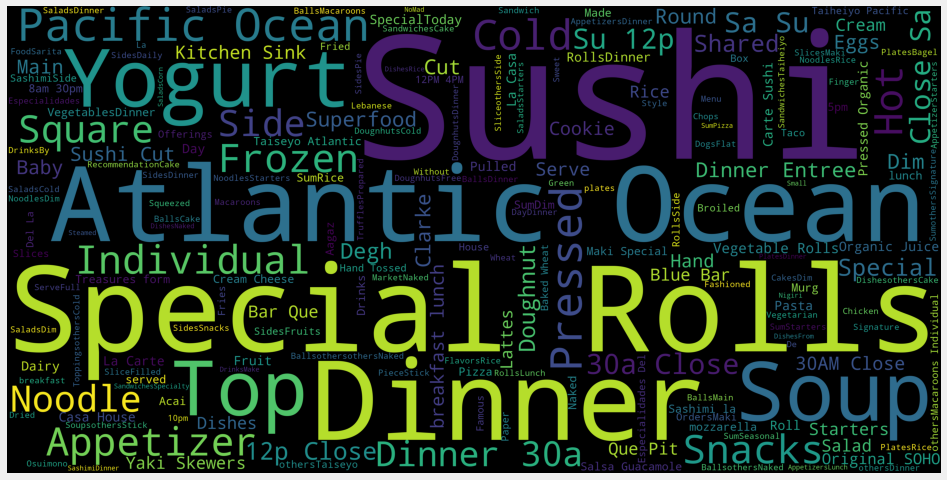

In [191]:

from wordcloud import WordCloud, STOPWORDS

main_dataframe['item_category_name'] =main_dataframe["item_category_name"].astype('str')
main_dataframe['item_name'] = main_dataframe['item_name'].astype('str')

#create a corpus for the word clouds
item_category_name_corpus = ''.join(main_dataframe['item_category_name'])
item_name_corpus = ''.join(main_dataframe['item_name'])
#generate aa word cloud for title_corpus
item_category_name_corpus_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 4000, height = 2000).generate(item_category_name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(item_category_name_corpus_wordcloud)
plt.axis('off')
plt.show()

# As per the visualization, Sushi, Special Rolls, Dinner, Yogurt, Appetizer, Noodle, Soup, Snacks are some of the most sought after item categories in New York.

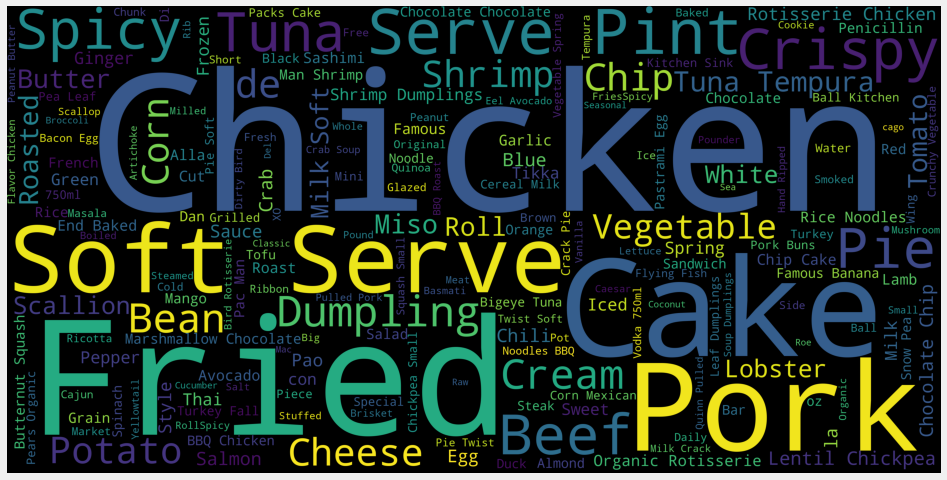

In [192]:
item_name_corpus_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 4000, height = 2000).generate(item_name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(item_name_corpus_wordcloud)
plt.axis('off')
plt.show()

# Chicken, Fried, Cake, Pork, Beef, Cheese, Serve Pint, Corn, Tuna, CheeseBean, Pie, Dumpling, Shrimp are some of the preferred items in New York

# Visualization 2: Let's visualize the geographical area covered in the NYC where the jumpman23 services are provided

# 1. Restaurants covered(pickup place) - (pickup latitude, pickup longitude)
# 2. Customer drop-off locations covered - (drop-off latitude, drop-off longitude)


In [193]:
#! pip install geopandas -U
import geopandas as gpd

In [194]:
#!pip install descartes -U

In [195]:
city_map= gpd.read_file('/Users/megs/Downloads/Borough Boundaries/geo_export_d97005d5-5b15-4893-a372-1da76c1ae171.shp')
city_map.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186613e+09,462958.559564,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,6.366027e+08,361212.477841,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934091e+09,729593.057284,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
4,4.0,Queens,3.044042e+09,899490.723339,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [196]:
#fig, ax = plt.subplots(figsize=(5,5))
#city_map.plot(ax=ax)

(-74.28337047811618, -73.67222994890716, 40.47514452614867, 40.93650364504063)

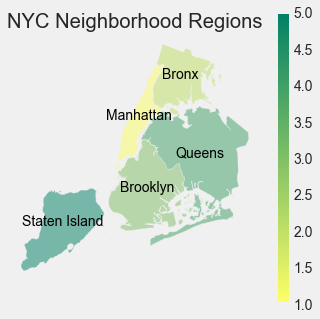

In [197]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(5,5))
city_map.plot(column='boro_code', cmap='summer_r', alpha=.5, ax=ax, legend=True)
city_map.apply(lambda x: ax.annotate(s=x.boro_name, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("NYC Neighborhood Regions")
plt.axis('off')

In [198]:
#!pip install shapely -U

In [199]:
main_dataframe
crs = {'init':'epsg:2263'}

In [200]:
from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(main_dataframe['pickup_lon'],main_dataframe['pickup_lat'])]


In [201]:
geo_df = gpd.GeoDataFrame(main_dataframe, crs = crs,geometry = geometry)
geo_df

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup,geometry
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:48:41.277398000,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658,00:01:58.974564,POINT (-73.97799 40.78360)
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:48:07.817852000,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895,00:01:58.974564,POINT (-73.99096 40.72434)
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 23:05:27.206118000,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292,00:04:49.368576,POINT (-73.96885 40.79865)
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,2014-10-02 21:08:04.747229000,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098,00:09:56.985962,00:04:33.510755,POINT (-74.00275 40.73887)
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,2014-10-30 14:29:16.186562000,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011,00:05:21.912294,00:01:28.521066,POINT (-74.00894 40.71538)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Org Macaroni & Cheese Family Size,1,Pasta Mixes,00:07:45.985432,...,2014-10-16 22:44:40.945779222,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014,01:18:04.290773,00:45:32.098424,POINT (-73.99183 40.72395)
1398,1372146,201471,62487,car,Whole Foods Market,Grocery Store,Org Whole Milk,1,Milk & Cream,00:07:52.488542,...,2014-10-16 13:06:37.442415222,2014-10-16 13:29:01.100076,5,Thursday,Morning,02:00:55.121100,00:52:59.365014,01:07:55.756085,00:45:32.098424,POINT (-73.96610 40.75966)
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 20:52:01.728266410,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671,00:45:32.098424,POINT (-73.98425 40.72911)
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,2014-10-12 20:00:19.748491410,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261,01:47:46.844117,00:45:32.098424,POINT (-74.00047 40.68190)


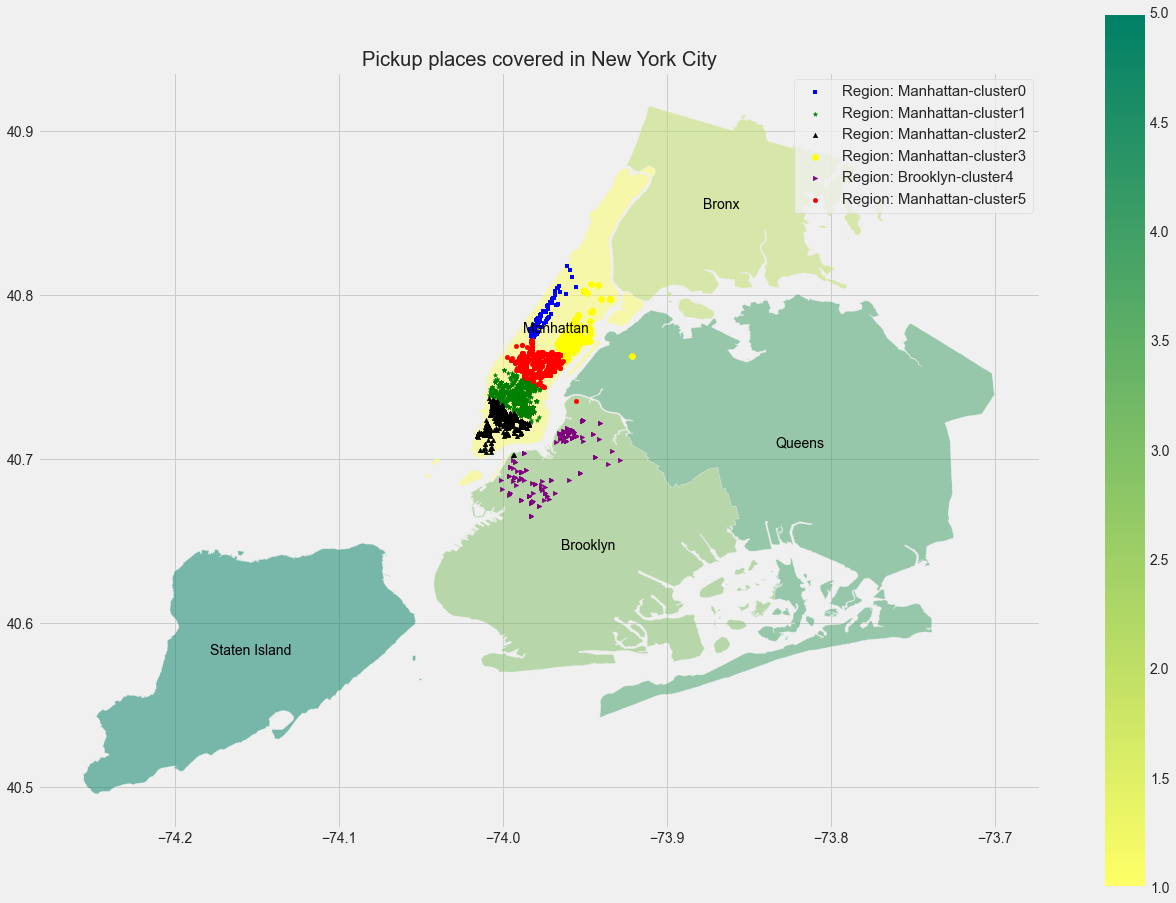

In [202]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title("Pickup places covered in New York City")
#city_map.plot(ax=ax,alpha = 0.01, color = 'black')
city_map.plot(column='boro_code', cmap='summer_r', alpha=.5, ax=ax, legend=True)
city_map.apply(lambda x: ax.annotate(s=x.boro_name, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
geo_df[geo_df['Cluster_howLong_Itemquantity']== 0].plot(ax=ax,markersize= 20,color = 'blue', marker= '+', label ='Region: Manhattan-cluster0')
geo_df[geo_df['Cluster_howLong_Itemquantity']== 1].plot(ax=ax,markersize= 20,color = 'green', marker= '*',label ='Region: Manhattan-cluster1')
geo_df[geo_df['Cluster_howLong_Itemquantity']== 2].plot(ax=ax,markersize= 20,color = 'black', marker= '^',label ='Region: Manhattan-cluster2')
geo_df[geo_df['Cluster_howLong_Itemquantity']== 3].plot(ax=ax,markersize= 20,color = 'yellow', marker= 'x',label ='Region: Manhattan-cluster3')
geo_df[geo_df['Cluster_howLong_Itemquantity']== 4].plot(ax=ax,markersize= 20,color = 'purple', marker= '>',label ='Region: Brooklyn-cluster4')
geo_df[geo_df['Cluster_howLong_Itemquantity']== 5].plot(ax=ax,markersize= 20,color = 'red', marker= 'o',label ='Region: Manhattan-cluster5')
plt.legend(prop={'size':15})      


# As the Map shows, all the pickup places are in either Manhattan and Brooklyn 

# Now let's figure out the drop-off locations. That will help us identify the geographical region covered in terms of customers

In [203]:
main_dataframe
crs = {'init':'epsg:2263'}
geometry1 = [Point(xy) for xy in zip(main_dataframe['dropoff_lon'],main_dataframe['dropoff_lat'])]
geo_df_customers = gpd.GeoDataFrame(main_dataframe, crs = crs,geometry = geometry1)
geo_df_customers

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Cluster_howLong_Itemquantity,Weekday_Delivery_started,Interval_delivery_started,time_difference_dropoff_delivery_started,time_difference_arrived_pickup_started_delivery,time_difference_dropoff_arrived_pickup,time_difference_left_pickup_arrived_pickup,geometry
1919,1319341,360014,130599,bicycle,T & R Pizza,others,others,1,others,00:07:56.117577,...,2014-10-08 17:48:41.277398000,2014-10-08 17:50:28.044492,0,Wednesday,Afternoon,00:06:05.907047,00:02:20.165389,00:03:45.741658,00:01:58.974564,POINT (-73.97675 40.78268)
564,1313044,241052,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,others,$10 Fresh & Co Santa Fe Salad,1,Today's Special,00:07:45.985432,...,2014-10-07 12:48:07.817852000,2014-10-07 12:50:25.961183,2,Tuesday,Morning,00:06:37.283284,00:02:20.165389,00:04:17.117895,00:01:58.974564,POINT (-73.99412 40.73887)
3751,1290337,155774,130599,bicycle,Duane Reade,Drug Store,others,1,others,00:07:56.117577,...,2014-10-03 23:05:27.206118000,2014-10-03 23:10:31.759834,0,Friday,Evening,00:12:08.029968,00:02:14.107676,00:09:53.922292,00:04:49.368576,POINT (-73.97031 40.79705)
2309,1282271,105778,101359,bicycle,Juice Press,Juice Bar,Love at First Sight,1,Cold Pressed Juices,00:07:51.860059,...,2014-10-02 21:08:04.747229000,2014-10-02 21:13:28.222436,1,Thursday,Evening,00:12:13.125060,00:02:16.139098,00:09:56.985962,00:04:33.510755,POINT (-74.00882 40.73893)
4296,1486536,145674,123844,bicycle,Iced Lattes On-Demand,Promo,Free Latte,1,Free Lattes On-Demand,00:07:45.985432,...,2014-10-30 14:29:16.186562000,2014-10-30 14:33:09.577790,2,Thursday,Afternoon,00:10:37.272305,00:05:15.360011,00:05:21.912294,00:01:28.521066,POINT (-73.99157 40.74554)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1376402,132082,157659,car,Whole Foods Market,Grocery Store,Org Macaroni & Cheese Family Size,1,Pasta Mixes,00:07:45.985432,...,2014-10-16 22:44:40.945779222,2014-10-16 23:17:13.138128,2,Thursday,Evening,02:11:03.655788,00:52:59.365014,01:18:04.290773,00:45:32.098424,POINT (-73.97959 40.74896)
1398,1372146,201471,62487,car,Whole Foods Market,Grocery Store,Org Whole Milk,1,Milk & Cream,00:07:52.488542,...,2014-10-16 13:06:37.442415222,2014-10-16 13:29:01.100076,5,Thursday,Morning,02:00:55.121100,00:52:59.365014,01:07:55.756085,00:45:32.098424,POINT (-73.97650 40.75789)
5265,1449787,99744,171206,van,Momofuku Noodle Bar,others,Momofuku Ramen,1,Bowls,00:07:51.860059,...,2014-10-25 20:52:01.728266410,2014-10-25 22:06:46.716513,1,Saturday,Afternoon,03:31:24.397932,01:31:07.311261,02:00:17.086671,00:45:32.098424,POINT (-73.99193 40.70033)
3931,1348169,62730,165298,car,Lucali,others,others,1,others,00:30:14.181875,...,2014-10-12 20:00:19.748491410,2014-10-12 21:02:34.494184,4,Sunday,Afternoon,03:18:54.155378,01:31:07.311261,01:47:46.844117,00:45:32.098424,POINT (-73.99930 40.72012)


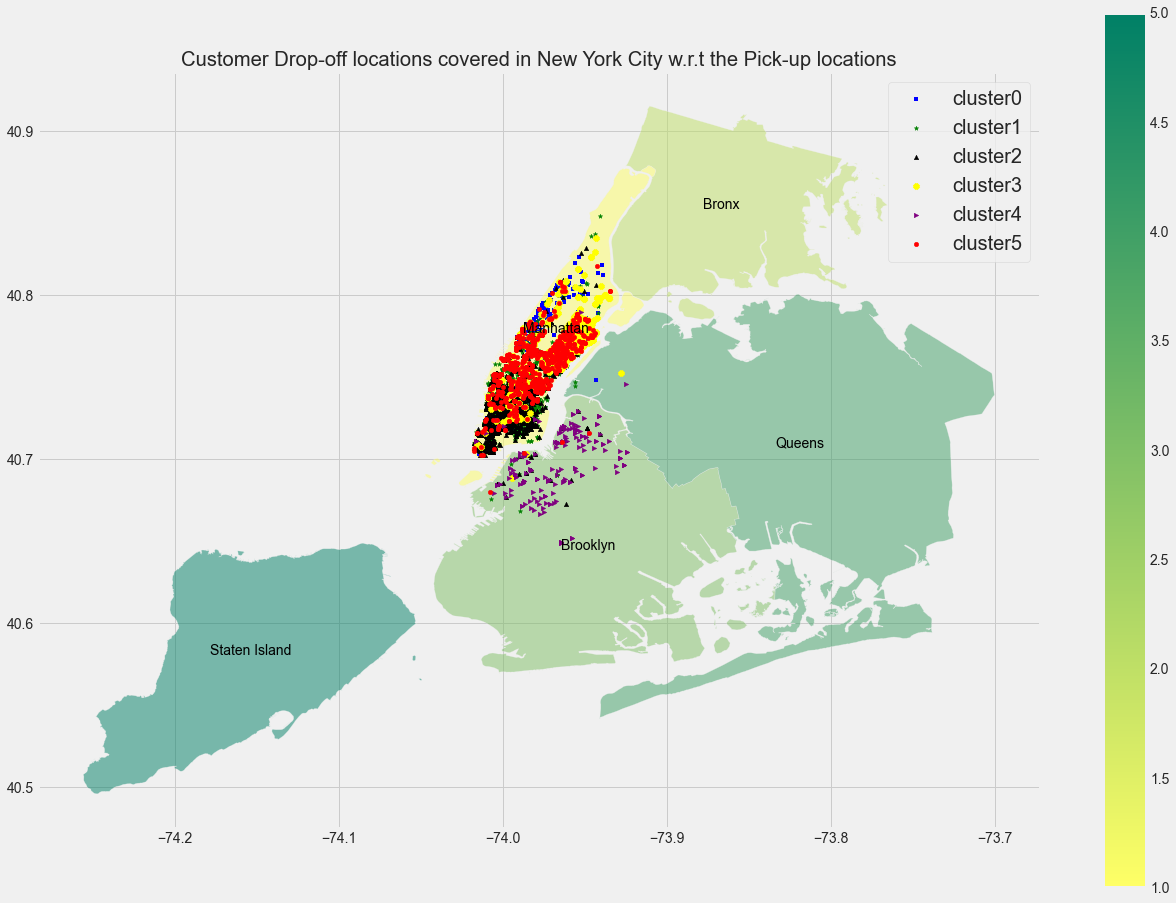

In [204]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title("Customer Drop-off locations covered in New York City w.r.t the Pick-up locations")
#city_map.plot(ax=ax,alpha = 0.5, color = 'grey')
city_map.plot(column='boro_code', cmap='summer_r', alpha=.5, ax=ax, legend=True)
city_map.apply(lambda x: ax.annotate(s=x.boro_name, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 0].plot(ax=ax,markersize= 20,color = 'blue', marker= '+', label ='cluster0')
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 1].plot(ax=ax,markersize= 20,color = 'green', marker= '*',label ='cluster1')
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 2].plot(ax=ax,markersize= 20,color = 'black', marker= '^',label ='cluster2')
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 3].plot(ax=ax,markersize= 20,color = 'yellow', marker= 'x',label ='cluster3')
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 4].plot(ax=ax,markersize= 20,color = 'purple', marker= '>',label ='cluster4')
geo_df_customers[geo_df_customers['Cluster_howLong_Itemquantity']== 5].plot(ax=ax,markersize= 20,color = 'red', marker= 'o',label ='cluster5')
plt.legend(prop={'size':20}) 

# The above geopandas map visualization also helps us to identify the reach/delivery options and availability of different pick-up places. It also tells a bit about how popular the pickup_place would be in terms of customer reach and preferences

Map Analysis: In Pick-up places map:1 visualization, we have group the pickup places in terms of most nearby locations. While comparing it with map:2 visualization of customersdrop-off locations,we could derive few insights-
1. The pick-up places grouped in 'Red' (cluster 5) has a good amout of region spread in terms of providing deliveries all across Manhattan

2. For the cluster 4 that represents the Brooklyn region marked in purple, we could see that the pick-up deliveries are mostly concentrated and little spread out across Brooklyn region with few exceptions for the drop-off at Manhattan as well. 

3. Few of the deliveries from 'Manhattan' and 'Brooklyn' restaurants can be seen in the 'Queens' region. 
        

# Visualization 3: Barplot to visualize if customers choose to re-order specific items. This helps us identify customer's preferred options from a given pick-up place.

Text(0.5, 0, 'Number of times item_type ordered')

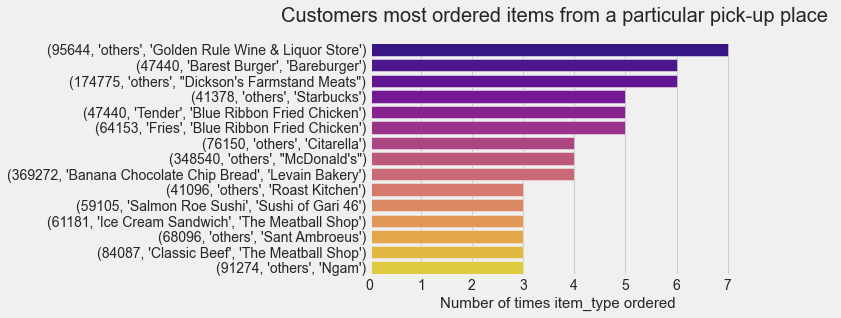

In [205]:
customer_count = main_dataframe.groupby(['customer_id','item_name'])['pickup_place'].value_counts().nlargest(15)
customer_count
sns.barplot(x=customer_count,y=customer_count.index,palette='plasma')
plt.title("Customers most ordered items from a particular pick-up place ",size=20,pad=20)
plt.xlabel("Number of times item_type ordered",size=15)

# Visualization 4: Barplot to visualize Most popular item counts for pick-up places

In [206]:
fav_item = main_dataframe.groupby('item_name')['pickup_place'].value_counts().nlargest(10)
fav_item


item_name            pickup_place                         
others               Duane Reade                              64
Fries                Shake Shack                              60
others               Chipotle Mexican Grill $1.99 Delivery    56
Cheese Fries         Shake Shack                              33
Shack Burger         Shake Shack                              29
Shackburger          Shake Shack                              29
ShackBurger          Shake Shack                              24
others               Philippe Chow                            24
B'day Cake Truffles  Momofuku Milk Bar                        23
Chicken              The Meatball Shop                        23
Name: pickup_place, dtype: int64

Text(0.5, 0, 'Number of times item type ordered')

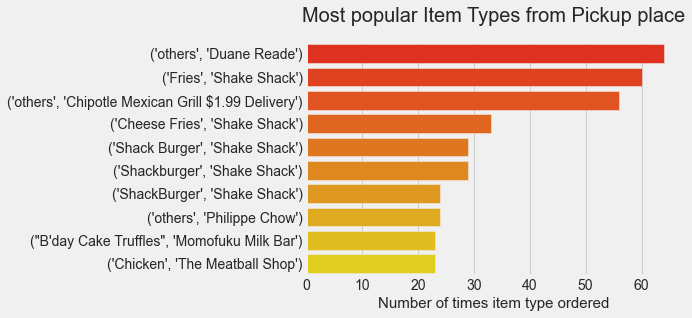

In [207]:
sns.barplot(x=fav_item,y=fav_item.index,palette='autumn')
plt.title("Most popular Item Types from Pickup place",size=20,pad=20)
plt.xlabel("Number of times item type ordered",size=15)

# Visualization 5: Barplot to visualize Most popular Pickup places (top 10)

Text(0.5, 0, 'Number of times items_ordered')

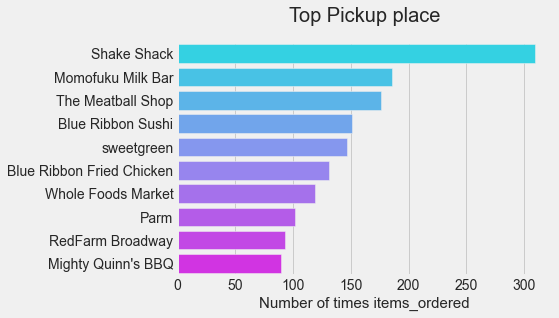

In [208]:
fav_pickups = main_dataframe['pickup_place'].value_counts().nlargest(10)
fav_pickups
sns.barplot(x=fav_pickups,y=fav_pickups.index,palette='cool')
plt.title("Top Pickup place",size=20,pad=20)
plt.xlabel("Number of times items_ordered",size=15)

# Visualization 6: Barplot to visualize which customers have ordered the most from the given pick-up place  (top 10)

Text(0.5, 0, 'Number of times items_ordered from the pickup place')

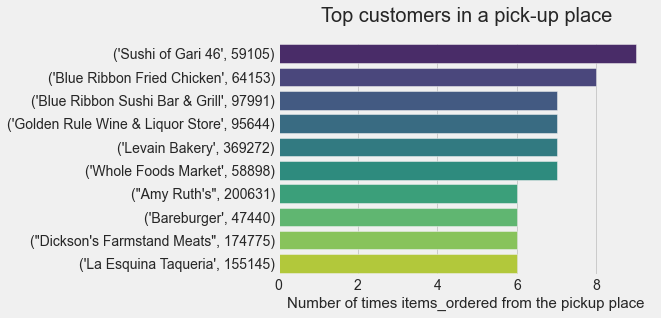

In [209]:
top_customers = main_dataframe.groupby('pickup_place')['customer_id'].value_counts().nlargest(10)
top_customers
sns.barplot(x=top_customers,y=top_customers.index,palette='viridis')
plt.title("Top customers in a pick-up place",size=20,pad=20)
plt.xlabel("Number of times items_ordered from the pickup place",size=15)

# Most regular customers using Jumpman23 services

In [210]:
most_regular_order_customers = main_dataframe['customer_id'].value_counts().nlargest(10)
most_regular_order_customers

369272    28
52832     23
275689    17
58898     16
91817     16
125123    16
100889    14
250494    13
115610    13
276192    12
Name: customer_id, dtype: int64

# Visualization 7: Bar Graph to visualize which Weekdays has the most delivery

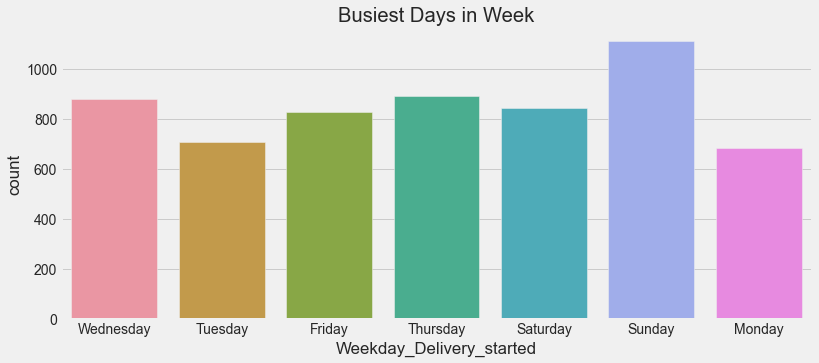

In [211]:
#Which Weekdays has the most delivery
#Weekday_Delivery_started

#plot how many movies gets released per month. 
plt.figure(figsize=(12,5))
sns.countplot(x="Weekday_Delivery_started",data=main_dataframe, )
plt.title('Busiest Days in Week')
plt.show()

# Visualization 8: Bar Graph to visualize Busiest Time Interval each Week

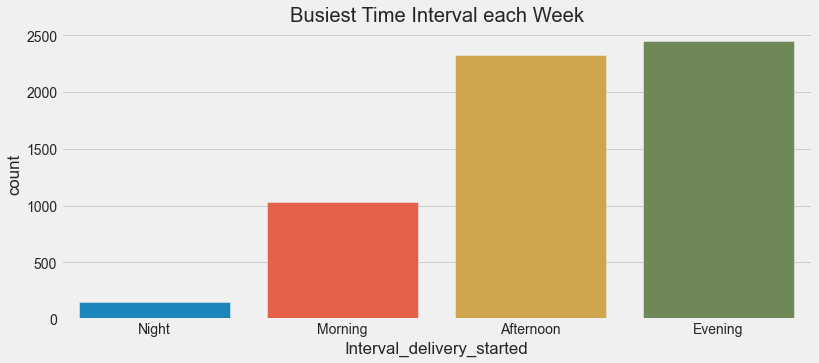

In [212]:
#plot how many movies gets released per month. 
plt.figure(figsize=(12,5))
sns.countplot(x="Interval_delivery_started",data=main_dataframe)
plt.title('Busiest Time Interval each Week')
plt.show()

# Visualization 9: Bar Graph to visualize Most used Vehicle type each Week

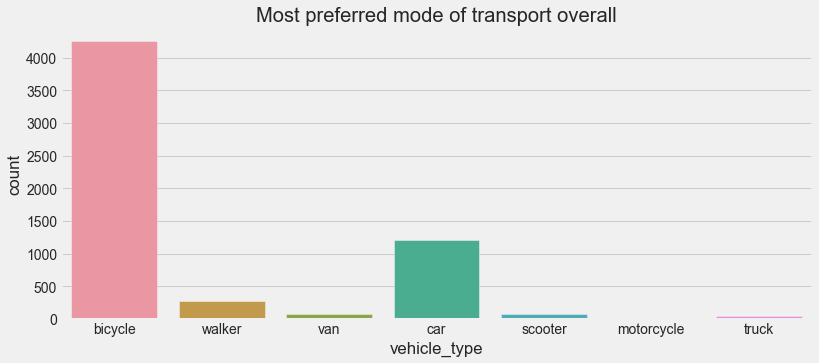

In [213]:
#Mode of transport used by the Jumpman 
plt.figure(figsize=(12,5))
sns.countplot(x="vehicle_type",data=main_dataframe)
plt.title('Most preferred mode of transport overall')
plt.show()

# Visualization 10: Unstacked Bar graph to visualize the busiest intervals each day

In [214]:
busiest = main_dataframe.groupby(['Weekday_Delivery_started','Interval_delivery_started'])['Interval_delivery_started'].apply(lambda x: x.count())
busiest

Weekday_Delivery_started  Interval_delivery_started
Friday                    Night                         20
                          Morning                      148
                          Afternoon                    281
                          Evening                      378
Monday                    Night                         15
                          Morning                      124
                          Afternoon                    243
                          Evening                      302
Saturday                  Night                         31
                          Morning                      114
                          Afternoon                    368
                          Evening                      333
Sunday                    Night                         32
                          Morning                      177
                          Afternoon                    541
                          Evening                      361
Thur

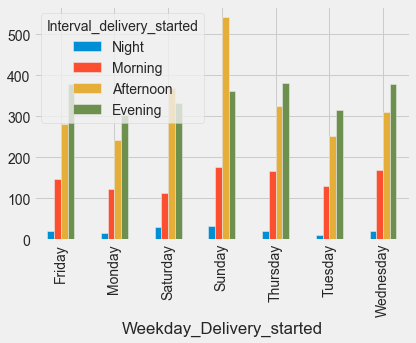

In [215]:
main_dataframe.groupby(['Weekday_Delivery_started','Interval_delivery_started']).size().unstack(fill_value=0).plot.bar()


# Number of delivery per jumpman (top 20)

In [216]:
jumpman_count = main_dataframe['jumpman_id'].value_counts().nlargest(20)
jumpman_count

99219     78
104533    76
142394    73
66416     62
61900     61
30743     58
3296      57
32580     56
20962     56
23359     54
142140    53
118095    50
53095     49
22502     49
43955     48
101359    48
84093     46
123581    44
156557    42
133293    40
Name: jumpman_id, dtype: int64